In [128]:
#load in packages and initial config
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np
from sklearn.linear_model import LinearRegression
import warnings
from matplotlib.gridspec import GridSpec
import scipy.stats as stats
from sklearn import linear_model
import seaborn as sns
import tkinter as tk 
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from numpy import *
from scipy.interpolate import *
import statsmodels.api as sm
import plotly
import plotly.express as px
import seaborn as sns; sns.set(style="ticks", color_codes=True)
from geopandas import GeoDataFrame
import pandas as pd
import plotly.graph_objs as go
import plotly.offline as offline
import plotly.figure_factory as ff
from plotly.graph_objs import *
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import os
init_notebook_mode(connected=True)
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 20)

In [3]:
#dpdcalls = dpdcalls.replace(['AM'],'')
#dpdcalls = dpdcalls.replace([':M'],'')
#dpdcalls['time'] = dpdcalls['time'].replace([':'],'')
dpdcalls24hour = dpdcalls24hour.replace(['12AM'],'0')
dpdcalls24hour = dpdcalls24hour.replace(['12PM'],'12')
dpdcalls24hour = dpdcalls24hour.replace(['11PM'],'23')
dpdcalls24hour = dpdcalls24hour.replace(['10PM'],'22')
dpdcalls24hour = dpdcalls24hour.replace(['9:PM'],'21')
dpdcalls24hour = dpdcalls24hour.replace(['8:PM'],'20')
dpdcalls24hour = dpdcalls24hour.replace(['7:PM'],'19')
dpdcalls24hour = dpdcalls24hour.replace(['6:PM'],'18')
dpdcalls24hour = dpdcalls24hour.replace(['5:PM'],'17')
dpdcalls24hour = dpdcalls24hour.replace(['4:PM'],'16')
dpdcalls24hour = dpdcalls24hour.replace(['3:PM'],'15')
dpdcalls24hour = dpdcalls24hour.replace(['2:PM'],'14')
dpdcalls24hour = dpdcalls24hour.replace(['1:PM'],'13')
dpdcalls24hour = dpdcalls24hour.replace(['11AM'],'11')
dpdcalls24hour = dpdcalls24hour.replace(['10AM'],'10')
dpdcalls24hour = dpdcalls24hour.replace(['9:AM'],'9')
dpdcalls24hour = dpdcalls24hour.replace(['8:AM'],'8')
dpdcalls24hour = dpdcalls24hour.replace(['7:AM'],'7')
dpdcalls24hour = dpdcalls24hour.replace(['6:AM'],'6')
dpdcalls24hour = dpdcalls24hour.replace(['5:AM'],'5')
dpdcalls24hour = dpdcalls24hour.replace(['4:AM'],'4')
dpdcalls24hour = dpdcalls24hour.replace(['3:AM'],'3')
dpdcalls24hour = dpdcalls24hour.replace(['2:AM'],'2')
dpdcalls24hour = dpdcalls24hour.replace(['1:AM'],'1')
dpdcalls24hour['time'] = dpdcalls24hour['time'].astype(int)
#dpdcalls.sort_values(by='time', inplace=True, ascending=False)
dpdcalls24hour.time


70         0
71         0
74         0
114        1
189        4
          ..
278107    20
278116    20
278155    21
278215    22
278271    23
Name: time, Length: 11697, dtype: int64

In [4]:
byHour=pd.value_counts(dpdcalls24hour['time']).sort_index(ascending=True)

flatByHour = []
for i in range(0,len(byHour)):
    flatByHour.append(np.repeat(i, byHour[i]))
    
arr=np.concatenate(flatByHour, axis=0 )  

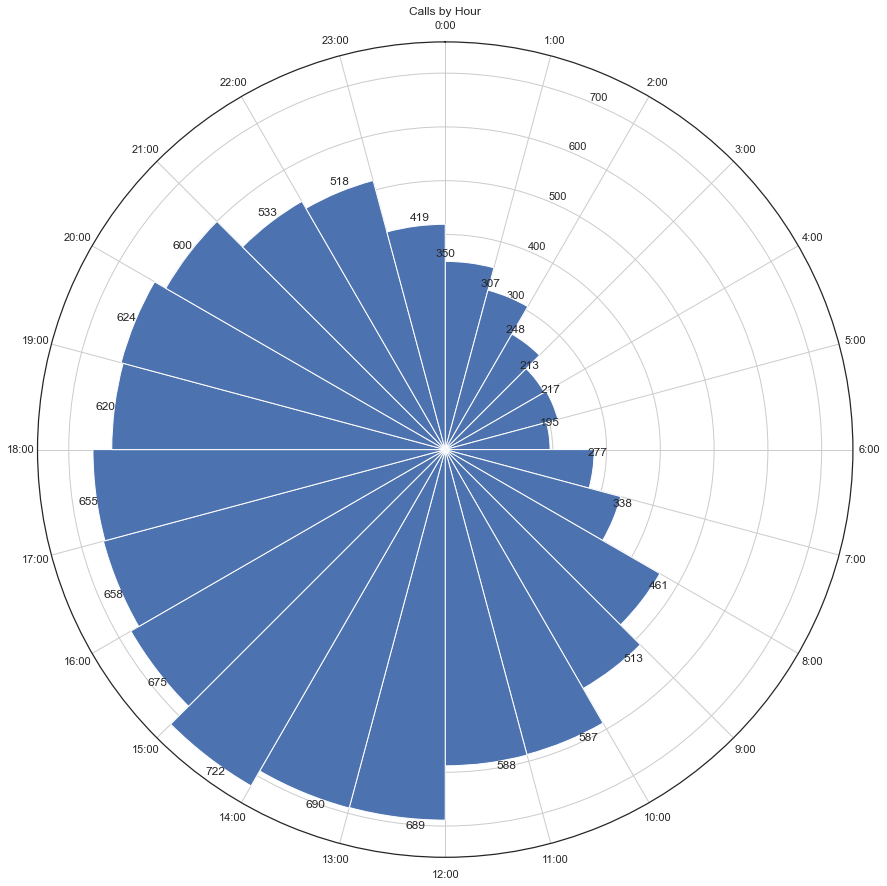

In [5]:
# Plotting the radial plot

N = 24

# Creating theta for 24 hours with an offset, so that the bars for each hour would not be centered relative to the labels
theta = np.linspace(7.5*np.pi/180, 2 * np.pi + 7.5*np.pi/180, N, endpoint=False)

# Setting the properties for a polar plot
radii, tick = np.histogram(arr, bins = 24)
width = (2*np.pi) / N

# Plotting a polar plot
plt.figure(figsize = (15, 15))
ax = plt.subplot(111, projection='polar')
plt.title("Calls by Hour")

# Setting the ticks
thetaticks = np.arange(0, 360, 15)
ax.set_thetagrids(thetaticks)

# Plotting the bars
bars = ax.bar(theta, radii, width=width)

# Set labels to go clockwise and start from the top
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)

# Setting the labels
ticks = ['0:00', '1:00', '2:00', '3:00', '4:00', '5:00', '6:00', '7:00', '8:00', '9:00', '10:00', '11:00', '12:00', '13:00', '14:00', '15:00', '16:00', '17:00', '18:00', '19:00', '20:00', '21:00', '22:00', '23:00']
ax.set_xticklabels(ticks)


for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.025, p.get_height() * 1.025), ha='center')
    
#for i, t in enumerate(ax.patches()):
#    t.set_rotation(i*45)


plt.show()

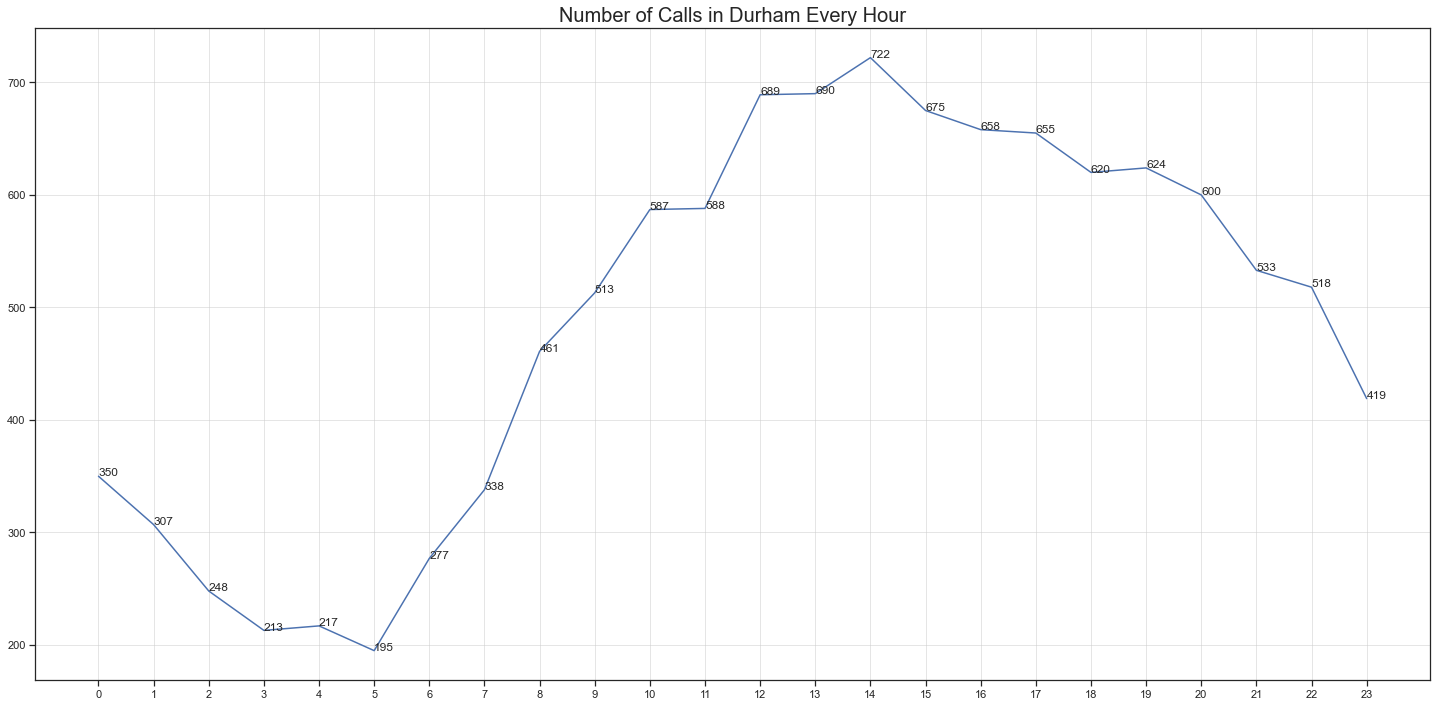

In [6]:
ax = pd.value_counts(dpdcalls24hour[dpdcalls24hour.time != 24]['time']).sort_index().plot(figsize=(25,12))
ax.set_title("Number of Calls in Durham Every Hour", fontsize=20)
ticks=dpdcalls24hour[dpdcalls24hour.time != 24]['time'].unique()
ax.set_xticks(ticks)
ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)
for i,j in pd.value_counts(dpdcalls24hour[dpdcalls24hour.time != 24]['time']).sort_index().items():
    ax.annotate(str(j), xy=(i, j))

In [7]:
policebeats_geojson = gpd.read_file("/Users/erikrobertsson/Documents/dataplus/Police_Beatsgeojson.geojson")
policebeats_geojson['LAWBEAT']= policebeats_geojson['LAWBEAT'].map(str)
policebeats_geojson

OBJECTID      PERIMETER STATUS CONTIGUOUS LAWDIST LAWBEAT  CAD  \
0           1   29657.869141                        D2     299  SSA   
1           2   18915.720703                        D2     299  SSA   
2           3    1193.728027                        D2     299  SSA   
3           4    1308.963013                       DSO     999  DSO   
4           5    1467.506958                       DSO     999  DSO   
..        ...            ...    ...        ...     ...     ...  ...   
119       120   98360.617188      I        yes      D4     414  414   
120       121    2400.751953      I         no      D1     114  114   
121       122    1733.583008      I         no      D1     114  114   
122       123  128589.203125      I        yes      D3     321  321   
123       124   74104.953125      I        yes      D3     323  323   

    GIS_DataA1Law_BeatAREA   ShapeSTArea  ShapeSTLength  \
0                     None  2.075708e+07   29657.868615   
1                     None  2.086135e+06   18915.724912   
2                     None  6.682308e+04    1193.727878   
3                     None  6.932677e+04    1308.962953   
4                     None  8.512911e+04    1467.506955   
..                     ...           ...            ...   
119                   None  1.342096e+08   98360.616926   
120                   None  1.818909e+05    2400.752242   
121                   None  1.319269e+05    1733.583547   
122                   None  1.590013e+08  128589.228775   
123                   None  1.066341e+08   74104.947841   

                                              geometry  
0    POLYGON ((-78.86588 36.18066, -78.86624 36.180...  
1    POLYGON ((-78.85731 36.17823, -78.85732 36.178...  
2    POLYGON ((-78.86585 36.18027, -78.86558 36.180...  
3    POLYGON ((-78.86585 36.18027, -78.86572 36.180...  
4    POLYGON ((-78.86452 36.17903, -78.86458 36.178...  
..                                                 ...  
119  POLYGON ((-78.87657 35.95794, -78.87744 35.957...  
120  POLYGON ((-78.84461 35.95609, -78.84488 35.956...  
121  POLYGON ((-78.84048 35.95491, -78.84051 35.954...  
122  POLYGON ((-78.95997 35.99931, -78.95997 35.999...  
123  POLYGON ((-78.96145 35.96169, -78.96153 35.961...  

[124 rows x 11 columns]

In [52]:
dpdcalls2020 = gpd.read_file('/Users/erikrobertsson/Documents/dataplus/dpdshapefile2020/dpdshapefile2020.shp')
dpdcalls2020 = dpdcalls2020.loc[~(dpdcalls2020["X"] == 0) & ~(dpdcalls2020["Y"] == 0)].copy()
dpdcalls2020 = dpdcalls2020.loc[dpdcalls2020["Source"] != "Self Initiated"].copy()
dpdcalls2020 = dpdcalls2020.loc[dpdcalls2020["Cancelled"] == 0].copy()
dpdcalls2020 = dpdcalls2020.loc[(dpdcalls2020["Beat"] != "DSO") & (dpdcalls2020["Beat"] != "SSA")].copy()
dpdcalls2020 = dpdcalls2020.loc[dpdcalls2020["Nature"] != "HANG UP"].copy()
dpdcalls2020 = dpdcalls2020.loc[(dpdcalls2020["Nature"] != "HANG UP WIRELESS PHASE 1") & (dpdcalls2020["Nature"] != "0") & (dpdcalls2020["Nature"] != "16") & (dpdcalls2020["Nature"] != "DIRECTED PATROL") & (dpdcalls2020["Nature"] != "NO apt # or phone") & (dpdcalls2020["Nature"] != "\\") & (dpdcalls2020["Nature"] != "VIN: JHMFA36226S011840 not sto") & (dpdcalls2020["Nature"] != "DISy") & (dpdcalls2020["Nature"] != "VEr") & (dpdcalls2020["Nature"] != "DIST") & (dpdcalls2020['Nature'] != 'HANG UP WIRELESS PHASE 2')].copy()
nature_list = ['WELFARE CHECK', 'URGENT WELFARE CHECK', 'PANHANDLING OR NUISANCE', 'VERBAL DISTURBANCE', 'SUICIDE THREAT', 'MENTAL DISORDER', 'TRESPASS OR UNWANTED', 'INTOXICATED PERSON', 'ASSIST PERSON', 'CRISIS']
dpdcalls2020 = dpdcalls2020[dpdcalls2020['Nature'].isin(nature_list)].copy()
twotosix = ['2', '3', '4', '5', '6']
dpdcalls2020 = dpdcalls2020[dpdcalls2020['Priority'].isin(twotosix)].copy()
dpdcalls2020 = dpdcalls2020.to_crs("EPSG:4326")
dpdcalls2020

Event Numb  Case Numbe   Call Date   Call Time             Source  \
0         20090196         NaN   10/3/2020   5:55:18PM         Phone Call   
2         20090198         NaN   10/3/2020   6:03:31PM         Phone Call   
13        20090210         NaN   10/3/2020   6:27:24PM         Phone Call   
26        20090225         NaN   10/3/2020   6:40:56PM         Phone Call   
30        20090237         NaN   10/3/2020   6:49:12PM         Phone Call   
...            ...         ...         ...         ...                ...   
336417    20469555         NaN  31/12/2020  10:09:42PM         Phone Call   
336434    20469575         NaN  31/12/2020  10:22:49PM              E-911   
336444    20469590         NaN  31/12/2020  10:33:39PM  Wireless 911 Call   
336482    20469645         NaN  31/12/2020  11:14:52PM  Wireless 911 Call   
336526    20469706         NaN  31/12/2020  11:59:40PM  Wireless 911 Call   

       Priority                   Nature               Address        X  \
0             4            WELFARE CHECK        400 E PILOT ST  2027210   
2             4            ASSIST PERSON      7800 LEONARDO DR  2012737   
13            4            ASSIST PERSON       3800 BOOKER AVE  2027572   
26            4            WELFARE CHECK      1000 W CLUB BLVD  2026731   
30            4            WELFARE CHECK        1700 FOREST RD  2024703   
...         ...                      ...                   ...      ...   
336417        3            WELFARE CHECK  200 CHATTAHOOCHEE ST  2055444   
336434        3     TRESPASS OR UNWANTED     2100 N ROXBORO ST  2032526   
336444        4  PANHANDLING OR NUISANCE      2400 HOLLOWAY ST  2041624   
336482        4            ASSIST PERSON         2600 CREST ST  2018007   
336526        3            WELFARE CHECK        4700 NC 55 HWY  2030751   

             Y District Beat               Dispositio  Cancelled  \
0       805972       D4  412  Resolved Without Report          0   
2       783053       D3  324  Resolved Without Report          0   
13      801043       D4  415  Resolved Without Report          0   
26      825554       D2  212  Resolved Without Report          0   
30      827871       D2  212  Resolved Without Report          0   
...        ...      ...  ...                      ...        ...   
336417  789031       D4  423  Resolved Without Report          0   
336434  825629       D2  213  Resolved Without Report          0   
336444  815098       D1  123  Resolved Without Report          0   
336482  823623       D3  313  Resolved Without Report          0   
336526  783233       D4  422                Unfounded          0   

                          geometry  
0       POINT (-78.90805 35.96446)  
2       POINT (-78.95699 35.90152)  
13      POINT (-78.90684 35.95091)  
26      POINT (-78.90961 36.01825)  
30      POINT (-78.91646 36.02462)  
...                            ...  
336417  POINT (-78.81275 35.91781)  
336434  POINT (-78.89002 36.01844)  
336444  POINT (-78.85930 35.98948)  
336482  POINT (-78.93911 36.01296)  
336526  POINT (-78.89617 35.90198)  

[12066 rows x 15 columns]

In [53]:
dpdcalls2019 = gpd.read_file('/Users/erikrobertsson/Documents/dataplus/dpdshapefile2019/dpdshapefile2019.shp')
dpdcalls2019 = dpdcalls2019.loc[~(dpdcalls2019["X"] == 0) & ~(dpdcalls2019["Y"] == 0)].copy()
dpdcalls2019 = dpdcalls2019.loc[dpdcalls2019["Source"] != "Self Initiated"].copy()
dpdcalls2019 = dpdcalls2019.loc[dpdcalls2019["Cancelled"] == 0].copy()
dpdcalls2019 = dpdcalls2019.loc[(dpdcalls2019["Beat"] != "DSO") & (dpdcalls2019["Beat"] != "SSA")].copy()
dpdcalls2019 = dpdcalls2019.loc[dpdcalls2019["Nature"] != "HANG UP"].copy()
dpdcalls2019 = dpdcalls2019.loc[(dpdcalls2019["Nature"] != "HANG UP WIRELESS PHASE 1") & (dpdcalls2019["Nature"] != "0") & (dpdcalls2019["Nature"] != "16") & (dpdcalls2019["Nature"] != "DIRECTED PATROL") & (dpdcalls2019["Nature"] != "NO apt # or phone") & (dpdcalls2019["Nature"] != "\\") & (dpdcalls2019["Nature"] != "VIN: JHMFA36226S011840 not sto") & (dpdcalls2019["Nature"] != "DISy") & (dpdcalls2019["Nature"] != "VEr") & (dpdcalls2019["Nature"] != "DIST") & (dpdcalls2019['Nature'] != 'HANG UP WIRELESS PHASE 2')].copy()
nature_list = ['WELFARE CHECK', 'URGENT WELFARE CHECK', 'PANHANDLING OR NUISANCE', 'VERBAL DISTURBANCE', 'SUICIDE THREAT', 'MENTAL DISORDER', 'TRESPASS OR UNWANTED', 'INTOXICATED PERSON', 'ASSIST PERSON', 'CRISIS']
dpdcalls2019 = dpdcalls2019[dpdcalls2019['Nature'].isin(nature_list)].copy()
twotosix = ['2', '3', '4', '5', '6']
dpdcalls2019 = dpdcalls2019[dpdcalls2019['Priority'].isin(twotosix)].copy()
dpdcalls2019 = dpdcalls2019.to_crs("EPSG:4326")
dpdcalls2019

Event Numb Case Numbe   Call Date   Call Time             Source  \
53      2019000065       None    1/1/2019  12:28:38AM  Wireless 911 Call   
85      2019000108       None    1/1/2019  12:54:10AM              E-911   
99      2019000129       None    1/1/2019   1:09:59AM         Phone Call   
107     2019000144       None    1/1/2019   1:19:46AM         Phone Call   
122     2019000165       None    1/1/2019   1:41:23AM  Wireless 911 Call   
...            ...        ...         ...         ...                ...   
355798  2019506589       None  31/12/2019   8:40:54PM  Wireless 911 Call   
355835  2019506636       None  31/12/2019   9:25:40PM  Wireless 911 Call   
355838  2019506639       None  31/12/2019   9:27:08PM  Wireless 911 Call   
355858  2019506676       None  31/12/2019   9:49:08PM              E-911   
355955  2019506808       None  31/12/2019  11:37:43PM  Wireless 911 Call   

       Priority                Nature                       Address        X  \
53            4         ASSIST PERSON             2000 N ROXBORO ST  2032691   
85            2         ASSIST PERSON                2500 WILBON ST  2027818   
99            4         WELFARE CHECK                   700 KENT ST  2024091   
107           3  TRESPASS OR UNWANTED          3500 HILLSBOROUGH RD  2013912   
122           3  TRESPASS OR UNWANTED         6400 GREENS HOLLOW LN  2023736   
...         ...                   ...                           ...      ...   
355798        2    VERBAL DISTURBANCE               300 JUNCTION RD  2043188   
355835        4         ASSIST PERSON              100 W PARRISH ST  2029329   
355838        2    VERBAL DISTURBANCE  4600 DURHAM CHAPEL HILL BLVD  2006277   
355858        4  TRESPASS OR UNWANTED             1000 N ALSTON AVE  2033919   
355955        2    VERBAL DISTURBANCE                 500 HARDEE ST  2040084   

             Y District   Beat               Dispositio  Cancelled  \
53      825075       D1  121.0  Resolved Without Report          0   
85      829914       D2  214.0  Resolved Without Report          0   
99      817241       D3  312.0  Resolved Without Report          0   
107     827209       D2  221.0  Resolved Without Report          0   
122     785521       D4  422.0  Resolved Without Report          0   
...        ...      ...    ...                      ...        ...   
355798  816606       D1  123.0  Resolved Without Report          0   
355835  817435       D5  512.0  Resolved Without Report          0   
355838  805161       D3  321.0  Resolved Without Report          0   
355858  817070       D1  112.0  Resolved Without Report          0   
355955  819119       D1  122.0  Resolved Without Report          0   

                          geometry  
53      POINT (-78.88946 36.01692)  
85      POINT (-78.90592 36.03022)  
99      POINT (-78.91856 35.99542)  
107     POINT (-78.95295 36.02282)  
122     POINT (-78.91985 35.90828)  
...                            ...  
355798  POINT (-78.85401 35.99362)  
355835  POINT (-78.90085 35.99594)  
355838  POINT (-78.97879 35.96226)  
355858  POINT (-78.88534 35.99492)  
355955  POINT (-78.86449 36.00053)  

[13891 rows x 15 columns]

In [54]:
dpdcalls2018 = gpd.read_file('/Users/erikrobertsson/Documents/dataplus/dpdshapefile2018/dpdshapefile2018.shp')
dpdcalls2018 = dpdcalls2018.loc[~(dpdcalls2018["X"] == 0) & ~(dpdcalls2018["Y"] == 0)].copy()
dpdcalls2018 = dpdcalls2018.loc[dpdcalls2018["Source"] != "Self Initiated"].copy()
dpdcalls2018 = dpdcalls2018.loc[dpdcalls2018["Cancelled"] == 0].copy()
dpdcalls2018 = dpdcalls2018.loc[(dpdcalls2018["Beat"] != "DSO") & (dpdcalls2018["Beat"] != "SSA")].copy()
dpdcalls2018 = dpdcalls2018.loc[dpdcalls2018["Nature"] != "HANG UP"].copy()
dpdcalls2018 = dpdcalls2018.loc[(dpdcalls2018["Nature"] != "HANG UP WIRELESS PHASE 1") & (dpdcalls2018["Nature"] != "0") & (dpdcalls2018["Nature"] != "16") & (dpdcalls2018["Nature"] != "DIRECTED PATROL") & (dpdcalls2018["Nature"] != "NO apt # or phone") & (dpdcalls2018["Nature"] != "\\") & (dpdcalls2018["Nature"] != "VIN: JHMFA36226S011840 not sto") & (dpdcalls2018["Nature"] != "DISy") & (dpdcalls2018["Nature"] != "VEr") & (dpdcalls2018["Nature"] != "DIST") & (dpdcalls2018['Nature'] != 'HANG UP WIRELESS PHASE 2')].copy()
nature_list = ['WELFARE CHECK', 'URGENT WELFARE CHECK', 'PANHANDLING OR NUISANCE', 'VERBAL DISTURBANCE', 'SUICIDE THREAT', 'MENTAL DISORDER', 'TRESPASS OR UNWANTED', 'INTOXICATED PERSON', 'ASSIST PERSON', 'CRISIS']
dpdcalls2018 = dpdcalls2018[dpdcalls2018['Nature'].isin(nature_list)].copy()
twotosix = ['2', '3', '4', '5', '6']
dpdcalls2018 = dpdcalls2018[dpdcalls2018['Priority'].isin(twotosix)].copy()
dpdcalls2018 = dpdcalls2018.to_crs("EPSG:4326")
dpdcalls2018

Event Numb Case Numbe   Call Date   Call Time             Source  \
50      2018000065       None    1/1/2018  12:26:56AM  Wireless 911 Call   
111     2018000141       None    1/1/2018   1:24:28AM  Wireless 911 Call   
115     2018000151       None    1/1/2018   1:30:38AM  Wireless 911 Call   
134     2018000182       None    1/1/2018   1:57:31AM  Wireless 911 Call   
157     2018000218       None    1/1/2018   2:51:00AM         Phone Call   
...            ...        ...         ...         ...                ...   
335172  2018489844       None  31/12/2018   8:28:34PM         Phone Call   
335185  2018489860       None  31/12/2018   8:46:06PM  Wireless 911 Call   
335237  2018489936       None  31/12/2018   9:44:57PM  Wireless 911 Call   
335333  2018490076       None  31/12/2018  11:16:34PM  Wireless 911 Call   
335343  2018490088       None  31/12/2018  11:27:00PM              E-911   

       Priority                Nature               Address        X       Y  \
50            4    INTOXICATED PERSON     5600 S MIAMI BLVD  2044198  773242   
111           3                CRISIS        400 E PILOT ST  2027329  806950   
115           2    INTOXICATED PERSON      2900 DEARBORN DR  2039078  832128   
134           2    INTOXICATED PERSON         4200 ORAN AVE  2022662  840120   
157           2         ASSIST PERSON    4000 GLENNSTONE DR  2049183  837770   
...         ...                   ...                   ...      ...     ...   
335172        4         ASSIST PERSON         500 HARDEE ST  2040076  819001   
335185        2         ASSIST PERSON  1500 FAYETTEVILLE ST  2029551  811311   
335237        3  TRESPASS OR UNWANTED     200 N CORCORAN ST  2029247  817623   
335333        3                CRISIS   900 FAYETTEVILLE ST  2030107  813301   
335343        3  TRESPASS OR UNWANTED     1000 N ALSTON AVE  2033702  816913   

       District Beat               Dispositio  Cancelled  \
50           D4  423  Resolved Without Report          0   
111          D4  412          CIT - No Report          0   
115          D2  223  Resolved Without Report          0   
134          D2  224  Resolved Without Report          0   
157          D2  223  Resolved Without Report          0   
...         ...  ...                      ...        ...   
335172       D1  122  Resolved Without Report          0   
335185       D4  411  Resolved Without Report          0   
335237       D5  522  Resolved Without Report          0   
335333       D4  411  Resolved Without Report          0   
335343       D1  113  Resolved Without Report          0   

                          geometry  
50      POINT (-78.85081 35.87448)  
111     POINT (-78.90765 35.96714)  
115     POINT (-78.86783 36.03627)  
134     POINT (-78.92333 36.05827)  
157     POINT (-78.83362 36.05173)  
...                            ...  
335172  POINT (-78.86452 36.00021)  
335185  POINT (-78.90012 35.97912)  
335237  POINT (-78.90113 35.99646)  
335333  POINT (-78.89824 35.98458)  
335343  POINT (-78.88607 35.99449)  

[13708 rows x 15 columns]

In [56]:
dpdcalls2017 = gpd.read_file('/Users/erikrobertsson/Documents/dataplus/dpdshapefile2017/dpdshapefile2017.shp')
dpdcalls2017 = dpdcalls2017.loc[~(dpdcalls2017["X"] == 0) & ~(dpdcalls2017["Y"] == 0)].copy()
dpdcalls2017 = dpdcalls2017.loc[dpdcalls2017["Source"] != "Self Initiated"].copy()
dpdcalls2017 = dpdcalls2017.loc[dpdcalls2017["Cancelled"] == 0].copy()
dpdcalls2017 = dpdcalls2017.loc[(dpdcalls2017["Beat"] != "DSO") & (dpdcalls2017["Beat"] != "SSA")].copy()
dpdcalls2017 = dpdcalls2017.loc[dpdcalls2017["Nature"] != "HANG UP"].copy()
dpdcalls2017 = dpdcalls2017.loc[(dpdcalls2017["Nature"] != "HANG UP WIRELESS PHASE 1") & (dpdcalls2017["Nature"] != "0") & (dpdcalls2017["Nature"] != "16") & (dpdcalls2017["Nature"] != "DIRECTED PATROL") & (dpdcalls2017["Nature"] != "NO apt # or phone") & (dpdcalls2017["Nature"] != "\\") & (dpdcalls2017["Nature"] != "VIN: JHMFA36226S011840 not sto") & (dpdcalls2017["Nature"] != "DISy") & (dpdcalls2017["Nature"] != "VEr") & (dpdcalls2017["Nature"] != "DIST") & (dpdcalls2017['Nature'] != 'HANG UP WIRELESS PHASE 2')].copy()
nature_list = ['WELFARE CHECK', 'URGENT WELFARE CHECK', 'PANHANDLING OR NUISANCE', 'VERBAL DISTURBANCE', 'SUICIDE THREAT', 'MENTAL DISORDER', 'TRESPASS OR UNWANTED', 'INTOXICATED PERSON', 'ASSIST PERSON', 'CRISIS']
dpdcalls2017 = dpdcalls2017[dpdcalls2017['Nature'].isin(nature_list)].copy()
twotosix = ['2', '3', '4', '5', '6']
dpdcalls2017 = dpdcalls2017[dpdcalls2017['Priority'].isin(twotosix)].copy()
dpdcalls2017 = dpdcalls2017.to_crs("EPSG:4326")
dpdcalls2017

Event Numb Case Numbe   Call Date   Call Time             Source  \
16      2017000024       None    1/1/2017  12:08:10AM              E-911   
27      2017000040       None    1/1/2017  12:13:47AM         Phone Call   
42      2017000070       None    1/1/2017  12:26:58AM  Wireless 911 Call   
55      2017000092       None    1/1/2017  12:45:44AM              E-911   
100     2017000156       None    1/1/2017   1:36:35AM         Phone Call   
...            ...        ...         ...         ...                ...   
340147  2017492533       None  31/12/2017   7:33:45PM              E-911   
340168  2017492566       None  31/12/2017   8:08:53PM              E-911   
340205  2017492624       None  31/12/2017   9:10:53PM              E-911   
340210  2017492629       None  31/12/2017   9:16:48PM         Phone Call   
340220  2017492644       None  31/12/2017   9:42:00PM              E-911   

       Priority         Nature                     Address        X       Y  \
16            4  ASSIST PERSON          4600 UNIVERSITY DR  2009312  804227   
27            4  ASSIST PERSON             1300 HUDSON AVE  2025825  827286   
42            4  ASSIST PERSON     WASHINGTON ST/W KNOX ST  2029945  823663   
55            4  ASSIST PERSON       E LAWSON ST/WABASH ST  2032797  809477   
100           4  WELFARE CHECK        2000-BLK WOODVIEW DR  2028382  826991   
...         ...            ...                         ...      ...     ...   
340147        3  ASSIST PERSON  1700 CARPENTER FLETCHER RD  2032583  788237   
340168        4  ASSIST PERSON        3900 FAYETTEVILLE ST  2028575  800843   
340205        3         CRISIS              1200 E MAIN ST  2033362  814461   
340210        3  WELFARE CHECK        1100 N BUCHANAN BLVD  2026109  824595   
340220        4  ASSIST PERSON             6900 GARRETT RD  2011959  790206   

       District Beat               Dispositio  Cancelled  \
16           D3  323  Resolved Without Report          0   
27           D2  214  Resolved Without Report          0   
42           D2  212  Resolved Without Report          0   
55           D4  413  Resolved Without Report          0   
100          D2  214  Resolved Without Report          0   
...         ...  ...                      ...        ...   
340147       D4  421  Resolved Without Report          0   
340168       D4  413  Resolved Without Report          0   
340205       D1  114          CIT - No Report          0   
340210       D2  211  Resolved Without Report          0   
340220       D3  322  Resolved Without Report          0   

                          geometry  
16      POINT (-78.96853 35.95969)  
27      POINT (-78.91267 36.02301)  
42      POINT (-78.89875 36.01305)  
55      POINT (-78.88916 35.97407)  
100     POINT (-78.90402 36.02219)  
...                            ...  
340147  POINT (-78.88996 35.91572)  
340168  POINT (-78.90346 35.95036)  
340205  POINT (-78.88723 35.98776)  
340210  POINT (-78.91172 36.01562)  
340220  POINT (-78.95961 35.92117)  

[14772 rows x 15 columns]

In [55]:
dpdcalls2016 = gpd.read_file('/Users/erikrobertsson/Documents/dataplus/dpdshapefile2016/dpdshapefile2016.shp')
dpdcalls2016 = dpdcalls2016.loc[~(dpdcalls2016["X"] == 0) & ~(dpdcalls2016["Y"] == 0)].copy()
dpdcalls2016 = dpdcalls2016.loc[dpdcalls2016["Source"] != "Self Initiated"].copy()
dpdcalls2016 = dpdcalls2016.loc[dpdcalls2016["Cancelled"] == 0].copy()
dpdcalls2016 = dpdcalls2016.loc[(dpdcalls2016["Beat"] != "DSO") & (dpdcalls2016["Beat"] != "SSA")].copy()
dpdcalls2016 = dpdcalls2016.loc[dpdcalls2016["Nature"] != "HANG UP"].copy()
dpdcalls2016 = dpdcalls2016.loc[(dpdcalls2016["Nature"] != "HANG UP WIRELESS PHASE 1") & (dpdcalls2016["Nature"] != "0") & (dpdcalls2016["Nature"] != "16") & (dpdcalls2016["Nature"] != "DIRECTED PATROL") & (dpdcalls2016["Nature"] != "NO apt # or phone") & (dpdcalls2016["Nature"] != "\\") & (dpdcalls2016["Nature"] != "VIN: JHMFA36226S011840 not sto") & (dpdcalls2016["Nature"] != "DISy") & (dpdcalls2016["Nature"] != "VEr") & (dpdcalls2016["Nature"] != "DIST") & (dpdcalls2016['Nature'] != 'HANG UP WIRELESS PHASE 2')].copy()
nature_list = ['WELFARE CHECK', 'URGENT WELFARE CHECK', 'PANHANDLING OR NUISANCE', 'VERBAL DISTURBANCE', 'SUICIDE THREAT', 'MENTAL DISORDER', 'TRESPASS OR UNWANTED', 'INTOXICATED PERSON', 'ASSIST PERSON', 'CRISIS']
dpdcalls2016 = dpdcalls2016[dpdcalls2016['Nature'].isin(nature_list)].copy()
twotosix = ['2', '3', '4', '5', '6']
dpdcalls2016 = dpdcalls2016[dpdcalls2016['Priority'].isin(twotosix)].copy()
dpdcalls2016 = dpdcalls2016.to_crs("EPSG:4326")
dpdcalls2016

Event Numb Case Numbe   Call Date   Call Time             Source  \
32      2016000047       None    1/1/2016  12:10:10AM  Wireless 911 Call   
58      2016000091       None    1/1/2016  12:29:43AM              E-911   
72      2016000115       None    1/1/2016  12:51:24AM  Wireless 911 Call   
105     2016000173       None    1/1/2016   1:29:33AM              E-911   
110     2016000179       None    1/1/2016   1:40:30AM              E-911   
...            ...        ...         ...         ...                ...   
358807  2016510199       None  31/12/2016   6:54:20PM  Wireless 911 Call   
358812  2016510206       None  31/12/2016   6:58:01PM         Phone Call   
358955  2016510393       None  31/12/2016   9:35:29PM              E-911   
359014  2016510476       None  31/12/2016  10:30:30PM              E-911   
359017  2016510482       None  31/12/2016  10:34:39PM  Wireless 911 Call   

       Priority                Nature               Address        X       Y  \
32            4         WELFARE CHECK      900 N MIAMI BLVD  2038925  815957   
58            4         ASSIST PERSON        3800 N DUKE ST  2028227  837614   
72            2    INTOXICATED PERSON     900 W TRINITY AVE  2027904  820883   
105           4         ASSIST PERSON   300 COMMONWEALTH ST  2040576  809443   
110           2         WELFARE CHECK    I85 N/N ROXBORO ST  2032336  824291   
...         ...                   ...                   ...      ...     ...   
358807        4         ASSIST PERSON          600 BROAD ST  2023472  821468   
358812        3  TRESPASS OR UNWANTED  2000 HILLSBOROUGH RD  2023033  822866   
358955        2        SUICIDE THREAT      2500 HOLLOWAY ST  2042057  815217   
359014        4         ASSIST PERSON       300 N DRIVER ST  2035860  814886   
359017        4         ASSIST PERSON         500 HARDEE ST  2040245  818037   

       District Beat               Dispositio  Cancelled  \
32           D1  122                Unfounded          0   
58           D2  224  Resolved Without Report          0   
72           D5  512  Resolved Without Report          0   
105          D1  124  Resolved Without Report          0   
110          D2  212  Resolved Without Report          0   
...         ...  ...                      ...        ...   
358807       D5  512  Resolved Without Report          0   
358812       D2  213  Resolved Without Report          0   
358955       D1  125                Unfounded          0   
359014       D1  114  Resolved Without Report          0   
359017       D1  122  Resolved Without Report          0   

                          geometry  
32      POINT (-78.86842 35.99185)  
58      POINT (-78.90451 36.05138)  
72      POINT (-78.90566 36.00542)  
105     POINT (-78.86287 35.97395)  
110     POINT (-78.89066 36.01477)  
...                            ...  
358807  POINT (-78.92064 36.00703)  
358812  POINT (-78.92212 36.01087)  
358955  POINT (-78.85784 35.98980)  
359014  POINT (-78.87879 35.98892)  
359017  POINT (-78.86395 35.99756)  

[15324 rows x 15 columns]

In [57]:
dpdcalls2015 = gpd.read_file('/Users/erikrobertsson/Documents/dataplus/dpdshapefile2015/dpdshapefile2015.shp')
dpdcalls2015 = dpdcalls2015.loc[~(dpdcalls2015["X"] == 0) & ~(dpdcalls2015["Y"] == 0)].copy()
dpdcalls2015 = dpdcalls2015.loc[dpdcalls2015["Source"] != "Self Initiated"].copy()
dpdcalls2015 = dpdcalls2015.loc[dpdcalls2015["Cancelled"] == 0].copy()
dpdcalls2015 = dpdcalls2015.loc[(dpdcalls2015["Beat"] != "DSO") & (dpdcalls2015["Beat"] != "SSA")].copy()
dpdcalls2015 = dpdcalls2015.loc[dpdcalls2015["Nature"] != "HANG UP"].copy()
dpdcalls2015 = dpdcalls2015.loc[(dpdcalls2015["Nature"] != "HANG UP WIRELESS PHASE 1") & (dpdcalls2015["Nature"] != "0") & (dpdcalls2015["Nature"] != "16") & (dpdcalls2015["Nature"] != "DIRECTED PATROL") & (dpdcalls2015["Nature"] != "NO apt # or phone") & (dpdcalls2015["Nature"] != "\\") & (dpdcalls2015["Nature"] != "VIN: JHMFA36226S011840 not sto") & (dpdcalls2015["Nature"] != "DISy") & (dpdcalls2015["Nature"] != "VEr") & (dpdcalls2015["Nature"] != "DIST") & (dpdcalls2015['Nature'] != 'HANG UP WIRELESS PHASE 2')].copy()
nature_list = ['WELFARE CHECK', 'URGENT WELFARE CHECK', 'PANHANDLING OR NUISANCE', 'VERBAL DISTURBANCE', 'SUICIDE THREAT', 'MENTAL DISORDER', 'TRESPASS OR UNWANTED', 'INTOXICATED PERSON', 'ASSIST PERSON', 'CRISIS']
dpdcalls2015 = dpdcalls2015[dpdcalls2015['Nature'].isin(nature_list)].copy()
twotosix = ['2', '3', '4', '5', '6']
dpdcalls2015 = dpdcalls2015[dpdcalls2015['Priority'].isin(twotosix)].copy()
dpdcalls2015 = dpdcalls2015.to_crs("EPSG:4326")
dpdcalls2015

Event Numb Case Numbe   Call Date   Call Time             Source  \
73      2015000123       None    1/1/2015  12:43:50AM              E-911   
74      2015000124       None    1/1/2015  12:45:12AM              E-911   
91      2015000150       None    1/1/2015   1:06:12AM         Phone Call   
107     2015000171       None    1/1/2015   1:26:16AM  Wireless 911 Call   
113     2015000178       None    1/1/2015   1:33:01AM         Phone Call   
...            ...        ...         ...         ...                ...   
381920  2015536620       None  31/12/2015  10:01:55PM  Wireless 911 Call   
381923  2015536623       None  31/12/2015  10:03:29PM              E-911   
381948  2015536666       None  31/12/2015  10:22:35PM         Phone Call   
382005  2015536752       None  31/12/2015  11:19:12PM         Phone Call   
382011  2015536764       None  31/12/2015  11:29:55PM         Phone Call   

       Priority                Nature             Address        X       Y  \
73            4         ASSIST PERSON   5200 S MIAMI BLVD  2044564  776463   
74            4         ASSIST PERSON      2000 N DUKE ST  2027910  827532   
91            4         ASSIST PERSON       2300 ERWIN RD  2018475  821864   
107           2    INTOXICATED PERSON      900 MASSEY AVE  2031576  811259   
113           3  TRESPASS OR UNWANTED     100 NC 54 HWY E  2019438  786458   
...         ...                   ...                 ...      ...     ...   
381920        4         ASSIST PERSON  4100 MERIWETHER DR  2032106  834618   
381923        4         ASSIST PERSON     900 PLEASANT DR  2042644  805840   
381948        2    INTOXICATED PERSON  2500 MERIDIAN PKWY  2030610  786016   
382005        3  TRESPASS OR UNWANTED       1700 GUESS RD  2025421  826452   
382011        3  TRESPASS OR UNWANTED      4400 NC 55 HWY  2031980  786571   

       District Beat               Dispositio  Cancelled  \
73           D4  423  Resolved Without Report          0   
74           D2  214  Resolved Without Report          0   
91           D3  313  Resolved Without Report          0   
107          D4  411       Assist/Backup Unit          0   
113          D4  421  Resolved Without Report          0   
...         ...  ...                      ...        ...   
381920       D2  223                Unfounded          0   
381923       D1  124  Resolved Without Report          0   
381948       D4  421  Resolved Without Report          0   
382005       D2  211  Resolved Without Report          0   
382011       D4  421  Resolved Without Report          0   

                          geometry  
73      POINT (-78.84956 35.88333)  
74      POINT (-78.90562 36.02368)  
91      POINT (-78.93754 36.00813)  
107     POINT (-78.89328 35.97897)  
113     POINT (-78.93436 35.91086)  
...                            ...  
381920  POINT (-78.89140 36.04313)  
381923  POINT (-78.85590 35.96404)  
381948  POINT (-78.89663 35.90962)  
382005  POINT (-78.91404 36.02072)  
382011  POINT (-78.89201 35.91114)  

[15273 rows x 15 columns]

In [58]:
dpdcalls2014 = gpd.read_file('/Users/erikrobertsson/Documents/dataplus/dpdshapefile2014/dpdshapefile2014.shp')
dpdcalls2014 = dpdcalls2014.loc[~(dpdcalls2014["X"] == 0) & ~(dpdcalls2014["Y"] == 0)].copy()
dpdcalls2014 = dpdcalls2014.loc[dpdcalls2014["Source"] != "Self Initiated"].copy()
dpdcalls2014 = dpdcalls2014.loc[dpdcalls2014["Cancelled"] == 0].copy()
dpdcalls2014 = dpdcalls2014.loc[(dpdcalls2014["Beat"] != "DSO") & (dpdcalls2014["Beat"] != "SSA")].copy()
dpdcalls2014 = dpdcalls2014.loc[dpdcalls2014["Nature"] != "HANG UP"].copy()
dpdcalls2014 = dpdcalls2014.loc[(dpdcalls2014["Nature"] != "HANG UP WIRELESS PHASE 1") & (dpdcalls2014["Nature"] != "0") & (dpdcalls2014["Nature"] != "16") & (dpdcalls2014["Nature"] != "DIRECTED PATROL") & (dpdcalls2014["Nature"] != "NO apt # or phone") & (dpdcalls2014["Nature"] != "\\") & (dpdcalls2014["Nature"] != "VIN: JHMFA36226S011840 not sto") & (dpdcalls2014["Nature"] != "DISy") & (dpdcalls2014["Nature"] != "VEr") & (dpdcalls2014["Nature"] != "DIST") & (dpdcalls2014['Nature'] != 'HANG UP WIRELESS PHASE 2')].copy()
nature_list = ['WELFARE CHECK', 'URGENT WELFARE CHECK', 'PANHANDLING OR NUISANCE', 'VERBAL DISTURBANCE', 'SUICIDE THREAT', 'MENTAL DISORDER', 'TRESPASS OR UNWANTED', 'INTOXICATED PERSON', 'ASSIST PERSON', 'CRISIS']
dpdcalls2014 = dpdcalls2014[dpdcalls2014['Nature'].isin(nature_list)].copy()
twotosix = ['2', '3', '4', '5', '6']
dpdcalls2014 = dpdcalls2014[dpdcalls2014['Priority'].isin(twotosix)].copy()
dpdcalls2014 = dpdcalls2014.to_crs("EPSG:4326")
dpdcalls2014

Event Numb Case Numbe   Call Date   Call Time             Source  \
78      2014000099       None    1/1/2014   1:02:29AM         Phone Call   
100     2014000133       None    1/1/2014   1:27:06AM         Phone Call   
104     2014000138       None    1/1/2014   1:31:55AM         Phone Call   
111     2014000147       None    1/1/2014   1:39:14AM         Phone Call   
144     2014000192       None    1/1/2014   2:41:20AM  Wireless 911 Call   
...            ...        ...         ...         ...                ...   
373233  2014508647       None  31/12/2014   6:18:22PM  Wireless 911 Call   
373275  2014508702       None  31/12/2014   7:07:50PM              E-911   
373328  2014508779       None  31/12/2014   8:38:09PM              E-911   
373348  2014508811       None  31/12/2014   8:59:08PM              E-911   
373455  2014508968       None  31/12/2014  11:21:03PM              E-911   

       Priority                Nature                             Address  \
78            3  TRESPASS OR UNWANTED                        700 NINTH ST   
100           4         ASSIST PERSON                       1100 ELLIS RD   
104           4         ASSIST PERSON                        500 FORGE RD   
111           4         ASSIST PERSON               3700 CHIMNEY RIDGE PL   
144           4         ASSIST PERSON         W CLUB BLVD/N BUCHANAN BLVD   
...         ...                   ...                                 ...   
373233        4         ASSIST PERSON                  100 MOUNT EVANS DR   
373275        3  TRESPASS OR UNWANTED  CROOKED CREEK PKWY/FAYETTEVILLE RD   
373328        4         ASSIST PERSON                        1600 KENT ST   
373348        4         ASSIST PERSON                       200 STOKES ST   
373455        2    INTOXICATED PERSON                      800 MASSEY AVE   

              X       Y District Beat               Dispositio  Cancelled  \
78      2022481  822247       D5  512  Resolved Without Report          0   
100     2037988  803710       D4  414       Assist/Backup Unit          0   
104     2021331  786389       D4  421  Resolved Without Report          0   
111     2018443  791963       D3  324  Resolved Without Report          0   
144     2026028  825024       D2  211  Resolved Without Report          0   
...         ...     ...      ...  ...                      ...        ...   
373233  2009416  828074       D3  313  Resolved Without Report          0   
373275  2019642  786961       D4  421  Resolved Without Report          0   
373328  2023425  811298       D3  311  Resolved Without Report          0   
373348  2032606  813639       D5  522  Resolved Without Report          0   
373455  2031222  811261       D4  411       Assist/Backup Unit          0   

                          geometry  
78      POINT (-78.92399 36.00918)  
100     POINT (-78.87164 35.95821)  
104     POINT (-78.92797 35.91067)  
111     POINT (-78.93771 35.92599)  
144     POINT (-78.91199 36.01680)  
...                            ...  
373233  POINT (-78.96816 36.02520)  
373275  POINT (-78.93367 35.91225)  
373328  POINT (-78.92083 35.97910)  
373348  POINT (-78.88979 35.98550)  
373455  POINT (-78.89448 35.97897)  

[14227 rows x 15 columns]

In [59]:
dpdcalls2013 = gpd.read_file('/Users/erikrobertsson/Documents/dataplus/dpdshapefile2013/dpdshapefile2013.shp')
dpdcalls2013 = dpdcalls2013.loc[~(dpdcalls2013["X"] == 0) & ~(dpdcalls2013["Y"] == 0)].copy()
dpdcalls2013 = dpdcalls2013.loc[dpdcalls2013["Source"] != "Self Initiated"].copy()
dpdcalls2013 = dpdcalls2013.loc[dpdcalls2013["Cancelled"] == 0].copy()
dpdcalls2013 = dpdcalls2013.loc[(dpdcalls2013["Beat"] != "DSO") & (dpdcalls2013["Beat"] != "SSA")].copy()
dpdcalls2013 = dpdcalls2013.loc[dpdcalls2013["Nature"] != "HANG UP"].copy()
dpdcalls2013 = dpdcalls2013.loc[(dpdcalls2013["Nature"] != "HANG UP WIRELESS PHASE 1") & (dpdcalls2013["Nature"] != "0") & (dpdcalls2013["Nature"] != "16") & (dpdcalls2013["Nature"] != "DIRECTED PATROL") & (dpdcalls2013["Nature"] != "NO apt # or phone") & (dpdcalls2013["Nature"] != "\\") & (dpdcalls2013["Nature"] != "VIN: JHMFA36226S011840 not sto") & (dpdcalls2013["Nature"] != "DISy") & (dpdcalls2013["Nature"] != "VEr") & (dpdcalls2013["Nature"] != "DIST") & (dpdcalls2013['Nature'] != 'HANG UP WIRELESS PHASE 2')].copy()
nature_list = ['WELFARE CHECK', 'URGENT WELFARE CHECK', 'PANHANDLING OR NUISANCE', 'VERBAL DISTURBANCE', 'SUICIDE THREAT', 'MENTAL DISORDER', 'TRESPASS OR UNWANTED', 'INTOXICATED PERSON', 'ASSIST PERSON', 'CRISIS', 'TRESPASS OR LOITERING', 'PANHANDLING OR SOLICITATION']
dpdcalls2013 = dpdcalls2013[dpdcalls2013['Nature'].isin(nature_list)].copy()
twotosix = ['2', '3', '4', '5', '6']
dpdcalls2013 = dpdcalls2013[dpdcalls2013['Priority'].isin(twotosix)].copy()
dpdcalls2013 = dpdcalls2013.to_crs("EPSG:4326")
dpdcalls2013

Event Numb Case Numbe   Call Date   Call Time             Source  \
92      2013000136       None    1/1/2013   1:17:11AM              E-911   
125     2013000181       None    1/1/2013   1:56:46AM  Wireless 911 Call   
138     2013000202   13000014    1/1/2013   2:15:17AM              E-911   
146     2013000220       None    1/1/2013   2:37:05AM         Phone Call   
153     2013000229       None    1/1/2013   2:46:59AM  Wireless 911 Call   
...            ...        ...         ...         ...                ...   
384728  2013499756       None  31/12/2013   5:17:14PM  Wireless 911 Call   
384889  2013499967       None  31/12/2013   9:14:35PM              E-911   
384928  2013500017       None  31/12/2013  10:08:13PM              E-911   
384976  2013500077       None  31/12/2013  11:15:42PM  Wireless 911 Call   
384979  2013500080       None  31/12/2013  11:17:11PM  Wireless 911 Call   

       Priority                Nature                  Address        X  \
92            2        SUICIDE THREAT     3000 FAYETTEVILLE ST  2027160   
125           4         ASSIST PERSON           2700 NC 55 HWY  2033314   
138           4         ASSIST PERSON            500 SPRUCE ST  2035690   
146           5         ASSIST PERSON            500 FULTON ST  2017969   
153           2    INTOXICATED PERSON          300 W MORGAN ST  2028988   
...         ...                   ...                      ...      ...   
384728        4         ASSIST PERSON             800 PARK AVE  2036413   
384889        2         ASSIST PERSON             700 GRAY AVE  2033377   
384928        2  TRESPASS OR UNWANTED      4800 HOPE VALLEY RD  2011756   
384976        4         ASSIST PERSON        2500 S ROXBORO ST  2024672   
384979        4         ASSIST PERSON  5100 OLD CHAPEL HILL RD  2003386   

             Y District Beat               Dispositio  Cancelled  \
92      805849       D4  412          CIT - No Report          0   
125     798437       D4  414                Unfounded          0   
138     815668       D1  114    CIT - Incident Report          0   
146     822354       D3  313  Resolved Without Report          0   
153     818467       D5  522  Resolved Without Report          0   
...        ...      ...  ...                      ...        ...   
384728  816784       D1  114  Resolved Without Report          0   
384889  818654       D1  111  Resolved Without Report          0   
384928  789501       D3  324  Resolved Without Report          0   
384976  806536       D4  412  Resolved Without Report          0   
384979  799303       D3  323  Resolved Without Report          0   

                          geometry  
92      POINT (-78.90822 35.96412)  
125     POINT (-78.88745 35.94374)  
138     POINT (-78.87936 35.99107)  
146     POINT (-78.93925 36.00948)  
153     POINT (-78.90200 35.99878)  
...                            ...  
384728  POINT (-78.87691 35.99413)  
384889  POINT (-78.88716 35.99928)  
384928  POINT (-78.96030 35.91924)  
384976  POINT (-78.91663 35.96601)  
384979  POINT (-78.98856 35.94617)  

[14906 rows x 15 columns]

In [60]:
dpdcalls2012 = gpd.read_file('/Users/erikrobertsson/Documents/dataplus/dpdshapefile2012/dpdshapefile2012.shp')
dpdcalls2012 = dpdcalls2012.loc[~(dpdcalls2012["X"] == 0) & ~(dpdcalls2012["Y"] == 0)].copy()
dpdcalls2012 = dpdcalls2012.loc[dpdcalls2012["Source"] != "Self Initiated"].copy()
dpdcalls2012 = dpdcalls2012.loc[dpdcalls2012["Cancelled"] == 0].copy()
dpdcalls2012 = dpdcalls2012.loc[(dpdcalls2012["Beat"] != "DSO") & (dpdcalls2012["Beat"] != "SSA")].copy()
dpdcalls2012 = dpdcalls2012.loc[dpdcalls2012["Nature"] != "HANG UP"].copy()
dpdcalls2012 = dpdcalls2012.loc[(dpdcalls2012["Nature"] != "HANG UP WIRELESS PHASE 1") & (dpdcalls2012["Nature"] != "0") & (dpdcalls2012["Nature"] != "16") & (dpdcalls2012["Nature"] != "DIRECTED PATROL") & (dpdcalls2012["Nature"] != "NO apt # or phone") & (dpdcalls2012["Nature"] != "\\") & (dpdcalls2012["Nature"] != "VIN: JHMFA36226S011840 not sto") & (dpdcalls2012["Nature"] != "DISy") & (dpdcalls2012["Nature"] != "VEr") & (dpdcalls2012["Nature"] != "DIST") & (dpdcalls2012['Nature'] != 'HANG UP WIRELESS PHASE 2')].copy()
nature_list = ['WELFARE CHECK', 'URGENT WELFARE CHECK', 'PANHANDLING OR NUISANCE', 'VERBAL DISTURBANCE', 'SUICIDE THREAT', 'MENTAL DISORDER', 'TRESPASS OR UNWANTED', 'INTOXICATED PERSON', 'ASSIST PERSON', 'CRISIS', 'TRESPASS OR LOITERING', 'PANHANDLING OR SOLICITATION']
dpdcalls2012 = dpdcalls2012[dpdcalls2012['Nature'].isin(nature_list)].copy()
twotosix = ['2', '3', '4', '5', '6']
dpdcalls2012 = dpdcalls2012[dpdcalls2012['Priority'].isin(twotosix)].copy()
dpdcalls2012 = dpdcalls2012.to_crs("EPSG:4326")
dpdcalls2012

Event Numb Case Numbe   Call Date   Call Time             Source  \
43      2012000053       None    1/1/2012  12:13:45AM         Phone Call   
79      2012000096       None    1/1/2012  12:37:05AM              E-911   
86      2012000105       None    1/1/2012  12:45:23AM              E-911   
107     2012000136       None    1/1/2012   1:15:23AM              E-911   
116     2012000149       None    1/1/2012   1:22:12AM  Wireless 911 Call   
...            ...        ...         ...         ...                ...   
388778  2012504891       None  31/12/2012   8:30:30PM         Phone Call   
388792  2012504911       None  31/12/2012   8:52:23PM              E-911   
388855  2012505002       None  31/12/2012  10:00:45PM         Phone Call   
388861  2012505009       None  31/12/2012  10:06:46PM  Wireless 911 Call   
388897  2012505060       None  31/12/2012  10:45:43PM         Phone Call   

       Priority                 Nature           Address        X       Y  \
43            4          ASSIST PERSON  3500 SKYBROOK LN  2050434  792280   
79            4          ASSIST PERSON  500 ROOSEVELT ST  2028885  806894   
86            2     INTOXICATED PERSON  300 S ALSTON AVE  2032571  812957   
107           4          ASSIST PERSON   700 COLONIAL ST  2034149  822357   
116           3  TRESPASS OR LOITERING     600 E KNOX ST  2034199  823460   
...         ...                    ...               ...      ...     ...   
388778        4          ASSIST PERSON   1100 LIBERTY ST  2035383  816330   
388792        4          ASSIST PERSON     2300 GUESS RD  2022918  828379   
388855        4          ASSIST PERSON    1200 SPRUCE ST  2035551  818400   
388861        3  TRESPASS OR LOITERING      1100 WALL ST  2033403  815341   
388897        3  TRESPASS OR LOITERING   200 N DRIVER ST  2036309  814171   

       District Beat               Dispositio  Cancelled  \
43           D4  423  Resolved Without Report          0   
79           D4  412  Resolved Without Report          0   
86           D5  522  Resolved Without Report          0   
107          D2  212  Resolved Without Report          0   
116          D2  212  Resolved Without Report          0   
...         ...  ...                      ...        ...   
388778       D1  114  Resolved Without Report          0   
388792       D2  213  Resolved Without Report          0   
388855       D1  113  Resolved Without Report          0   
388861       D1  112       Assist/Backup Unit          0   
388897       D1  114  Resolved Without Report          0   

                          geometry  
43      POINT (-78.82965 35.92676)  
79      POINT (-78.90239 35.96698)  
86      POINT (-78.88991 35.98363)  
107     POINT (-78.88454 36.00945)  
116     POINT (-78.88437 36.01248)  
...                            ...  
388778  POINT (-78.88039 35.99289)  
388792  POINT (-78.92250 36.02602)  
388855  POINT (-78.87982 35.99857)  
388861  POINT (-78.88709 35.99018)  
388897  POINT (-78.87727 35.98695)  

[17437 rows x 15 columns]

In [61]:
dpdcalls2011 = gpd.read_file('/Users/erikrobertsson/Documents/dataplus/dpdshapefile2011/dpdshapefile2011.shp')
dpdcalls2011 = dpdcalls2011.loc[~(dpdcalls2011["X"] == 0) & ~(dpdcalls2011["Y"] == 0)].copy()
dpdcalls2011 = dpdcalls2011.loc[dpdcalls2011["Source"] != "Self Initiated"].copy()
dpdcalls2011 = dpdcalls2011.loc[dpdcalls2011["Cancelled"] == 0].copy()
dpdcalls2011 = dpdcalls2011.loc[(dpdcalls2011["Beat"] != "DSO") & (dpdcalls2011["Beat"] != "SSA")].copy()
dpdcalls2011 = dpdcalls2011.loc[dpdcalls2011["Nature"] != "HANG UP"].copy()
dpdcalls2011 = dpdcalls2011.loc[(dpdcalls2011["Nature"] != "HANG UP WIRELESS PHASE 1") & (dpdcalls2011["Nature"] != "0") & (dpdcalls2011["Nature"] != "16") & (dpdcalls2011["Nature"] != "DIRECTED PATROL") & (dpdcalls2011["Nature"] != "NO apt # or phone") & (dpdcalls2011["Nature"] != "\\") & (dpdcalls2011["Nature"] != "VIN: JHMFA36226S011840 not sto") & (dpdcalls2011["Nature"] != "DISy") & (dpdcalls2011["Nature"] != "VEr") & (dpdcalls2011["Nature"] != "DIST") & (dpdcalls2011['Nature'] != 'HANG UP WIRELESS PHASE 2')].copy()
nature_list = ['WELFARE CHECK', 'URGENT WELFARE CHECK', 'PANHANDLING OR NUISANCE', 'VERBAL DISTURBANCE', 'SUICIDE THREAT', 'MENTAL DISORDER', 'TRESPASS OR UNWANTED', 'INTOXICATED PERSON', 'ASSIST PERSON', 'CRISIS', 'TRESPASS OR LOITERING', 'PANHANDLING OR SOLICITATION']
dpdcalls2011 = dpdcalls2011[dpdcalls2011['Nature'].isin(nature_list)].copy()
twotosix = ['2', '3', '4', '5', '6']
dpdcalls2011 = dpdcalls2011[dpdcalls2011['Priority'].isin(twotosix)].copy()
dpdcalls2011 = dpdcalls2011.to_crs("EPSG:4326")
dpdcalls2011

Event Numb Case Numbe   Call Date   Call Time             Source  \
68      2011000098       None    1/1/2011  12:28:17AM              E-911   
149     2011000207       None    1/1/2011   2:08:49AM  Wireless 911 Call   
155     2011000215       None    1/1/2011   2:16:18AM              E-911   
181     2011000249       None    1/1/2011   2:34:23AM              E-911   
191     2011000270       None    1/1/2011   2:52:13AM              E-911   
...            ...        ...         ...         ...                ...   
342298  2011449456       None  31/12/2011   9:19:29PM              E-911   
342333  2011449503       None  31/12/2011   9:51:42PM         Phone Call   
342370  2011449549       None  31/12/2011  10:30:08PM              E-911   
342411  2011449605       None  31/12/2011  11:12:50PM              E-911   
342433  2011449634       None  31/12/2011  11:42:59PM              E-911   

       Priority                 Nature                   Address        X  \
68            2          ASSIST PERSON              100 S ELM ST  2032459   
149           3          ASSIST PERSON          2500 E NC 54 HWY  2033648   
155           4          ASSIST PERSON            1100 GURLEY ST  2031868   
181           4          ASSIST PERSON            1100 GURLEY ST  2031874   
191           2     INTOXICATED PERSON  N ROXBORO ST/E CLUB BLVD  2032525   
...         ...                    ...                       ...      ...   
342298        3  TRESPASS OR LOITERING             800 E GEER ST  2035816   
342333        4          ASSIST PERSON       1500 CHAPEL HILL RD  2023368   
342370        4          ASSIST PERSON            1200 NAPLES PL  2040054   
342411        3  TRESPASS OR LOITERING         1200 N MIAMI BLVD  2037754   
342433        2     INTOXICATED PERSON          1400 E CLUB BLVD  2038270   

             Y District Beat               Dispositio  Cancelled  \
68      814604       D5  522  Resolved Without Report          0   
149     782616       D4  422  Resolved Without Report          0   
155     819829       D1  111  Resolved Without Report          0   
181     819832       D1  111  Resolved Without Report          0   
191     826156       D2  223  Resolved Without Report          0   
...        ...      ...  ...                      ...        ...   
342298  820484       D1  122                Unfounded          0   
342333  817242       D3  312  Resolved Without Report          0   
342370  820057       D1  122  Resolved Without Report          0   
342411  817837       D1  122  Resolved Without Report          0   
342433  828836       D2  223  Resolved Without Report          0   

                          geometry  
68      POINT (-78.89028 35.98815)  
149     POINT (-78.88639 35.90027)  
155     POINT (-78.89226 36.00251)  
181     POINT (-78.89224 36.00252)  
191     POINT (-78.89002 36.01989)  
...                            ...  
342298  POINT (-78.87891 36.00430)  
342333  POINT (-78.92101 35.99542)  
342370  POINT (-78.86459 36.00311)  
342411  POINT (-78.87237 35.99702)  
342433  POINT (-78.87058 36.02723)  

[16539 rows x 15 columns]

In [62]:
dpdcalls2010 = gpd.read_file('/Users/erikrobertsson/Documents/dataplus/dpdshapefile2010/dpdshapefile2010.shp')
dpdcalls2010 = dpdcalls2010.loc[~(dpdcalls2010["X"] == 0) & ~(dpdcalls2010["Y"] == 0)].copy()
dpdcalls2010 = dpdcalls2010.loc[dpdcalls2010["Source"] != "Self Initiated"].copy()
dpdcalls2010 = dpdcalls2010.loc[dpdcalls2010["Cancelled"] == 0].copy()
dpdcalls2010 = dpdcalls2010.loc[(dpdcalls2010["Beat"] != "DSO") & (dpdcalls2010["Beat"] != "SSA")].copy()
dpdcalls2010 = dpdcalls2010.loc[dpdcalls2010["Nature"] != "HANG UP"].copy()
dpdcalls2010 = dpdcalls2010.loc[(dpdcalls2010["Nature"] != "HANG UP WIRELESS PHASE 1") & (dpdcalls2010["Nature"] != "0") & (dpdcalls2010["Nature"] != "16") & (dpdcalls2010["Nature"] != "DIRECTED PATROL") & (dpdcalls2010["Nature"] != "NO apt # or phone") & (dpdcalls2010["Nature"] != "\\") & (dpdcalls2010["Nature"] != "VIN: JHMFA36226S011840 not sto") & (dpdcalls2010["Nature"] != "DISy") & (dpdcalls2010["Nature"] != "VEr") & (dpdcalls2010["Nature"] != "DIST") & (dpdcalls2010['Nature'] != 'HANG UP WIRELESS PHASE 2')].copy()
nature_list = ['WELFARE CHECK', 'URGENT WELFARE CHECK', 'PANHANDLING OR NUISANCE', 'VERBAL DISTURBANCE', 'SUICIDE THREAT', 'MENTAL DISORDER', 'TRESPASS OR UNWANTED', 'INTOXICATED PERSON', 'ASSIST PERSON', 'CRISIS', 'TRESPASS OR LOITERING', 'PANHANDLING OR SOLICITATION']
dpdcalls2010 = dpdcalls2010[dpdcalls2010['Nature'].isin(nature_list)].copy()
twotosix = ['2', '3', '4', '5', '6']
dpdcalls2010 = dpdcalls2010[dpdcalls2010['Priority'].isin(twotosix)].copy()
dpdcalls2010 = dpdcalls2010.to_crs("EPSG:4326")
dpdcalls2010

Event Numb Case Numbe   Call Date   Call Time             Source  \
44      2010000057   10000004    1/1/2010  12:17:14AM              E-911   
48      2010000063       None    1/1/2010  12:19:07AM  Wireless 911 Call   
104     2010000133       None    1/1/2010   1:16:35AM              E-911   
125     2010000159       None    1/1/2010   1:33:54AM         Phone Call   
143     2010000183       None    1/1/2010   2:00:37AM         Phone Call   
...            ...        ...         ...         ...                ...   
337842  2010443184       None  31/12/2010   9:23:31PM              E-911   
337850  2010443192       None  31/12/2010   9:31:40PM         Phone Call   
337981  2010443357       None  31/12/2010  11:48:59PM              E-911   
337990  2010443369       None  31/12/2010  11:53:00PM              E-911   
338003  2010443385       None  31/12/2010  11:58:31PM         Phone Call   

       Priority                 Nature                     Address        X  \
44            3  TRESPASS OR LOITERING             300 MEREDITH DR  2029387   
48            2          ASSIST PERSON  HILLSBOROUGH RD/SPARGER RD  2005402   
104           4          ASSIST PERSON              400 N QUEEN ST  2030936   
125           2     INTOXICATED PERSON           1000 CLARENDON ST  2024219   
143           4          ASSIST PERSON  E PILOT ST/FAYETTEVILLE ST  2027480   
...         ...                    ...                         ...      ...   
337842        3  TRESPASS OR LOITERING              400 LIBERTY ST  2031035   
337850        4          ASSIST PERSON            0 RICHARDSON CIR  2027843   
337981        2     INTOXICATED PERSON             1600 KILMER TER  2037535   
337990        4          ASSIST PERSON           8073005 S DUKE ST  2027272   
338003        4          ASSIST PERSON               500 FULTON ST  2017878   

             Y District Beat               Dispositio  Cancelled  \
44      782690       D4  422          Incident Report          0   
48      830783       D2  221  Resolved Without Report          0   
104     817349       D1  111  Resolved Without Report          0   
125     824393       D2  211  Resolved Without Report          0   
143     805754       D4  412                Unfounded          0   
...        ...      ...  ...                      ...        ...   
337842  816494       D5  522  Resolved Without Report          0   
337850  786613       D4  421  Resolved Without Report          0   
337981  818784       D1  122  Resolved Without Report          0   
337990  815370       D3  311  Resolved Without Report          0   
338003  822423       D3  313  Resolved Without Report          0   

                          geometry  
44      POINT (-78.90077 35.90049)  
48      POINT (-78.98173 36.03265)  
104     POINT (-78.89542 35.99570)  
125     POINT (-78.91811 36.01507)  
143     POINT (-78.90714 35.96386)  
...                            ...  
337842  POINT (-78.89509 35.99335)  
337850  POINT (-78.90598 35.91127)  
337981  POINT (-78.87311 35.99962)  
337990  POINT (-78.90781 35.99027)  
338003  POINT (-78.93955 36.00967)  

[16856 rows x 15 columns]

In [63]:
pd.set_option('display.max_rows', 20)
callspernature = dpdcalls2010.groupby( ["Nature"] ).size().to_frame(name = '2010dpdcalls_count').reset_index()
callspernature.sort_values(by='2010dpdcalls_count', inplace=True, ascending=False)
callspernature

Nature  2010dpdcalls_count
0                ASSIST PERSON               12802
4        TRESPASS OR LOITERING                1835
1           INTOXICATED PERSON                 963
2  PANHANDLING OR SOLICITATION                 848
3               SUICIDE THREAT                 408

In [64]:
dpdcalls2009 = gpd.read_file('/Users/erikrobertsson/Documents/dataplus/dpdshapefile2009/dpdshapefile2009.shp')
dpdcalls2009 = dpdcalls2009.loc[~(dpdcalls2009["X"] == 0) & ~(dpdcalls2009["Y"] == 0)].copy()
dpdcalls2009 = dpdcalls2009.loc[dpdcalls2009["Source"] != "Self Initiated"].copy()
dpdcalls2009 = dpdcalls2009.loc[dpdcalls2009["Cancelled"] == 0].copy()
dpdcalls2009 = dpdcalls2009.loc[(dpdcalls2009["Beat"] != "DSO") & (dpdcalls2009["Beat"] != "SSA")].copy()
dpdcalls2009 = dpdcalls2009.loc[dpdcalls2009["Nature"] != "HANG UP"].copy()
dpdcalls2009 = dpdcalls2009.loc[(dpdcalls2009["Nature"] != "HANG UP WIRELESS PHASE 1") & (dpdcalls2009["Nature"] != "0") & (dpdcalls2009["Nature"] != "16") & (dpdcalls2009["Nature"] != "DIRECTED PATROL") & (dpdcalls2009["Nature"] != "NO apt # or phone") & (dpdcalls2009["Nature"] != "\\") & (dpdcalls2009["Nature"] != "VIN: JHMFA36226S011840 not sto") & (dpdcalls2009["Nature"] != "DISy") & (dpdcalls2009["Nature"] != "VEr") & (dpdcalls2009["Nature"] != "DIST") & (dpdcalls2009['Nature'] != 'HANG UP WIRELESS PHASE 2')].copy()
nature_list = ['WELFARE CHECK', 'URGENT WELFARE CHECK', 'PANHANDLING OR NUISANCE', 'VERBAL DISTURBANCE', 'SUICIDE THREAT', 'MENTAL DISORDER', 'TRESPASS OR UNWANTED', 'INTOXICATED PERSON', 'ASSIST PERSON', 'CRISIS', 'TRESPASS OR LOITERING', 'PANHANDLING OR SOLICITATION']
dpdcalls2009 = dpdcalls2009[dpdcalls2009['Nature'].isin(nature_list)].copy()
twotosix = ['2', '3', '4', '5', '6']
dpdcalls2009 = dpdcalls2009[dpdcalls2009['Priority'].isin(twotosix)].copy()
dpdcalls2009 = dpdcalls2009.to_crs("EPSG:4326")
dpdcalls2009

Event Numb Case Numbe   Call Date   Call Time      Source Priority  \
53      2009000063       None    1/1/2009  12:26:59AM  Phone Call        4   
92      2009000110       None    1/1/2009   1:02:55AM  Phone Call        4   
100     2009000119    9000010    1/1/2009   1:26:00AM       E-911        4   
104     2009000125    9000007    1/1/2009   1:35:59AM       E-911        4   
108     2009000129       None    1/1/2009   1:37:16AM  Phone Call        2   
...            ...        ...         ...         ...         ...      ...   
331509  2009437402       None  31/12/2009  10:41:02PM       E-911        4   
331521  2009437417       None  31/12/2009  10:58:33PM  Phone Call        4   
331533  2009437434       None  31/12/2009  11:11:08PM       E-911        4   
331547  2009437451       None  31/12/2009  11:40:52PM       E-911        4   
331552  2009437456       None  31/12/2009  11:50:56PM       E-911        4   

                    Nature                Address        X       Y District  \
53           ASSIST PERSON  800-BLK UNDERWOOD AVE  2022862  817264       D3   
92           ASSIST PERSON  800-BLK UNDERWOOD AVE  2022784  817171       D3   
100          ASSIST PERSON         1100 DAYTON ST  2032488  809374       D4   
104          ASSIST PERSON       2100 HOLLOWAY ST  2040165  815663       D1   
108     INTOXICATED PERSON   3100 HILLSBOROUGH RD  2017828  825010       D2   
...                    ...                    ...      ...     ...      ...   
331509       ASSIST PERSON    1800 CHAPEL HILL RD  2022484  815411       D3   
331521       ASSIST PERSON      4900 N ROXBORO ST  2027402  843662       D2   
331533       ASSIST PERSON         2400 CHAPIN ST  2029569  806979       D4   
331547       ASSIST PERSON    2800 CHAPEL HILL RD  2018245  809104       D3   
331552       ASSIST PERSON       800 CLEVELAND ST  2030904  818394       D1   

       Beat               Dispositio  Cancelled                    geometry  
53      312  Resolved Without Report          0  POINT (-78.92272 35.99549)  
92      312  Resolved Without Report          0  POINT (-78.92298 35.99523)  
100     413          Incident Report          0  POINT (-78.89020 35.97379)  
104     122          Incident Report          0  POINT (-78.86423 35.99104)  
108     221  Resolved Without Report          0  POINT (-78.93972 36.01677)  
...     ...                      ...        ...                         ...  
331509  312  Resolved Without Report          0  POINT (-78.92400 35.99040)  
331521  224  Resolved Without Report          0  POINT (-78.90728 36.06799)  
331533  412  Resolved Without Report          0  POINT (-78.90008 35.96722)  
331547  314  Resolved Without Report          0  POINT (-78.93834 35.97308)  
331552  111  Resolved Without Report          0  POINT (-78.89553 35.99857)  

[16805 rows x 15 columns]

In [65]:
dpdcalls2008 = gpd.read_file('/Users/erikrobertsson/Documents/dataplus/dpdshapefile2008/dpdshapefile2008.shp')
dpdcalls2008 = dpdcalls2008.loc[~(dpdcalls2008["X"] == 0) & ~(dpdcalls2008["Y"] == 0)].copy()
dpdcalls2008 = dpdcalls2008.loc[dpdcalls2008["Source"] != "Self Initiated"].copy()
dpdcalls2008 = dpdcalls2008.loc[dpdcalls2008["Cancelled"] == 0].copy()
dpdcalls2008 = dpdcalls2008.loc[(dpdcalls2008["Beat"] != "DSO") & (dpdcalls2008["Beat"] != "SSA")].copy()
dpdcalls2008 = dpdcalls2008.loc[dpdcalls2008["Nature"] != "HANG UP"].copy()
dpdcalls2008 = dpdcalls2008.loc[(dpdcalls2008["Nature"] != "HANG UP WIRELESS PHASE 1") & (dpdcalls2008["Nature"] != "0") & (dpdcalls2008["Nature"] != "16") & (dpdcalls2008["Nature"] != "DIRECTED PATROL") & (dpdcalls2008["Nature"] != "NO apt # or phone") & (dpdcalls2008["Nature"] != "\\") & (dpdcalls2008["Nature"] != "VIN: JHMFA36226S011840 not sto") & (dpdcalls2008["Nature"] != "DISy") & (dpdcalls2008["Nature"] != "VEr") & (dpdcalls2008["Nature"] != "DIST") & (dpdcalls2008['Nature'] != 'HANG UP WIRELESS PHASE 2')].copy()
nature_list = ['WELFARE CHECK', 'URGENT WELFARE CHECK', 'PANHANDLING OR NUISANCE', 'VERBAL DISTURBANCE', 'SUICIDE THREAT', 'MENTAL DISORDER', 'TRESPASS OR UNWANTED', 'INTOXICATED PERSON', 'ASSIST PERSON', 'CRISIS', 'TRESPASS OR LOITERING', 'PANHANDLING OR SOLICITATION']
dpdcalls2008 = dpdcalls2008[dpdcalls2008['Nature'].isin(nature_list)].copy()
twotosix = ['2', '3', '4', '5', '6']
dpdcalls2008 = dpdcalls2008[dpdcalls2008['Priority'].isin(twotosix)].copy()
dpdcalls2008 = dpdcalls2008.to_crs("EPSG:4326")
dpdcalls2008

Event Numb Case Numbe   Call Date   Call Time      Source Priority  \
22      2008000033       None    1/1/2008  12:08:39AM       E-911        4   
76      2008000119       None    1/1/2008  12:46:57AM       E-911        2   
88      2008000134       None    1/1/2008  12:53:53AM       E-911        3   
113     2008000178       None    1/1/2008   1:25:21AM       E-911        3   
115     2008000181       None    1/1/2008   1:28:44AM       E-911        4   
...            ...        ...         ...         ...         ...      ...   
327021  2008448142       None  31/12/2008   7:19:59PM  Phone Call        4   
327023  2008448144       None  31/12/2008   7:22:10PM       E-911        4   
327118  2008448267       None  31/12/2008   9:41:35PM  Phone Call        4   
327122  2008448272       None  31/12/2008   9:49:45PM       E-911        4   
327223  2008448398       None  31/12/2008  11:35:06PM       E-911        3   

                       Nature                      Address        X       Y  \
22              ASSIST PERSON         400 W CHAPEL HILL ST  2027121  817890   
76         INTOXICATED PERSON               900 SIMMONS ST  2031269  812410   
88      TRESPASS OR LOITERING              700 N HOOVER RD  2041301  820563   
113     TRESPASS OR LOITERING         1100 N BUCHANAN BLVD  2026209  824778   
115             ASSIST PERSON             3000 E WEAVER ST  2025380  805939   
...                       ...                          ...      ...     ...   
327021          ASSIST PERSON  FAYETTEVILLE RD/E NC 54 HWY  2019444  786467   
327023          ASSIST PERSON        LIBERTY ST/N QUEEN ST  2030866  816762   
327118          ASSIST PERSON            4900 N ROXBORO ST  2027483  843688   
327122          ASSIST PERSON             900 N MIAMI BLVD  2038986  816083   
327223  TRESPASS OR LOITERING              3400 GLASSON ST  2012772  820484   

       District Beat               Dispositio  Cancelled  \
22           D5  512  Resolved Without Report          0   
76           D4  411  Resolved Without Report          0   
88           D1  121                Unfounded          0   
113          D2  211  Resolved Without Report          0   
115          D4  412  Resolved Without Report          0   
...         ...  ...                      ...        ...   
327021       D4  421  Resolved Without Report          0   
327023       D5  522  Resolved Without Report          0   
327118       D2  224  Resolved Without Report          0   
327122       D1  122  Resolved Without Report          0   
327223       D3  313  Resolved Without Report          0   

                          geometry  
22      POINT (-78.90832 35.99720)  
76      POINT (-78.89431 35.98213)  
88      POINT (-78.86037 36.00449)  
113     POINT (-78.91138 36.01612)  
115     POINT (-78.91424 35.96437)  
...                            ...  
327021  POINT (-78.93434 35.91089)  
327023  POINT (-78.89566 35.99409)  
327118  POINT (-78.90701 36.06806)  
327122  POINT (-78.86821 35.99219)  
327223  POINT (-78.95682 36.00435)  

[15779 rows x 15 columns]

In [66]:
dpdcalls2007 = gpd.read_file('/Users/erikrobertsson/Documents/dataplus/dpdshapefile2007/dpdshapefile2007.shp')
dpdcalls2007 = dpdcalls2007.loc[~(dpdcalls2007["X"] == 0) & ~(dpdcalls2007["Y"] == 0)].copy()
dpdcalls2007 = dpdcalls2007.loc[dpdcalls2007["Source"] != "Self Initiated"].copy()
dpdcalls2007 = dpdcalls2007.loc[dpdcalls2007["Cancelled"] == 0].copy()
dpdcalls2007 = dpdcalls2007.loc[(dpdcalls2007["Beat"] != "DSO") & (dpdcalls2007["Beat"] != "SSA")].copy()
dpdcalls2007 = dpdcalls2007.loc[dpdcalls2007["Nature"] != "HANG UP"].copy()
dpdcalls2007 = dpdcalls2007.loc[(dpdcalls2007["Nature"] != "HANG UP WIRELESS PHASE 1") & (dpdcalls2007["Nature"] != "0") & (dpdcalls2007["Nature"] != "16") & (dpdcalls2007["Nature"] != "DIRECTED PATROL") & (dpdcalls2007["Nature"] != "NO apt # or phone") & (dpdcalls2007["Nature"] != "\\") & (dpdcalls2007["Nature"] != "VIN: JHMFA36226S011840 not sto") & (dpdcalls2007["Nature"] != "DISy") & (dpdcalls2007["Nature"] != "VEr") & (dpdcalls2007["Nature"] != "DIST") & (dpdcalls2007['Nature'] != 'HANG UP WIRELESS PHASE 2')].copy()
nature_list = ['WELFARE CHECK', 'URGENT WELFARE CHECK', 'PANHANDLING OR NUISANCE', 'VERBAL DISTURBANCE', 'SUICIDE THREAT', 'MENTAL DISORDER', 'TRESPASS OR UNWANTED', 'INTOXICATED PERSON', 'ASSIST PERSON', 'CRISIS', 'TRESPASS OR LOITERING', 'PANHANDLING OR SOLICITATION']
dpdcalls2007 = dpdcalls2007[dpdcalls2007['Nature'].isin(nature_list)].copy()
twotosix = ['2', '3', '4', '5', '6']
dpdcalls2007 = dpdcalls2007[dpdcalls2007['Priority'].isin(twotosix)].copy()
dpdcalls2007 = dpdcalls2007.to_crs("EPSG:4326")
dpdcalls2007

Event Numb Case Numbe   Call Date   Call Time             Source  \
59      2007000076       None    1/1/2007  12:24:00AM         Phone Call   
65      2007000083       None    1/1/2007  12:31:39AM         Phone Call   
115     2007000142       None    1/1/2007   1:14:58AM              E-911   
119     2007000146       None    1/1/2007   1:18:19AM              E-911   
142     2007000182       None    1/1/2007   1:45:07AM  Wireless 911 Call   
...            ...        ...         ...         ...                ...   
289167  2007395994       None  31/12/2007   8:37:45PM              E-911   
289249  2007396107       None  31/12/2007  10:18:58PM              E-911   
289255  2007396114       None  31/12/2007  10:26:03PM              E-911   
289274  2007396140       None  31/12/2007  10:51:57PM  Wireless 911 Call   
289295  2007396165       None  31/12/2007  11:10:04PM  Wireless 911 Call   

       Priority                 Nature                   Address        X  \
59            4          ASSIST PERSON          2700 ATLANTIC ST  2027607   
65            4          ASSIST PERSON        CHEEK RD/HARDEE ST  2039422   
115           3  TRESPASS OR LOITERING         3000 IVEY WOOD LN  2045541   
119           4          ASSIST PERSON             1200 HAZEL ST  2032764   
142           2     INTOXICATED PERSON           1400 LATHROP ST  2036614   
...         ...                    ...                       ...      ...   
289167        4          ASSIST PERSON        1200 UNIVERSITY DR  2026384   
289249        3  TRESPASS OR LOITERING          1400 E CLUB BLVD  2038178   
289255        4          ASSIST PERSON  E CLUB BLVD/N ROXBORO ST  2032538   
289274        3  TRESPASS OR LOITERING      3800 HILLSBOROUGH RD  2013056   
289295        4          ASSIST PERSON             700 COLFAX ST  2031633   

             Y District Beat               Dispositio  Cancelled  \
59      806544       D4  412  Resolved Without Report          0   
65      820737       D1  122  Resolved Without Report          0   
115     808227       D1  123                Unfounded          0   
119     818758       D1  111  Resolved Without Report          0   
142     816352       D1  114  Resolved Without Report          0   
...        ...      ...  ...                      ...        ...   
289167  813242       D4  411  Resolved Without Report          0   
289249  829011       D2  223  Resolved Without Report          0   
289255  826020       D2  223  Resolved Without Report          0   
289274  828417       D2  221  Resolved Without Report          0   
289295  812477       D4  411  Resolved Without Report          0   

                          geometry  
59      POINT (-78.90671 35.96603)  
65      POINT (-78.86672 36.00498)  
115     POINT (-78.84610 35.97059)  
119     POINT (-78.88924 35.99956)  
142     POINT (-78.87623 35.99294)  
...                            ...  
289167  POINT (-78.91082 35.98443)  
289249  POINT (-78.87089 36.02771)  
289255  POINT (-78.88997 36.01951)  
289274  POINT (-78.95585 36.02614)  
289295  POINT (-78.89308 35.98231)  

[15235 rows x 15 columns]

In [67]:
dpdcalls2006 = gpd.read_file('/Users/erikrobertsson/Documents/dataplus/dpdshapefile2006/dpdshapefile2006.shp')
dpdcalls2006 = dpdcalls2006.loc[~(dpdcalls2006["X"] == 0) & ~(dpdcalls2006["Y"] == 0)].copy()
dpdcalls2006 = dpdcalls2006.loc[dpdcalls2006["Source"] != "Self Initiated"].copy()
dpdcalls2006 = dpdcalls2006.loc[dpdcalls2006["Cancelled"] == 0].copy()
dpdcalls2006 = dpdcalls2006.loc[(dpdcalls2006["Beat"] != "DSO") & (dpdcalls2006["Beat"] != "SSA")].copy()
dpdcalls2006 = dpdcalls2006.loc[dpdcalls2006["Nature"] != "HANG UP"].copy()
dpdcalls2006 = dpdcalls2006.loc[(dpdcalls2006["Nature"] != "HANG UP WIRELESS PHASE 1") & (dpdcalls2006["Nature"] != "0") & (dpdcalls2006["Nature"] != "16") & (dpdcalls2006["Nature"] != "DIRECTED PATROL") & (dpdcalls2006["Nature"] != "NO apt # or phone") & (dpdcalls2006["Nature"] != "\\") & (dpdcalls2006["Nature"] != "VIN: JHMFA36226S011840 not sto") & (dpdcalls2006["Nature"] != "DISy") & (dpdcalls2006["Nature"] != "VEr") & (dpdcalls2006["Nature"] != "DIST") & (dpdcalls2006['Nature'] != 'HANG UP WIRELESS PHASE 2')].copy()
nature_list = ['WELFARE CHECK', 'URGENT WELFARE CHECK', 'PANHANDLING OR NUISANCE', 'VERBAL DISTURBANCE', 'SUICIDE THREAT', 'MENTAL DISORDER', 'TRESPASS OR UNWANTED', 'INTOXICATED PERSON', 'ASSIST PERSON', 'CRISIS', 'TRESPASS OR LOITERING', 'PANHANDLING OR SOLICITATION']
dpdcalls2006 = dpdcalls2006[dpdcalls2006['Nature'].isin(nature_list)].copy()
twotosix = ['2', '3', '4', '5', '6']
dpdcalls2006 = dpdcalls2006[dpdcalls2006['Priority'].isin(twotosix)].copy()
dpdcalls2006 = dpdcalls2006.to_crs("EPSG:4326")
dpdcalls2006

Event Numb Case Numbe   Call Date   Call Time      Source Priority  \
8       2006000009       None    1/1/2006  12:05:14AM  Phone Call        3   
51      2006000079       None    1/1/2006   1:01:19AM  Phone Call        3   
78      2006000122       None    1/1/2006   1:36:16AM  Phone Call        4   
100     2006000151       None    1/1/2006   1:57:55AM  Phone Call        4   
107     2006000159       None    1/1/2006   2:11:11AM       E-911        2   
...            ...        ...         ...         ...         ...      ...   
247588  2006352455       None  31/12/2006  10:02:33PM       E-911        2   
247601  2006352469       None  31/12/2006  10:11:33PM  Phone Call        4   
247629  2006352513       None  31/12/2006  10:51:24PM  Phone Call        4   
247639  2006352526       None  31/12/2006  11:09:39PM       E-911        4   
247675  2006352573       None  31/12/2006  11:49:33PM  Phone Call        4   

                       Nature               Address        X       Y District  \
8       TRESPASS OR LOITERING         600 W KNOX ST  2029369  823689       D2   
51      TRESPASS OR LOITERING       1300 HUDSON AVE  2026096  827761       D2   
78              ASSIST PERSON       300 W CLUB BLVD  2031200  825986       D2   
100             ASSIST PERSON  3000 FAYETTEVILLE ST  2027357  805628        2   
107        INTOXICATED PERSON        500 LIBERTY ST  2031617  816414       D1   
...                       ...                   ...      ...     ...      ...   
247588     INTOXICATED PERSON         200 E GEER ST  2031729  820140       D1   
247601          ASSIST PERSON   200 W CORNWALLIS RD  2022966  807208       D4   
247629          ASSIST PERSON         2300 ERWIN RD  2018611  821943       D3   
247639          ASSIST PERSON          800 BROAD ST  2023730  822579       D2   
247675          ASSIST PERSON          2500 LANE ST  2028901  806453       D4   

       Beat               Dispositio  Cancelled                    geometry  
8       212  Resolved Without Report          0  POINT (-78.90070 36.01312)  
51      214  Resolved Without Report          0  POINT (-78.91175 36.02431)  
78      214                Unfounded          0  POINT (-78.89450 36.01942)  
100     411  Resolved Without Report          0  POINT (-78.90756 35.96351)  
107     112  Resolved Without Report          0  POINT (-78.89312 35.99313)  
...     ...                      ...        ...                         ...  
247588  111  Resolved Without Report          0  POINT (-78.89273 36.00336)  
247601  412  Resolved Without Report          0  POINT (-78.92239 35.96786)  
247629  313  Resolved Without Report          0  POINT (-78.93708 36.00835)  
247639  213  Resolved Without Report          0  POINT (-78.91977 36.01008)  
247675  412  Resolved Without Report          0  POINT (-78.90234 35.96577)  

[15487 rows x 15 columns]

In [23]:
callsperaddress = dpdcalls.groupby( ["Address"] ).size().to_frame(name = 'dpdcalls_count').reset_index()
callsperaddress.sort_values(by='dpdcalls_count', inplace=True, ascending=False)

In [24]:
policebeats = gpd.read_file('/Users/erikrobertsson/Documents/dataplus/Police_Beats/Police_Beats.shp')
policebeats = policebeats.to_crs("4326")
policebeats = policebeats.dissolve(by="LAWBEAT")
policebeats["Beat"] = policebeats.index
policebeats = policebeats.reset_index()
policebeats["id"] = policebeats.index
policebeats

LAWBEAT                                           geometry  OBJECTID  \
0       111  POLYGON ((-78.89039 36.01517, -78.89038 36.015...        50   
1       112  POLYGON ((-78.88787 36.01473, -78.88734 36.014...        51   
2       113  POLYGON ((-78.87372 35.99369, -78.87458 35.991...        62   
3       114  MULTIPOLYGON (((-78.84053 35.95436, -78.84021 ...        65   
4       121  MULTIPOLYGON (((-78.80746 35.99706, -78.80746 ...        38   
5       122  POLYGON ((-78.84694 36.00614, -78.84634 36.006...        54   
6       123  MULTIPOLYGON (((-78.83723 36.00399, -78.83722 ...        55   
7       124  MULTIPOLYGON (((-78.77636 35.92139, -78.77722 ...        63   
8       211  POLYGON ((-78.91430 36.04098, -78.91427 36.040...        36   
9       212  POLYGON ((-78.90513 36.01904, -78.90330 36.019...        43   
10      213  POLYGON ((-78.90597 36.04011, -78.89989 36.039...        37   
11      214  MULTIPOLYGON (((-78.85254 36.02879, -78.85254 ...        23   
12      221  MULTIPOLYGON (((-78.93799 36.07698, -78.93629 ...        17   
13      222  POLYGON ((-78.91508 36.07716, -78.91321 36.077...        16   
14      223  MULTIPOLYGON (((-78.89380 36.06589, -78.89372 ...        21   
15      224  MULTIPOLYGON (((-78.91391 36.09652, -78.91391 ...        12   
16      299  MULTIPOLYGON (((-78.86038 36.15712, -78.86107 ...         1   
17      311  POLYGON ((-78.91431 35.99170, -78.91414 35.991...        66   
18      312  POLYGON ((-78.94410 36.00873, -78.94413 36.008...        52   
19      313  POLYGON ((-78.98695 36.02959, -78.98696 36.029...        39   
20      314  POLYGON ((-78.93749 35.97542, -78.93679 35.975...        78   
21      321  MULTIPOLYGON (((-78.95996 35.99931, -78.95996 ...        58   
22      322  POLYGON ((-78.94765 35.95837, -78.94637 35.958...        87   
23      323  MULTIPOLYGON (((-78.98079 35.92612, -78.97989 ...        80   
24      324  MULTIPOLYGON (((-78.99154 35.88848, -78.99154 ...       106   
25      411  POLYGON ((-78.90125 35.98965, -78.89941 35.988...        67   
26      412  POLYGON ((-78.90870 35.97692, -78.90816 35.976...        75   
27      413  POLYGON ((-78.89017 35.98233, -78.88961 35.982...        71   
28      414  MULTIPOLYGON (((-78.87649 35.95794, -78.87636 ...        88   
29      415  POLYGON ((-78.91521 35.97136, -78.91519 35.971...        79   
30      421  POLYGON ((-78.90852 35.93573, -78.90823 35.935...        99   
31      422  MULTIPOLYGON (((-78.93721 35.87524, -78.93699 ...       108   
32      423  MULTIPOLYGON (((-78.83466 35.94599, -78.83463 ...        95   
33      511  POLYGON ((-78.92318 36.01031, -78.92260 36.010...        53   
34      512  POLYGON ((-78.90313 36.00376, -78.90298 36.003...        57   
35      513  POLYGON ((-78.89561 35.99710, -78.89553 35.997...        61   
36      999  MULTIPOLYGON (((-78.94297 35.89150, -78.94296 ...         4   

        PERIMETER STATUS CONTIGUOUS LAWDIST  CAD GIS_DataA1    ShapeSTAre  \
0    28608.800781      I        yes      D1  111       None  2.010252e+07   
1    26265.849609      I        yes      D1  112       None  2.079934e+07   
2    20667.539062      I        yes      D1  113       None  2.159195e+07   
3    53321.980469      I        yes      D1  114       None  6.103382e+07   
4    14495.120117      I         no      D1  121       None  7.008533e+06   
5    36686.679688      I        yes      D1  122       None  3.436298e+07   
6    74375.859375      I        yes      D1  123       None  7.495698e+07   
7    10708.070312      I         no      D1  124       None  3.022588e+06   
8    36748.878906      I        yes      D2  211       None  6.487864e+07   
9    37127.789062      I        yes      D2  212       None  4.301152e+07   
10   28560.539062      I        yes      D2  213       None  4.691512e+07   
11    1715.291016      I         no      D2  214       None  1.329736e+05   
12   87384.078125      I        yes      D2  221       None  2.027947e+08   
13   50498.308594      I        yes  

In [13]:
hispanicdata = pd.read_csv('/Users/erikrobertsson/Documents/dataplus/hispanic data/hispanicdata.csv', skiprows =1)
hispanicdata['GEOID20'] = hispanicdata['id'].str[-15:]
hispanicdata.drop('id', axis=1, inplace=True)
hispanicdata.drop(hispanicdata.iloc[:, 4:74], inplace = True, axis = 1)
hispanicdata.columns = hispanicdata.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
hispanicdata.columns = hispanicdata.columns.str.replace('[#,@,&,!]', '')
hispanicdata.columns = hispanicdata.columns.str.replace('[:]', '_')
hispanicdata.rename(columns = {'total_':'total', 'total_not_hispanic_or_latino_':'total_not_hispanic_or_latino'}, inplace = True)
hispanicdata

/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2694110152.py:5: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.

/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2694110152.py:5: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.

/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2694110152.py:6: FutureWarning:

The default value of regex will change from True to False in a future version.

/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2694110152.py:7: FutureWarning:

The default value of regex will change from True to False in a future version.



geographic_area_name  total  \
0     Block 1000, Block Group 1, Census Tract 1.01, ...    108   
1     Block 1001, Block Group 1, Census Tract 1.01, ...     35   
2     Block 1002, Block Group 1, Census Tract 1.01, ...     38   
3     Block 1003, Block Group 1, Census Tract 1.01, ...     43   
4     Block 1004, Block Group 1, Census Tract 1.01, ...     31   
...                                                 ...    ...   
4396  Block 1068, Block Group 1, Census Tract 9801, ...      0   
4397  Block 1069, Block Group 1, Census Tract 9801, ...      0   
4398  Block 1070, Block Group 1, Census Tract 9801, ...      0   
4399  Block 1071, Block Group 1, Census Tract 9801, ...      0   
4400  Block 1072, Block Group 1, Census Tract 9801, ...      0   

      total_hispanic_or_latino  total_not_hispanic_or_latino          geoid20  
0                           25                            83  370630001011000  
1                           12                            23  370630001011001  
2                            8                            30  370630001011002  
3                            0                            43  370630001011003  
4                            7                            24  370630001011004  
...                        ...                           ...              ...  
4396                         0                             0  370639801001068  
4397                         0                             0  370639801001069  
4398                         0                             0  370639801001070  
4399                         0                             0  370639801001071  
4400                         0                             0  370639801001072  

[4401 rows x 5 columns]

In [14]:
ncblockmap = gpd.read_file('/Users/erikrobertsson/Downloads/Northcarolinablocksshapefiles/tl_2021_37_tabblock20.shp')
ncblockmap = ncblockmap.to_crs("EPSG:4326")
durhamblockmap = ncblockmap[ncblockmap["COUNTYFP20"]=="063"]

In [15]:
durhamhispanicmap = pd.merge(hispanicdata, durhamblockmap, left_on ='geoid20', right_on='GEOID20')
durhamhispanicmap.drop(['MTFCC20', 'UATYPE20', 'FUNCSTAT20', 'ALAND20', 'AWATER20', 'BLOCKCE20', 'TRACTCE20', 'UR20', 'UACE20', 'geoid20', 'STATEFP20', 'NAME20'], axis=1, inplace=True)
durhamhispanicmap

geographic_area_name  total  \
0     Block 1000, Block Group 1, Census Tract 1.01, ...    108   
1     Block 1001, Block Group 1, Census Tract 1.01, ...     35   
2     Block 1002, Block Group 1, Census Tract 1.01, ...     38   
3     Block 1003, Block Group 1, Census Tract 1.01, ...     43   
4     Block 1004, Block Group 1, Census Tract 1.01, ...     31   
...                                                 ...    ...   
4396  Block 1068, Block Group 1, Census Tract 9801, ...      0   
4397  Block 1069, Block Group 1, Census Tract 9801, ...      0   
4398  Block 1070, Block Group 1, Census Tract 9801, ...      0   
4399  Block 1071, Block Group 1, Census Tract 9801, ...      0   
4400  Block 1072, Block Group 1, Census Tract 9801, ...      0   

      total_hispanic_or_latino  total_not_hispanic_or_latino COUNTYFP20  \
0                           25                            83        063   
1                           12                            23        063   
2                            8                            30        063   
3                            0                            43        063   
4                            7                            24        063   
...                        ...                           ...        ...   
4396                         0                             0        063   
4397                         0                             0        063   
4398                         0                             0        063   
4399                         0                             0        063   
4400                         0                             0        063   

              GEOID20   INTPTLAT20    INTPTLON20  \
0     370630001011000  +36.0194814  -078.8821382   
1     370630001011001  +36.0205516  -078.8893121   
2     370630001011002  +36.0205916  -078.8869754   
3     370630001011003  +36.0205318  -078.8880959   
4     370630001011004  +36.0221289  -078.8796703   
...               ...          ...           ...   
4396  370639801001068  +35.8697575  -078.8648679   
4397  370639801001069  +35.8691012  -078.8652956   
4398  370639801001070  +35.8687255  -078.8673419   
4399  370639801001071  +35.8957583  -078.8703320   
4400  370639801001072  +35.9385678  -078.8788750   

                                               geometry  
0     POLYGON ((-78.88999 36.01852, -78.88995 36.019...  
1     POLYGON ((-78.88993 36.02006, -78.88990 36.021...  
2     POLYGON ((-78.88749 36.02015, -78.88746 36.021...  
3     POLYGON ((-78.88872 36.01988, -78.88867 36.021...  
4     POLYGON ((-78.88098 36.02211, -78.87993 36.022...  
...                                                 ...  
4396  POLYGON ((-78.86527 35.87076, -78.86499 35.870...  
4397  POLYGON ((-78.86569 35.87062, -78.86540 35.870...  
4398  POLYGON ((-78.87004 35.86799, -78.86978 35.868...  
4399  POLYGON ((-78.87243 35.89600, -78.87216 35.896...  
4400  POLYGON ((-78.87930 35.93618, -78.87928 35.937...  

[4401 rows x 9 columns]

In [16]:
#Assign each census block to a police beat with for loop
cblockIndexToBeat = {}
sIndex = policebeats.sindex

for cblock_ind in durhamblockmap.index:
    cblock_geom = durhamblockmap.loc[cblock_ind]["geometry"]
    possibleBeatMatches = list(sIndex.intersection(cblock_geom.bounds))
    matched = False

    if len(possibleBeatMatches) > 0:
        possibleMatches = policebeats.iloc[possibleBeatMatches]
        intersectingAreas = possibleMatches.intersection(cblock_geom).area
        intersectingAreas /= cblock_geom.area
        police_beat_index = intersectingAreas.idxmax()
        maxIntersection = intersectingAreas.max()
    ##########
        if maxIntersection < 0.1:
            continue
    ##########
        if maxIntersection > 0:
            cblockIndexToBeat[cblock_ind] = policebeats.loc[police_beat_index]['LAWBEAT']
            matched = True

cblockDurhamBeats = ncblockmap[ncblockmap.index.isin(cblockIndexToBeat)]
cblockDurhamBeats['Beat'] = cblockDurhamBeats.index.map(lambda ii: cblockIndexToBeat[ii])

warnings.filterwarnings('ignore')

/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re

/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re

/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re

/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re

/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re

/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re

/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re

/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re

/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re

/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re

/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re

/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re

/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re

/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re

/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re

/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re

/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re

/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re

/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re

/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re

/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re

/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re

/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re

/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re

/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re

/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re

/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re

/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re

/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re

/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re

/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re

/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re

/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re

/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re

/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re

/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re

/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re

/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re

/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re

/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re

/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re

/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re

/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re

/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re

/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re

/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re

/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re

/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re

/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re

/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re

/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re

/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re

/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re

/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re

/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re

/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re

/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re

/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re

/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re

/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re

/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re

/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re

/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re

/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re

/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re

/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re

/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re

/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re

/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re

/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re

/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re

/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re

/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re

/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re

/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re

/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re

/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re

/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re

/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re

/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re

/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re

/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re

/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re

/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re

/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_94281/2285071337.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re

In [17]:
cblockcommsafebeats = cblockDurhamBeats.copy()
commsafe_list = [511, 512, 513, 411, 113, 112, 214, 223]
cblockcommsafebeats = cblockDurhamBeats.loc[cblockDurhamBeats['Beat'].isin(commsafe_list)].copy()
cblockcommsafebeats

STATEFP20 COUNTYFP20 TRACTCE20 BLOCKCE20          GEOID20      NAME20  \
874           37        063    001709      3001  370630017093001  Block 3001   
3649          37        063    001801      6041  370630018016041  Block 6041   
10725         37        063    001001      1004  370630010011004  Block 1004   
10944         37        063    000101      1028  370630001011028  Block 1028   
11876         37        063    001801      6033  370630018016033  Block 6033   
...          ...        ...       ...       ...              ...         ...   
235109        37        063    002200      2031  370630022002031  Block 2031   
235830        37        063    002300      1027  370630023001027  Block 1027   
236139        37        063    002200      2048  370630022002048  Block 2048   
236183        37        063    002200      1012  370630022001012  Block 1012   
236438        37        063    001301      1001  370630013011001  Block 1001   

       MTFCC20 UR20 UACE20 UATYPE20 FUNCSTAT20  ALAND20  AWATER20  \
874      G5040    R   None     None          S   918860      1497   
3649     G5040    R   None     None          S   212123      9487   
10725    G5040    R   None     None          S    66462      1025   
10944    G5040    R   None     None          S   435000      2847   
11876    G5040    R   None     None          S   131608      6435   
...        ...  ...    ...      ...        ...      ...       ...   
235109   G5040    R   None     None          S    14546         0   
235830   G5040    R   None     None          S    57219         0   
236139   G5040    R   None     None          S    10849         0   
236183   G5040    R   None     None          S    11653         0   
236438   G5040    R   None     None          S    40022         0   

         INTPTLAT20    INTPTLON20  \
874     +36.0511955  -078.8989718   
3649    +36.0155379  -078.8706505   
10725   +35.9935665  -078.8850882   
10944   +36.0161756  -078.8795383   
11876   +36.0263370  -078.8611270   
...             ...           ...   
235109  +35.9983414  -078.8990835   
235830  +35.9854948  -078.9077482   
236139  +35.9949422  -078.8981501   
236183  +36.0007075  -078.9093748   
236438  +35.9810471  -078.8944621   

                                                 geometry  Beat  
874     POLYGON ((-78.90312 36.05133, -78.90294 36.051...   223  
3649    POLYGON ((-78.87550 36.01421, -78.87371 36.014...   214  
10725   POLYGON ((-78.88599 35.99352, -78.88596 35.994...   113  
10944   POLYGON ((-78.88806 36.01514, -78.88790 36.015...   214  
11876   POLYGON ((-78.86503 36.02665, -78.86499 36.026...   214  
...                                                   ...   ...  
235109  POLYGON ((-78.89994 35.99915, -78.89961 35.998...   512  
235830  POLYGON ((-78.90906 35.98449, -78.90900 35.984...   411  
236139  POLYGON ((-78.89883 35.99520, -78.89876 35.995...   512  
236183  POLYGON ((-78.90950 36.00138, -78.90934 36.001...   511  
236438  POLYGON ((-78.89541 35.98186, -78.89539 35.981...   411  

[526 rows x 17 columns]

In [18]:
durhamhispanicmap = durhamblockmap.set_index('GEOID20').join(hispanicdata.set_index('geoid20'))
durhamhispanicmap.drop(['MTFCC20', 'UATYPE20', 'FUNCSTAT20', 'ALAND20', 'AWATER20', 'BLOCKCE20', 'TRACTCE20', 'UR20', 'UACE20', 'STATEFP20', 'NAME20'], axis=1, inplace=True)
durhamhispanicmap.head(3)

COUNTYFP20   INTPTLAT20    INTPTLON20  \
GEOID20                                                 
370630018064007        063  +36.0127651  -078.8227713   
370630018017028        063  +36.0696478  -078.7923950   
370630021004022        063  +36.1529771  -078.8218382   

                                                          geometry  \
GEOID20                                                              
370630018064007  POLYGON ((-78.82464 36.01317, -78.82456 36.013...   
370630018017028  POLYGON ((-78.80507 36.06321, -78.80468 36.063...   
370630021004022  POLYGON ((-78.83005 36.15073, -78.83001 36.150...   

                                              geographic_area_name  total  \
GEOID20                                                                     
370630018064007  Block 4007, Block Group 4, Census Tract 18.06,...     80   
370630018017028  Block 7028, Block Group 7, Census Tract 18.01,...      0   
370630021004022  Block 4022, Block Group 4, Census Tract 21, Du...     88   

                 total_hispanic_or_latino  total_not_hispanic_or_latino  
GEOID20                                                                  
370630018064007                        33                            47  
370630018017028                         0                             0  
370630021004022                         0                            88

In [19]:
blockswithhispanics = gpd.sjoin(durhamhispanicmap, cblockcommsafebeats)
blockswithhispanics['prophispanic']= blockswithhispanics['total_hispanic_or_latino'] / blockswithhispanics['total']
blockswithhispanics.head(3)

COUNTYFP20_left INTPTLAT20_left INTPTLON20_left  \
GEOID20                                                           
370630018017041             063     +36.0558254    -078.8296616   
370630018016014             063     +36.0496473    -078.8467110   
370630018016009             063     +36.0426464    -078.8352676   

                                                          geometry  \
GEOID20                                                              
370630018017041  POLYGON ((-78.83393 36.05431, -78.83344 36.055...   
370630018016014  POLYGON ((-78.85572 36.04408, -78.85557 36.044...   
370630018016009  POLYGON ((-78.84667 36.03546, -78.84547 36.037...   

                                              geographic_area_name  total  \
GEOID20                                                                     
370630018017041  Block 7041, Block Group 7, Census Tract 18.01,...      9   
370630018016014  Block 6014, Block Group 6, Census Tract 18.01,...    195   
370630018016009  Block 6009, Block Group 6, Census Tract 18.01,...     97   

                 total_hispanic_or_latino  total_not_hispanic_or_latino  \
GEOID20                                                                   
370630018017041                         3                             6   
370630018016014                        79                           116   
370630018016009                        27                            70   

                 index_right STATEFP20 COUNTYFP20_right TRACTCE20 BLOCKCE20  \
GEOID20                                                                       
370630018017041       225453        37              063    001801      6008   
370630018016014       225453        37              063    001801      6008   
370630018016009       225453        37              063    001801      6008   

                         GEOID20      NAME20 MTFCC20 UR20 UACE20 UATYPE20  \
GEOID20                                                                     
370630018017041  370630018016008  Block 6008   G5040    R   None     None   
370630018016014  370630018016008  Block 6008   G5040    R   None     None   
370630018016009  370630018016008  Block 6008   G5040    R   None     None   

                FUNCSTAT20  ALAND20  AWATER20 INTPTLAT20_right  \
GEOID20                                                          
370630018017041          S   100889         0      +36.0519717   
370630018016014          S   100889         0      +36.0519717   
370630018016009          S   100889         0      +36.0519717   

                INTPTLON20_right  Beat  prophispanic  
GEOID20                                               
370630018017041     -078.8336224   214      0.333333  
370630018016014     -078.8336224   214      0.405128  
370630018016009     -078.8336224   214      0.278351

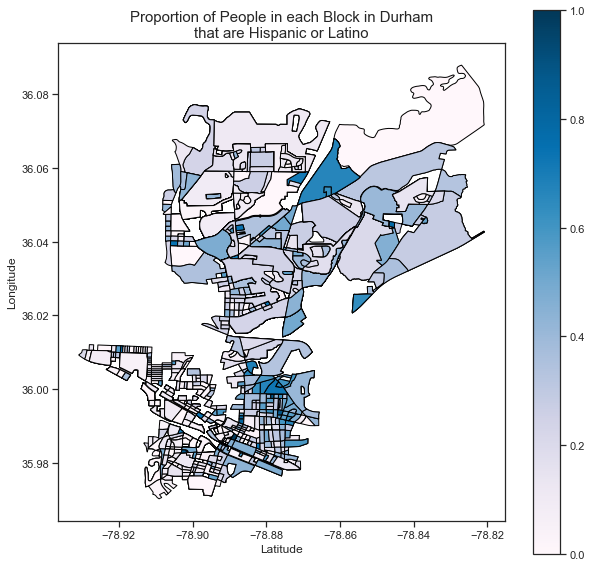

In [20]:
#Plot chloropleth map with merged data
fig, ax = plt.subplots(figsize = (10,10))
blockswithhispanics.plot(column='prophispanic',
                                legend=True,
                                cmap="PuBu", ax=ax, aspect=1, edgecolor = 'black');

# ax.set(title='Number of Calls by Police Beat')
plt.title("Proportion of People in each Block in Durham\nthat are Hispanic or Latino", fontsize = 15)
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

start of checking how callcountperperson correlates with a beats popdensity

In [21]:
beatswithhispanics = pd.merge(cblockDurhamBeats, hispanicdata, left_on ='GEOID20', right_on='geoid20')
#beatswithhispanics = gpd.sjoin(cblockDurhamBeats, durhamhispanicmap)
popsumbybeat = beatswithhispanics.groupby('Beat', as_index=False).sum()
popsumbybeat

Beat   ALAND20  AWATER20  total  total_hispanic_or_latino  \
0    111   1885019         0   3949                      1130   
1    112   1863048         0   3083                      1366   
2    113   2056983      1025   4094                      1038   
3    114   5975063     40919   5631                      1756   
4    121  12440369    123268   8025                      1803   
5    122   3167854      1644   3209                      1478   
6    123   7274612     85253   9036                      2629   
7    124  32035320    303409  14913                      1106   
8    211   5952891         0   6544                       965   
9    212   4111458         0   7901                      1256   
10   213   4283757       726   4962                      1528   
11   214  10682867     67825   6628                      1599   
12   221  18543956    286750  10284                       894   
13   222  10207102    104412  10888                      2800   
14   223   7320693     10035   8338                      1424   
15   224  20690360    239137  11682                      1335   
16   299  20342184   2127232    540                        11   
17   311   5501014         0   6954                      1014   
18   312   6289989      1510   7865                      1087   
19   313   6394389     17244  12372                      1713   
20   314   4896804      4206   6616                      1682   
21   321  15209054     79582   9605                      1377   
22   322  15676836     26434  15927                      1064   
23   323  10465852     66717   9264                       874   
24   324  15404774    104090  10982                       658   
25   411   2012555       757   3261                       446   
26   412   5331786      8163   7737                       885   
27   413   5690030      7478   4808                      1221   
28   414  13256904     57600  10761                      1486   
29   415   8174160    106957   9436                      1535   
30   421  10243290    118655  13874                      1503   
31   422  14355083    235549  11497                      1068   
32   423  25160283    240192  15092                      1231   
33   511   2044774         0   5505                       385   
34   512    882799         0   1646                       119   
35   513    797193         0   1677                       180   
36   999   2187405     14257    194                        43   

    total_not_hispanic_or_latino  
0                           2819  
1                           1717  
2                           3056  
3                           3875  
4                           6222  
5                           1731  
6                           6407  
7                          13807  
8                           5579  
9                           6645  
10                          3434  
11                          5029  
12                          9390  
13                          8088  
14                          6914  
15                         10347  
16                           529  
17                          5940  
18                          6778  
19                         10659  
20                          4934  
21                          8228  
22                         14863  
23                          8390  
24                         10324  
25                          2815  
26                          6852  
27                          3587  
28                          9275  
29                          7901  
30                         12371  
31                         10429  
32                         13861  
33                          5120  
34                          1527  
35                          1497  
36                           151

In [22]:
popsumbybeat['total'].sum()


284780

In [99]:
beatswithcalls2006 = gpd.sjoin(policebeats, dpdcalls2006)
callssummedinbeats2006 = beatswithcalls2006.groupby(['LAWBEAT']).size().to_frame(name = '2006calls_count').reset_index()
callssummedinbeats2006.sort_values(by='2006calls_count', inplace=True, ascending=False)
#callssummedinbeats2017['year']= '2017'
callssummedinbeats2006.head()

LAWBEAT  2006calls_count
32      511              679
24      411              660
9       212              618
0       111              579
10      213              575

In [100]:
beatswithcalls2007 = gpd.sjoin(policebeats, dpdcalls2007)
callssummedinbeats2007 = beatswithcalls2007.groupby(['LAWBEAT']).size().to_frame(name = '2007calls_count').reset_index()
#callssummedinbeats2017['year']= '2017'
callssummedinbeats2007.head()

LAWBEAT  2007calls_count
0      111              540
1      112              566
2      113              534
3      114              423
4      121              241

In [101]:
beatswithcalls2008 = gpd.sjoin(policebeats, dpdcalls2008)
callssummedinbeats2008 = beatswithcalls2008.groupby(['LAWBEAT']).size().to_frame(name = '2008calls_count').reset_index()
callssummedinbeats2008.sort_values(by='2008calls_count', inplace=True, ascending=False)
#callssummedinbeats2017['year']= '2017'
callssummedinbeats2008.head()

LAWBEAT  2008calls_count
32      511              675
24      411              624
1       112              586
2       113              582
0       111              581

In [102]:
beatswithcalls2009 = gpd.sjoin(policebeats, dpdcalls2009)
callssummedinbeats2009 = beatswithcalls2009.groupby(['LAWBEAT']).size().to_frame(name = '2009calls_count').reset_index()
callssummedinbeats2009.sort_values(by='2009calls_count', inplace=True, ascending=False)
#callssummedinbeats2017['year']= '2017'
callssummedinbeats2009.head()

LAWBEAT  2009calls_count
33      511              750
0       111              618
25      411              616
1       112              612
5       122              602

In [103]:
beatswithcalls2010 = gpd.sjoin(policebeats, dpdcalls2010)
callssummedinbeats2010 = beatswithcalls2010.groupby(['LAWBEAT']).size().to_frame(name = '2010calls_count').reset_index()
callssummedinbeats2010.sort_values(by='2010calls_count', inplace=True, ascending=False)
#callssummedinbeats2017['year']= '2017'
callssummedinbeats2010.head()

LAWBEAT  2010calls_count
14      223              609
5       122              594
32      511              589
26      413              589
0       111              582

In [104]:
beatswithcalls2011 = gpd.sjoin(policebeats, dpdcalls2011)
callssummedinbeats2011 = beatswithcalls2011.groupby(['LAWBEAT']).size().to_frame(name = '2011calls_count').reset_index()
callssummedinbeats2011.sort_values(by='2011calls_count', inplace=True, ascending=False)
#callssummedinbeats2017['year']= '2017'
callssummedinbeats2011.head()

LAWBEAT  2011calls_count
32      511              689
14      223              612
18      313              595
25      412              583
29      421              582

In [105]:
beatswithcalls2012 = gpd.sjoin(policebeats, dpdcalls2012)
callssummedinbeats2012 = beatswithcalls2012.groupby(['LAWBEAT']).size().to_frame(name = '2012calls_count').reset_index()
callssummedinbeats2012.sort_values(by='2012calls_count', inplace=True, ascending=False)
#callssummedinbeats2017['year']= '2017'
callssummedinbeats2012.head()

LAWBEAT  2012calls_count
32      511              692
11      214              657
14      223              647
18      313              633
25      412              613

In [91]:
beatswithcalls2013 = gpd.sjoin(policebeats, dpdcalls2013)
callssummedinbeats2013 = beatswithcalls2013.groupby(['LAWBEAT']).size().to_frame(name = '2013calls_count').reset_index()
callssummedinbeats2013.sort_values(by='2013calls_count', inplace=True, ascending=False)
#callssummedinbeats2017['year']= '2017'
callssummedinbeats2013.head()

LAWBEAT  2013calls_count
18      313              644
32      511              608
5       122              577
0       111              557
25      412              507

In [92]:
beatswithcalls2014 = gpd.sjoin(policebeats, dpdcalls2014)
callssummedinbeats2014 = beatswithcalls2014.groupby(['LAWBEAT']).size().to_frame(name = '2014calls_count').reset_index()
#callssummedinbeats2017['year']= '2017'
callssummedinbeats2014.head()

LAWBEAT  2014calls_count
0      111              538
1      112              453
2      113              481
3      114              425
4      121              336

In [106]:
beatswithcalls2015 = gpd.sjoin(policebeats, dpdcalls2015)
callssummedinbeats2015 = beatswithcalls2015.groupby(['LAWBEAT']).size().to_frame(name = '2015calls_count').reset_index()
#callssummedinbeats2017['year']= '2017'
callssummedinbeats2015.head()

LAWBEAT  2015calls_count
0      111              513
1      112              501
2      113              534
3      114              433
4      121              352

In [93]:
beatswithcalls2016 = gpd.sjoin(policebeats, dpdcalls2016)
callssummedinbeats2016 = beatswithcalls2016.groupby(['LAWBEAT']).size().to_frame(name = '2016calls_count').reset_index()
#callssummedinbeats2017['year']= '2017'
callssummedinbeats2016.head()

LAWBEAT  2016calls_count
0      111              485
1      112              496
2      113              489
3      114              439
4      121              304

In [94]:
beatswithcalls2017 = gpd.sjoin(policebeats, dpdcalls2017)
callssummedinbeats2017 = beatswithcalls2017.groupby(['LAWBEAT']).size().to_frame(name = '2017calls_count').reset_index()
#callssummedinbeats2017['year']= '2017'
callssummedinbeats2017.head()

LAWBEAT  2017calls_count
0      111              408
1      112              492
2      113              590
3      114              384
4      121              265

In [95]:
beatswithcalls2018 = gpd.sjoin(policebeats, dpdcalls2018)
callssummedinbeats2018 = beatswithcalls2018.groupby(['LAWBEAT']).size().to_frame(name = '2018calls_count').reset_index()
#callssummedinbeats2018['year']= '2018'
callssummedinbeats2018.head()

LAWBEAT  2018calls_count
0      111              360
1      112              496
2      113              481
3      114              411
4      121              291

In [96]:
beatswithcalls2019 = gpd.sjoin(policebeats, dpdcalls2019)
callssummedinbeats2019 = beatswithcalls2019.groupby(['LAWBEAT']).size().to_frame(name = '2019calls_count').reset_index()
#callssummedinbeats2019['year']= '2019'
callssummedinbeats2019.head()

LAWBEAT  2019calls_count
0      111              327
1      112              529
2      113              458
3      114              397
4      121              233

In [97]:
beatswithcalls2020 = gpd.sjoin(policebeats, dpdcalls2020)
callssummedinbeats2020 = beatswithcalls2020.groupby(['LAWBEAT']).size().to_frame(name = '2020calls_count').reset_index()
#callssummedinbeats2020['year']= '2020'
beatswithcalls2020 = pd.merge(policebeats, callssummedinbeats2020, on ='LAWBEAT')
beatswithcalls2020['year']= '2020'
beatswithcalls2020
callssummedinbeats2020.head()

LAWBEAT  2020calls_count
0      111              315
1      112              459
2      113              424
3      114              332
4      121              218

In [98]:
beatswithcalls2021 = gpd.sjoin(policebeats, dpdcalls)
callssummedinbeats2021 = beatswithcalls2021.groupby(['LAWBEAT']).size().to_frame(name = '2021calls_count').reset_index()
#callssummedinbeats2021['year']= '2021'
#callssummedinbeats2021 = pd.merge(callssummedinbeats2021, callssummedinbeats2020, on ='LAWBEAT')
beatswithcalls2021 = pd.merge(policebeats, callssummedinbeats2021, on ='LAWBEAT')
beatswithcalls2021['year']= '2021'
beatswithcalls2021['LAWBEAT']= beatswithcalls2021['LAWBEAT'].map(str)
beatswithcalls2021['year'] = beatswithcalls2021['year'].astype(str)
callssummedinbeats2021.head()

LAWBEAT  2021calls_count
0      111              376
1      112              365
2      113              470
3      114              343
4      121              261

In [107]:
beatswithcallsall = beatswithcalls2021.append(beatswithcalls2020)
callssummedinbeatsall = callssummedinbeats2021.append(callssummedinbeats2020)
callssummedinbeatsall = callssummedinbeatsall.append(callssummedinbeats2019)
callssummedinbeatsall['LAWBEAT']= callssummedinbeatsall['LAWBEAT'].map(str)
policebeats['LAWBEAT']= policebeats['LAWBEAT'].map(str)
callssummedinbeatsmerged = pd.merge(policebeats, callssummedinbeatsall, on ='LAWBEAT')
callssummedinbeatsmerged['FIPS']= '37063'
year = '2019'
callsinbeats2019 = callssummedinbeatsmerged[(callssummedinbeatsmerged['year']== year )]
callssummedinbeatsmerged

/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_40659/759399682.py:1: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_40659/759399682.py:2: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_40659/759399682.py:3: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



KeyError: 'year'

In [109]:
londoninnit = gpd.read_file('/Users/erikrobertsson/Documents/dataplus/statistical-gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.shp')
londoninnit.head()

NAME   GSS_CODE   HECTARES  NONLD_AREA ONS_INNER SUB_2009  \
0  Kingston upon Thames  E09000021   3726.117       0.000         F     None   
1               Croydon  E09000008   8649.441       0.000         F     None   
2               Bromley  E09000006  15013.487       0.000         F     None   
3              Hounslow  E09000018   5658.541      60.755         F     None   
4                Ealing  E09000009   5554.428       0.000         F     None   

  SUB_2006                                           geometry  
0     None  POLYGON ((516401.600 160201.800, 516407.300 16...  
1     None  POLYGON ((535009.200 159504.700, 535005.500 15...  
2     None  POLYGON ((540373.600 157530.400, 540361.200 15...  
3     None  POLYGON ((521975.800 178100.000, 521967.700 17...  
4     None  POLYGON ((510253.500 182881.600, 510249.900 18...

<AxesSubplot:>

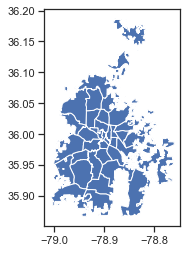

In [110]:
policebeats.plot()

In [112]:
merged = policebeats.set_index('LAWBEAT').join(callssummedinbeats2021.set_index('LAWBEAT'))
merged.head()

geometry  OBJECTID  \
LAWBEAT                                                                
111      POLYGON ((-78.89039 36.01517, -78.89038 36.015...        50   
112      POLYGON ((-78.88787 36.01473, -78.88734 36.014...        51   
113      POLYGON ((-78.87372 35.99369, -78.87458 35.991...        62   
114      MULTIPOLYGON (((-78.84053 35.95436, -78.84021 ...        65   
121      MULTIPOLYGON (((-78.80746 35.99706, -78.80746 ...        38   

            PERIMETER STATUS CONTIGUOUS LAWDIST  CAD GIS_DataA1    ShapeSTAre  \
LAWBEAT                                                                         
111      28608.800781      I        yes      D1  111       None  2.010252e+07   
112      26265.849609      I        yes      D1  112       None  2.079934e+07   
113      20667.539062      I        yes      D1  113       None  2.159195e+07   
114      53321.980469      I        yes      D1  114       None  6.103382e+07   
121      14495.120117      I         no      D1  121       None  7.008533e+06   

           ShapeSTLen  Beat  id  2021calls_count  
LAWBEAT                                           
111      28608.799743   111   0              NaN  
112      26265.852604   112   1              NaN  
113      20667.538873   113   2              NaN  
114      53321.974873   114   3              NaN  
121      14495.120026   121   4              NaN

In [118]:
callssummedinbeats2021.dtypes

LAWBEAT            int64
2021calls_count    int64
dtype: object

In [119]:
callssummedinbeats2020.dtypes

LAWBEAT            int64
2020calls_count    int64
dtype: object

In [120]:
callssummedinbeats2008.dtypes

LAWBEAT            int64
2008calls_count    int64
dtype: object

In [129]:
beatsforallyears = pd.merge(callssummedinbeats2021, callssummedinbeats2020, on ='LAWBEAT')
beatsforallyears = pd.merge(beatsforallyears, callssummedinbeats2019, on ='LAWBEAT')
beatsforallyears = pd.merge(beatsforallyears, callssummedinbeats2018, on ='LAWBEAT')
beatsforallyears = pd.merge(beatsforallyears, callssummedinbeats2017, on ='LAWBEAT')
beatsforallyears = pd.merge(beatsforallyears, callssummedinbeats2016, on ='LAWBEAT')
beatsforallyears = pd.merge(beatsforallyears, callssummedinbeats2015, on ='LAWBEAT')
beatsforallyears = pd.merge(beatsforallyears, callssummedinbeats2014, on ='LAWBEAT')
beatsforallyears = pd.merge(beatsforallyears, callssummedinbeats2013, on ='LAWBEAT')
beatsforallyears = pd.merge(beatsforallyears, callssummedinbeats2012, on ='LAWBEAT')
beatsforallyears = pd.merge(beatsforallyears, callssummedinbeats2011, on ='LAWBEAT')
beatsforallyears = pd.merge(beatsforallyears, callssummedinbeats2010, on ='LAWBEAT')
beatsforallyears = pd.merge(beatsforallyears, callssummedinbeats2009, on ='LAWBEAT')
beatsforallyears = pd.merge(beatsforallyears, callssummedinbeats2008, on ='LAWBEAT')
beatsforallyears = pd.merge(beatsforallyears, callssummedinbeats2007, on ='LAWBEAT')
beatsforallyears = pd.merge(beatsforallyears, callssummedinbeats2006, on ='LAWBEAT')
beatsforallyears['LAWBEAT']= beatsforallyears['LAWBEAT'].map(str)
beatsforallyears = pd.merge(policebeats, beatsforallyears, on ='LAWBEAT')
beatsforallyears

LAWBEAT                                           geometry  OBJECTID  \
0      111  POLYGON ((-78.89039 36.01517, -78.89038 36.015...        50   
1      112  POLYGON ((-78.88787 36.01473, -78.88734 36.014...        51   
2      113  POLYGON ((-78.87372 35.99369, -78.87458 35.991...        62   
3      114  MULTIPOLYGON (((-78.84053 35.95436, -78.84021 ...        65   
4      121  MULTIPOLYGON (((-78.80746 35.99706, -78.80746 ...        38   
..     ...                                                ...       ...   
31     423  MULTIPOLYGON (((-78.83466 35.94599, -78.83463 ...        95   
32     511  POLYGON ((-78.92318 36.01031, -78.92260 36.010...        53   
33     512  POLYGON ((-78.90313 36.00376, -78.90298 36.003...        57   
34     513  POLYGON ((-78.89561 35.99710, -78.89553 35.997...        61   
35     999  MULTIPOLYGON (((-78.94297 35.89150, -78.94296 ...         4   

        PERIMETER STATUS CONTIGUOUS LAWDIST  CAD GIS_DataA1    ShapeSTAre  \
0    28608.800781      I        yes      D1  111       None  2.010252e+07   
1    26265.849609      I        yes      D1  112       None  2.079934e+07   
2    20667.539062      I        yes      D1  113       None  2.159195e+07   
3    53321.980469      I        yes      D1  114       None  6.103382e+07   
4    14495.120117      I         no      D1  121       None  7.008533e+06   
..            ...    ...        ...     ...  ...        ...           ...   
31  151917.093750      I        yes      D4  423       None  2.561465e+08   
32   32615.019531      I        yes      D5  511       None  2.129644e+07   
33   16338.889648      I        yes      D5  512       None  9.305014e+06   
34   20647.179688      I        yes      D5  513       None  9.114313e+06   
35    1308.963013   None       None     DSO  DSO       None  6.932677e+04   

       ShapeSTLen  Beat  id  2021calls_count  2020calls_count  \
0    28608.799743   111   0              376              315   
1    26265.852604   112   1              365              459   
2    20667.538873   113   2              470              424   
3    53321.974873   114   3              343              332   
4    14495.120026   121   4              261              218   
..            ...   ...  ..              ...              ...   
31  151917.121852   423  32              568              449   
32   32615.017763   511  33              437              400   
33   16338.888321   512  34              420              346   
34   20647.175971   513  35              533              400   
35    1308.962953   999  36                5                1   

    2019calls_count  2018calls_count  2017calls_count  2016calls_count  \
0               327              360              408              485   
1               529              496              492              496   
2               458              481              590              489   
3               397              411              384              439   
4               233              291              265              304   
..              ...              ...              ...              ...   
31              429              428              445              449   
32              656              569              608              729   
33              522              392              336              340   
34              544              451              502              550   
35                2                5                5                6   

    2015calls_count  2014calls_count  2013calls_count  2012calls_count  \
0               513              538              557              601   
1               501              453              493              548   
2               534              481              480              539   
3               433              425              460              513   
4               352              336              320              344   
..              ...              ...              ...          

In [130]:
# save all the maps in the charts folder
output_path = "/Users/erikrobertsson/Documents/dataplus/maps"

# counter for the for loop
i = 0

# list of years (which are the column names at the moment)
list_of_years = ['2021calls_count','2020calls_count','2019calls_count','2018calls_count','2017calls_count','2016calls_count','2015calls_count','2014calls_count','2013calls_count','2012calls_count','2011calls_count','2010calls_count','2009calls_count','2008calls_count','2007calls_count','2006calls_count']


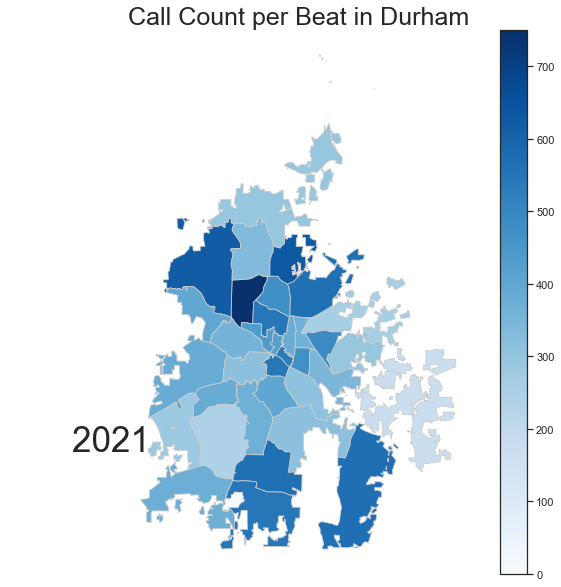

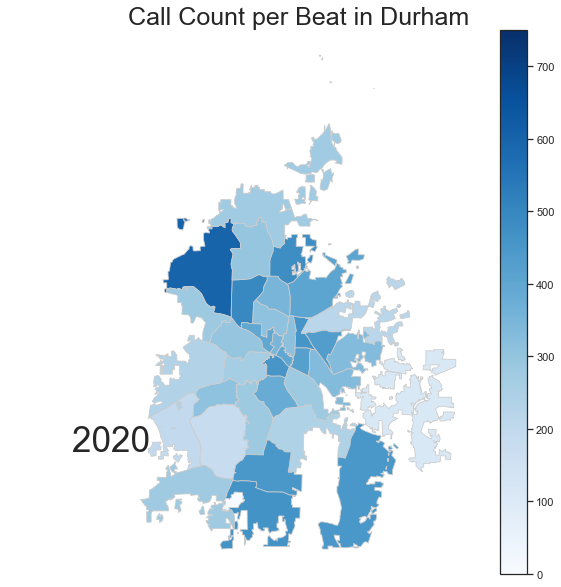

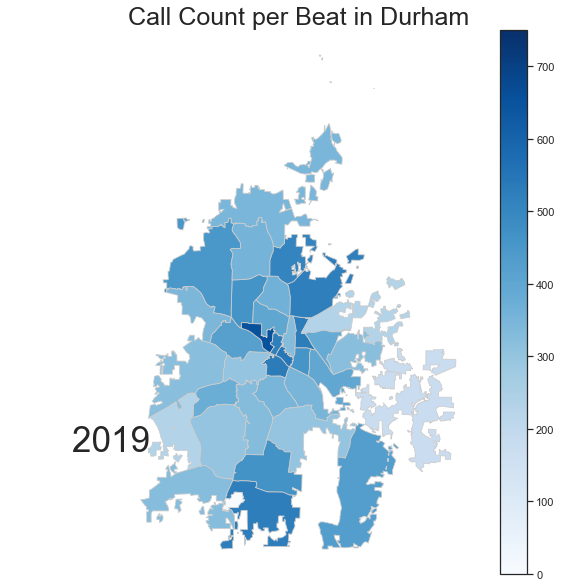

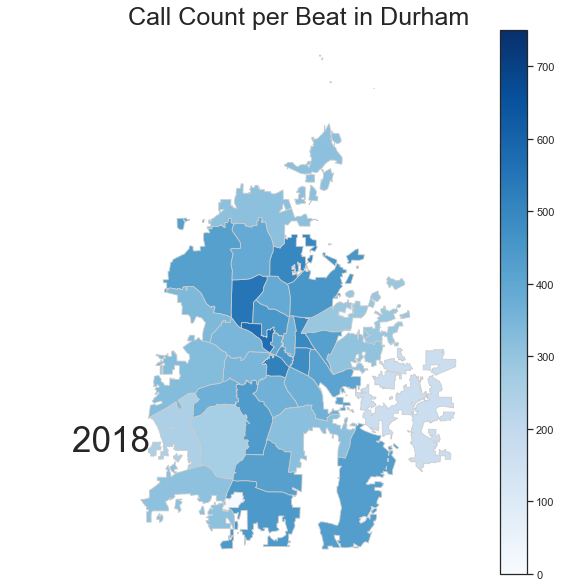

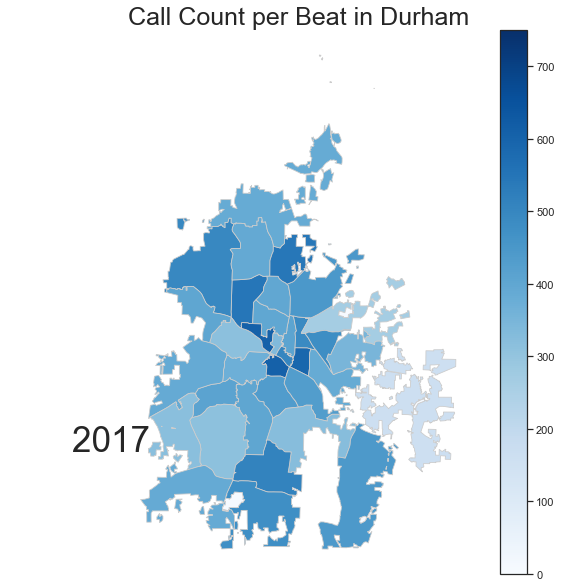

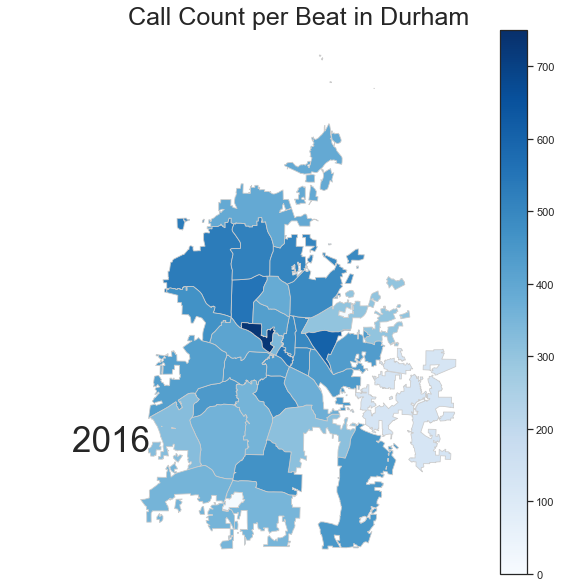

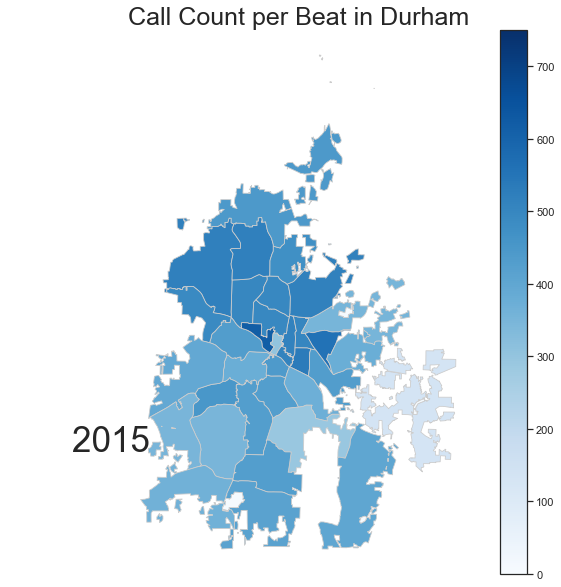

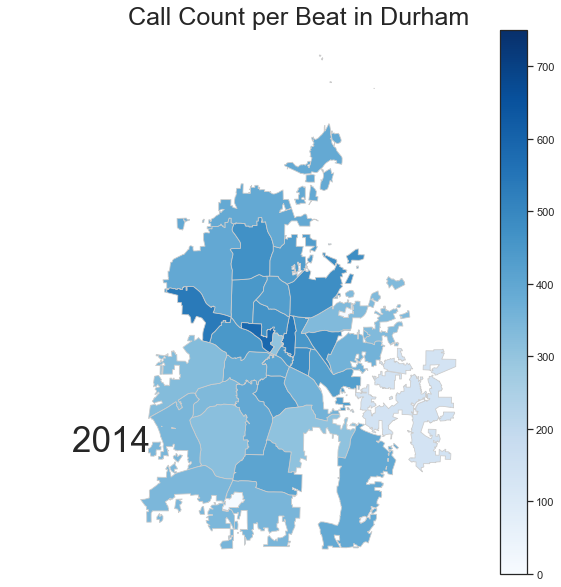

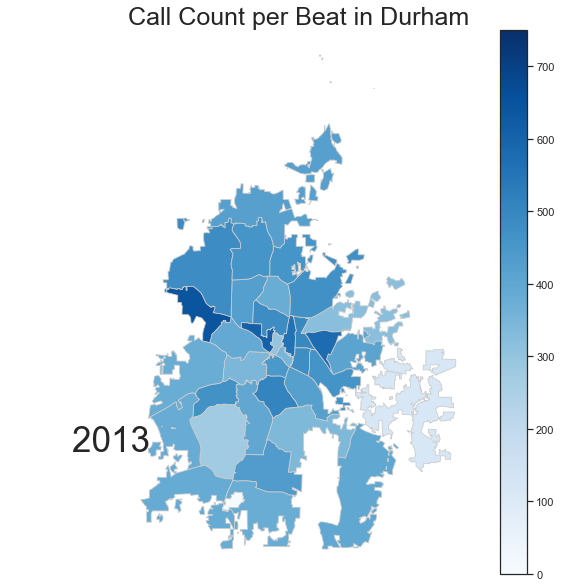

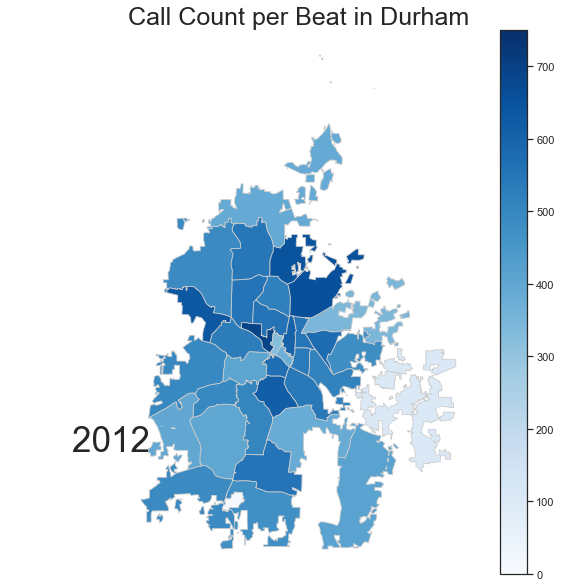

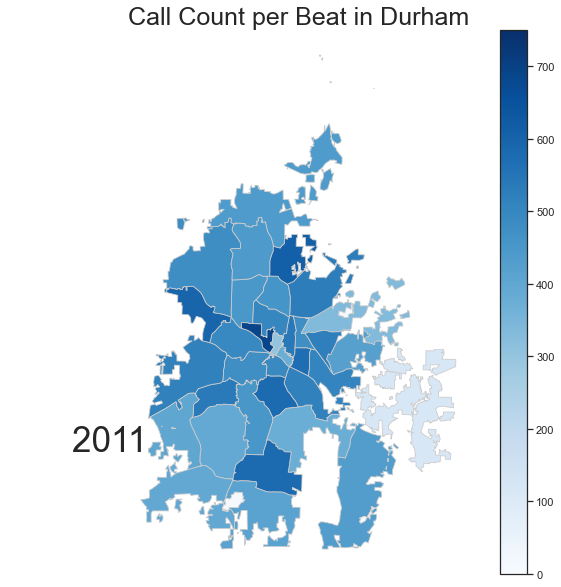

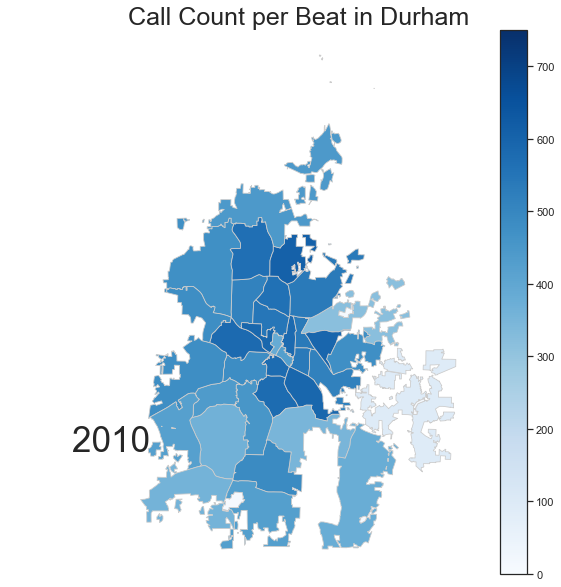

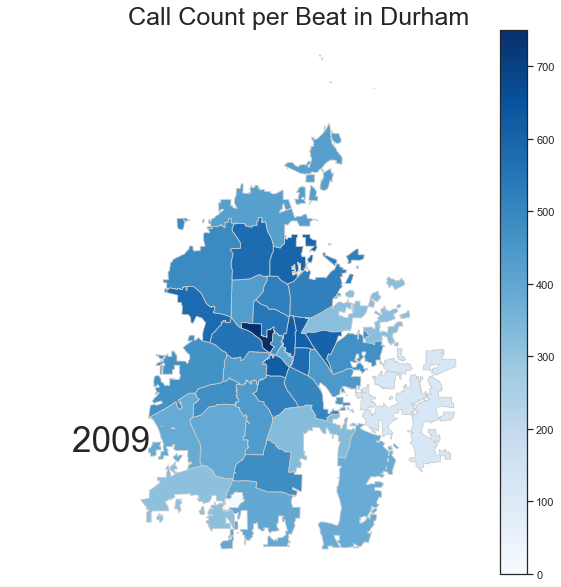

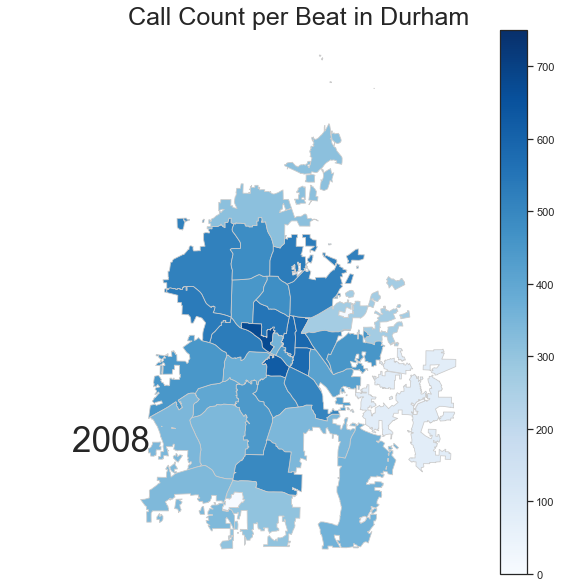

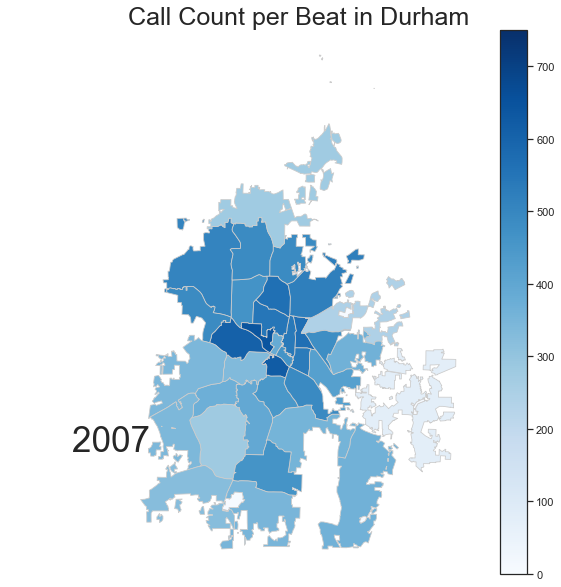

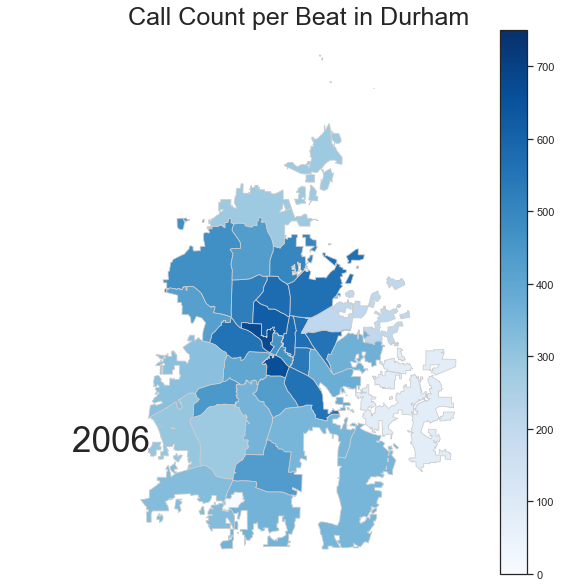

In [140]:
beatsforallyears['coords'] = beatsforallyears['geometry'].apply(lambda x: x.representative_point().coords[:])
beatsforallyears['coords'] = [coords[0] for coords in beatsforallyears['coords']]

# set the min and max range for the choropleth map
vmin, vmax = 0, 750

# start the for loop to create one map per year
for year in list_of_years:
    
    # create map, UDPATE: added plt.Normalize to keep the legend range the same for all maps
    fig = beatsforallyears.plot(column=year, cmap='Blues', figsize=(10,10), linewidth=0.8, edgecolor='0.8', vmin=vmin, vmax=vmax,
legend=True, norm=plt.Normalize(vmin=vmin, vmax=vmax))
    
    # remove axis of chart
    fig.axis('off')
    
    # add a title
    fig.set_title('Call Count per Beat in Durham', \
              fontdict={'fontsize': '25',
                         'fontweight' : '3'})
    
    # create an annotation for the year by grabbing the first 4 digits
    only_year = year[:4]
    # position the annotation to the bottom left
    fig.annotate(only_year,
            xy=(0.1, .225), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=35)
    
    # this will save the figure as a high-res png in the output path. you can also save as svg if you prefer.
    filepath = os.path.join(output_path, only_year+'_violence.jpg')
    chart = fig.get_figure()
    chart.savefig(filepath, dpi=300)    

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import geopandas as gpd

In [70]:
#read the file stored in variable fp
map_df = policebeats
#check data type so we can see that this is a GEOdataframe
map_df.head()

LAWBEAT                                           geometry  OBJECTID  \
0     111  POLYGON ((-78.89039 36.01517, -78.89038 36.015...        50   
1     112  POLYGON ((-78.88787 36.01473, -78.88734 36.014...        51   
2     113  POLYGON ((-78.87372 35.99369, -78.87458 35.991...        62   
3     114  MULTIPOLYGON (((-78.84053 35.95436, -78.84021 ...        65   
4     121  MULTIPOLYGON (((-78.80746 35.99706, -78.80746 ...        38   

      PERIMETER STATUS CONTIGUOUS LAWDIST  CAD GIS_DataA1    ShapeSTAre  \
0  28608.800781      I        yes      D1  111       None  2.010252e+07   
1  26265.849609      I        yes      D1  112       None  2.079934e+07   
2  20667.539062      I        yes      D1  113       None  2.159195e+07   
3  53321.980469      I        yes      D1  114       None  6.103382e+07   
4  14495.120117      I         no      D1  121       None  7.008533e+06   

     ShapeSTLen  Beat  id  
0  28608.799743   111   0  
1  26265.852604   112   1  
2  20667.538873   113   2  
3  53321.974873   114   3  
4  14495.120026   121   4

In [71]:
df = dpdcalls
df.head()

Event Numb Case Numbe Call Date        time             Source Priority  \
70     21000113       None  1/1/2021  12:41:03AM  Wireless 911 Call        2   
71     21000114       None  1/1/2021  12:41:53AM  Wireless 911 Call        3   
74     21000119       None  1/1/2021  12:44:24AM              E-911        3   
114    21000186       None  1/1/2021   1:19:04AM              E-911        3   
189    21000338       None  1/1/2021   4:26:38AM  Wireless 911 Call        3   

                   Nature            Address        X       Y District Beat  \
70   TRESPASS OR UNWANTED      2300 GUESS RD  2022916  828272       D2  211   
71                 CRISIS         0 HAYTI LN  2030397  813534       D4  411   
74          WELFARE CHECK      500 E MAIN ST  2031074  816191       D5  513   
114  TRESPASS OR UNWANTED  2100 N ROXBORO ST  2032434  825627       D2  213   
189                CRISIS    200 N DRIVER ST  2036165  814339       D1  113   

                  Dispositio  Cancelled                    geometry  
70   Resolved Without Report          0  POINT (-78.92250 36.02572)  
71   Resolved Without Report          0  POINT (-78.89725 35.98522)  
74   Resolved Without Report          0  POINT (-78.89496 35.99252)  
114  Resolved Without Report          0  POINT (-78.89032 36.01843)  
189  Resolved Without Report          0  POINT (-78.87775 35.98741)

In [75]:
#Get district wise installation count
df_district = df['Beat'].value_counts().to_frame()
df_district.reset_index(inplace=True)
df_district.columns = ['Beat','count']
df_district.head()

Beat  count
0  211    639
1  221    532
2  223    507
3  411    463
4  214    460

In [76]:
#Merge the districts df with the geopandas df
merged = map_df.set_index('LAWBEAT').join(df_district.set_index('Beat'))
merged.head()

geometry  OBJECTID  \
LAWBEAT                                                                
111      POLYGON ((-78.89039 36.01517, -78.89038 36.015...        50   
112      POLYGON ((-78.88787 36.01473, -78.88734 36.014...        51   
113      POLYGON ((-78.87372 35.99369, -78.87458 35.991...        62   
114      MULTIPOLYGON (((-78.84053 35.95436, -78.84021 ...        65   
121      MULTIPOLYGON (((-78.80746 35.99706, -78.80746 ...        38   

            PERIMETER STATUS CONTIGUOUS LAWDIST  CAD GIS_DataA1    ShapeSTAre  \
LAWBEAT                                                                         
111      28608.800781      I        yes      D1  111       None  2.010252e+07   
112      26265.849609      I        yes      D1  112       None  2.079934e+07   
113      20667.539062      I        yes      D1  113       None  2.159195e+07   
114      53321.980469      I        yes      D1  114       None  6.103382e+07   
121      14495.120117      I         no      D1  121       None  7.008533e+06   

           ShapeSTLen  Beat  id  count  
LAWBEAT                                 
111      28608.799743   111   0  298.0  
112      26265.852604   112   1  314.0  
113      20667.538873   113   2  361.0  
114      53321.974873   114   3  249.0  
121      14495.120026   121   4  175.0

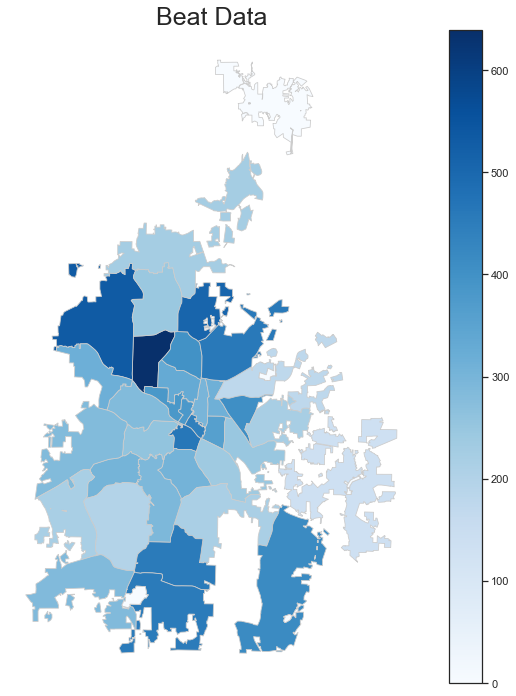

In [79]:
#Fill NA values
merged['count'].fillna(0,inplace=True)
#Get max count
max_installs = merged['count'].max()

#Generate the choropleth map
fig, ax = plt.subplots(1, figsize=(12, 12))
merged.plot(column='count', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

# remove the axis
ax.axis('off')
# add a title
ax.set_title('Beat Data', fontdict={'fontsize': '25', 'fontweight' : '3'})

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=0, vmax=max_installs))
# add the colorbar to the figure
cbar = fig.colorbar(sm)

In [85]:
df['Call Date'] = pd.to_datetime(df['Call Date'],format="%m/%d/%Y")
df

Event Numb Case Numbe  Call Date        time             Source  \
70        21000113       None 2021-01-01  12:41:03AM  Wireless 911 Call   
71        21000114       None 2021-01-01  12:41:53AM  Wireless 911 Call   
74        21000119       None 2021-01-01  12:44:24AM              E-911   
114       21000186       None 2021-01-01   1:19:04AM              E-911   
189       21000338       None 2021-01-01   4:26:38AM  Wireless 911 Call   
...            ...        ...        ...         ...                ...   
278107    21478051       None 2021-12-31   8:29:54PM              E-911   
278116    21478064       None 2021-12-31   8:36:46PM  Wireless 911 Call   
278155    21478122       None 2021-12-31   9:21:17PM         Phone Call   
278215    21478215       None 2021-12-31  10:36:21PM  Wireless 911 Call   
278271    21478336       None 2021-12-31  11:51:01PM  Wireless 911 Call   

       Priority                Nature                Address        X       Y  \
70            2  TRESPASS OR UNWANTED          2300 GUESS RD  2022916  828272   
71            3                CRISIS             0 HAYTI LN  2030397  813534   
74            3         WELFARE CHECK          500 E MAIN ST  2031074  816191   
114           3  TRESPASS OR UNWANTED      2100 N ROXBORO ST  2032434  825627   
189           3                CRISIS        200 N DRIVER ST  2036165  814339   
...         ...                   ...                    ...      ...     ...   
278107        3  TRESPASS OR UNWANTED   3400 HILLSBOROUGH RD  2015445  826468   
278116        3  TRESPASS OR UNWANTED         700 LINDLEY DR  2045812  810608   
278155        2  URGENT WELFARE CHECK   600 W CHAPEL HILL ST  2026386  817495   
278215        2        SUICIDE THREAT    200 N BUCHANAN BLVD  2026005  820358   
278271        3  TRESPASS OR UNWANTED  1600 T W ALEXANDER DR  2045831  791379   

       District Beat               Dispositio  Cancelled  \
70           D2  211  Resolved Without Report          0   
71           D4  411  Resolved Without Report          0   
74           D5  513  Resolved Without Report          0   
114          D2  213  Resolved Without Report          0   
189          D1  113  Resolved Without Report          0   
...         ...  ...                      ...        ...   
278107       D2  221  Resolved Without Report          0   
278116       D1  114  Resolved Without Report          0   
278155       D5  511  Resolved Without Report          0   
278215       D2  212  Resolved Without Report          0   
278271       D4  423                Unfounded          0   

                          geometry  
70      POINT (-78.92250 36.02572)  
71      POINT (-78.89725 35.98522)  
74      POINT (-78.89496 35.99252)  
114     POINT (-78.89032 36.01843)  
189     POINT (-78.87775 35.98741)  
...                            ...  
278107  POINT (-78.94777 36.02078)  
278116  POINT (-78.84517 35.97713)  
278155  POINT (-78.91080 35.99611)  
278215  POINT (-78.91208 36.00398)  
278271  POINT (-78.84520 35.92430)  

[11697 rows x 15 columns]

In [95]:
import os

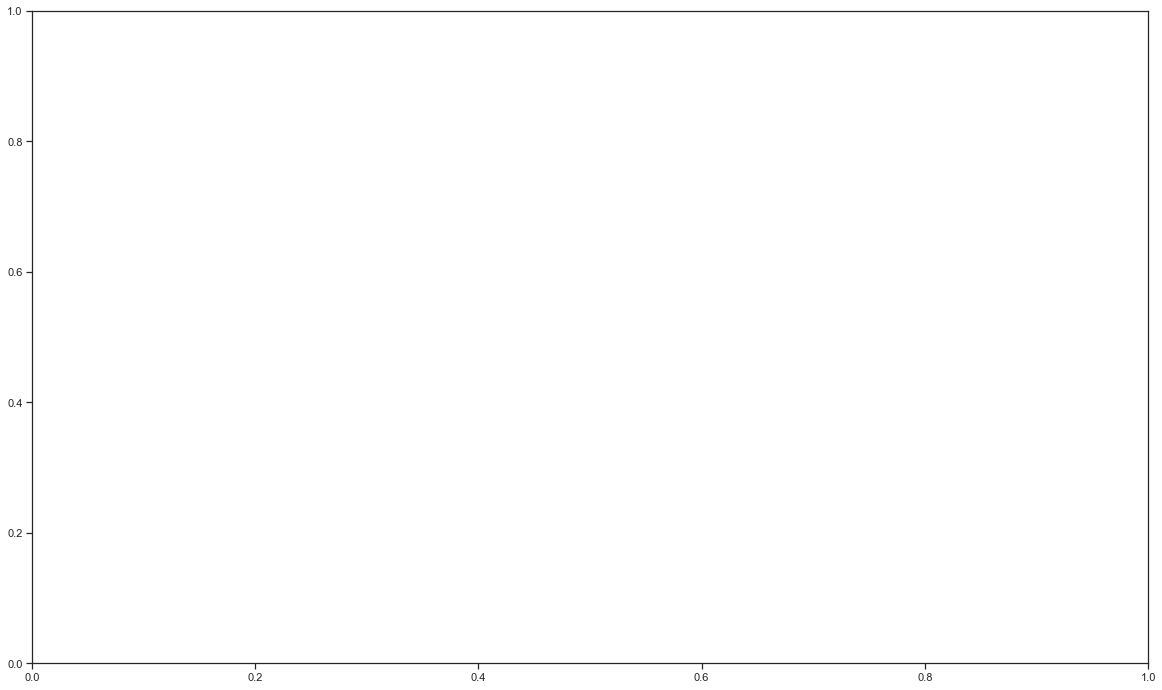

In [101]:
date_min = df['Call Date'].min()
n_days = df['Call Date'].nunique()
fig, ax = plt.subplots(1, figsize=(20, 12))
for i in range(0,n_days):
    date = date_min+timedelta(days=i)
    
    #Get cumulative df till that date
    df_c = df[df['Call Date'] <= date]
    
    #Generate the temporary df
    df_t = df_c['Beat'].value_counts().to_frame()
    df_t.reset_index(inplace=True)
    df_t.columns = ['Beat','count']
    
    #Get the merged df
    df_m= map_df.set_index('LAWBEAT').join(df_t.set_index('Beat'))
    df_m['count'].fillna(0,inplace=True)
    fig, ax = plt.subplots(1, figsize=(20, 12))
    df_m.plot(column='count',
                cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')
    
    # remove the axis
    ax.axis('off')
    # add a title
    ax.set_title('District-wise Dummy Data', 
                 fontdict={'fontsize': '25', 'fontweight' : '3'})   
    
    # Create colorbar as a legend
    sm = plt.cm.ScalarMappable(cmap='Blues', 
            norm=plt.Normalize(vmin=0, vmax=df_t['count'].iloc[0]))
    # add the colorbar to the figure
    cbar = fig.colorbar(sm)
    fontsize = 36
    
    # Positions for the date
    date_x = 82
    date_y = 29

    ax.text(date_x, date_y, 
            f"{date.strftime('%b %d, %Y')}", 
            color='black',
            fontsize=fontsize)
    
    output_path = 'charts/maps'
    path = "/Users/erikrobertsson/Documents/dataplus"
    
    filepath = os.path.join(path+'_callcounts.jpg')
    chart = fig.get_figure()
    chart.savefig(filepath, dpi=300)
    
    plt.close()

In [81]:
dpdcalls

Event Numb Case Numbe   Call Date        time             Source  \
70        21000113       None    1/1/2021  12:41:03AM  Wireless 911 Call   
71        21000114       None    1/1/2021  12:41:53AM  Wireless 911 Call   
74        21000119       None    1/1/2021  12:44:24AM              E-911   
114       21000186       None    1/1/2021   1:19:04AM              E-911   
189       21000338       None    1/1/2021   4:26:38AM  Wireless 911 Call   
...            ...        ...         ...         ...                ...   
278107    21478051       None  12/31/2021   8:29:54PM              E-911   
278116    21478064       None  12/31/2021   8:36:46PM  Wireless 911 Call   
278155    21478122       None  12/31/2021   9:21:17PM         Phone Call   
278215    21478215       None  12/31/2021  10:36:21PM  Wireless 911 Call   
278271    21478336       None  12/31/2021  11:51:01PM  Wireless 911 Call   

       Priority                Nature                Address        X       Y  \
70            2  TRESPASS OR UNWANTED          2300 GUESS RD  2022916  828272   
71            3                CRISIS             0 HAYTI LN  2030397  813534   
74            3         WELFARE CHECK          500 E MAIN ST  2031074  816191   
114           3  TRESPASS OR UNWANTED      2100 N ROXBORO ST  2032434  825627   
189           3                CRISIS        200 N DRIVER ST  2036165  814339   
...         ...                   ...                    ...      ...     ...   
278107        3  TRESPASS OR UNWANTED   3400 HILLSBOROUGH RD  2015445  826468   
278116        3  TRESPASS OR UNWANTED         700 LINDLEY DR  2045812  810608   
278155        2  URGENT WELFARE CHECK   600 W CHAPEL HILL ST  2026386  817495   
278215        2        SUICIDE THREAT    200 N BUCHANAN BLVD  2026005  820358   
278271        3  TRESPASS OR UNWANTED  1600 T W ALEXANDER DR  2045831  791379   

       District Beat               Dispositio  Cancelled  \
70           D2  211  Resolved Without Report          0   
71           D4  411  Resolved Without Report          0   
74           D5  513  Resolved Without Report          0   
114          D2  213  Resolved Without Report          0   
189          D1  113  Resolved Without Report          0   
...         ...  ...                      ...        ...   
278107       D2  221  Resolved Without Report          0   
278116       D1  114  Resolved Without Report          0   
278155       D5  511  Resolved Without Report          0   
278215       D2  212  Resolved Without Report          0   
278271       D4  423                Unfounded          0   

                          geometry  
70      POINT (-78.92250 36.02572)  
71      POINT (-78.89725 35.98522)  
74      POINT (-78.89496 35.99252)  
114     POINT (-78.89032 36.01843)  
189     POINT (-78.87775 35.98741)  
...                            ...  
278107  POINT (-78.94777 36.02078)  
278116  POINT (-78.84517 35.97713)  
278155  POINT (-78.91080 35.99611)  
278215  POINT (-78.91208 36.00398)  
278271  POINT (-78.84520 35.92430)  

[11697 rows x 15 columns]

In [ ]:
scl = [[0.0, '#ffffff'],[0.2, '#ff9999'],[0.4, '#ff4d4d'], 
       [0.6, '#ff1a1a'],[0.8, '#cc0000'],[1.0, '#4d0000']] # reds

for col in callsinbeats2019.columns:
    callsinbeats2019[col] = callsinbeats2019[col].astype(str)
    
callsinbeats2019['text'] = callsinbeats2019['LAWBEAT']+'calls_count: '+callsinbeats2019['calls_count']

In [ ]:
fips = ['37063']
values = range(len(fips))

data = [ dict(
            type='choropleth', # type of map-plot
            colorscale = scl,
            autocolorscale = False,
            fips=fips, values=values,
            locations = callsinbeats2019['LAWBEAT'], # the column with the state
            z = callsinbeats2019['calls_count'].astype(float), # the variable I want to color-code
            #locationmode = 'USA-states',
            text = callsinbeats2019['text'], # hover text
            marker = dict(     # for the lines separating states
                        line = dict (
                                  color = 'rgb(255,255,255)', 
                                  width = 2) ),               
            colorbar = dict(
                        title = "Calls count by beat in Durham")
            ) 
       ]

fig = dict( data=data )



plotly.offline.iplot(fig)

In [ ]:
layout = dict(
        title = year,
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),

#              showlakes = True,  # if you want to give color to the lakes

#             lakecolor = 'rgb(73, 216, 230)'  
            ),
             )


fig = dict( data=data, layout=layout )



plotly.offline.iplot(fig)

In [30]:
scl = [[0.0, '#ffffff'],[0.2, '#ff9999'],[0.4, '#ff4d4d'], \
       [0.6, '#ff1a1a'],[0.8, '#cc0000'],[1.0, '#4d0000']] # reds

data_slider = []

In [31]:
#### I populate the data object

for year in callssummedinbeatsmerged.year.unique():


    # I select the year (and remove DC for now)
    callsinbeats2019 = callssummedinbeatsmerged[(callssummedinbeatsmerged['year']== year )]

    for col in callsinbeats2019.columns:  # I transform the columns into string type so I can:
        callsinbeats2019[col] = callsinbeats2019[col].astype(str)

    ### I create the text for mouse-hover for each state, for the current year    
    callsinbeats2019['text'] = callsinbeats2019['LAWBEAT']

    ### create the dictionary with the data for the current year
    data_one_year = dict(
                        type='choropleth',
                        locations = callsinbeats2019['LAWBEAT'],
                        z=callsinbeats2019['calls_count'].astype(float),
                        #locationmode='USA-states',
                        colorscale = scl,
                        text = callsinbeats2019['text'],
                        )

    data_slider.append(data_one_year)  # I add the dictionary to the list of dictionaries for the slider

In [32]:
##  I create the steps for the slider

steps = []

for i in range(len(data_slider)):
    step = dict(method='restyle',
                args=['visible', [False] * len(data_slider)],
                label='Year {}'.format(i + 2019)) # label to be displayed for each step (year)
    step['args'][1][i] = True
    steps.append(step)


##  I create the 'sliders' object from the 'steps' 

sliders = [dict(active=0, pad={"t": 1}, steps=steps)]  

In [33]:
# I set up the layout (including slider option)

layout = dict(geo=dict(scope='usa',
                       projection={'type': 'albers usa'}),
              sliders=sliders)


# I create the figure object:

fig = dict(data=data_slider, layout=layout) 



# to plot in the notebook

plotly.offline.iplot(fig)



# to plot in a separete browser window

#offline.plot(fig, auto_open=True, image = 'png', image_filename="map_us_crime_slider" ,image_width=2000, image_height=1000, 
              #filename='/your_path/map_us_crime_slider.html', validate=True

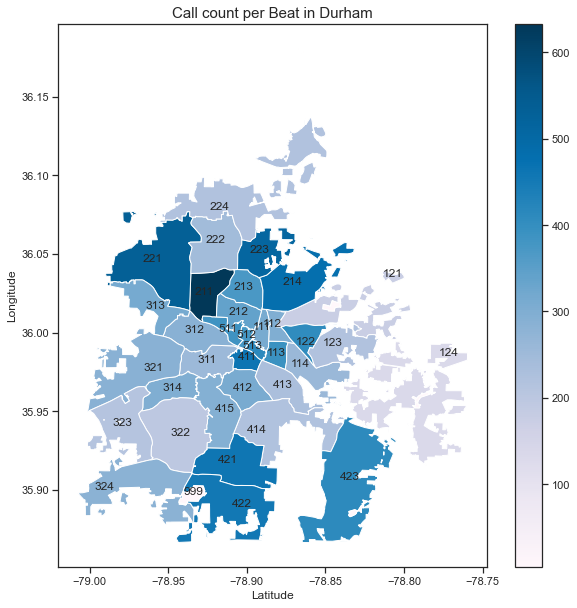

In [42]:
beatswithcalls2021['coords'] = beatswithcalls2021['geometry'].apply(lambda x: x.representative_point().coords[:])
beatswithcalls2021['coords'] = [coords[0] for coords in beatswithcalls2021['coords']]

#Plot chloropleth map with merged data
fig, ax = plt.subplots(figsize = (10,10))
beatswithcalls2021.plot(column='calls_count',
                                legend=True,
                                cmap="PuBu", ax=ax, aspect=1, edgecolor = 'white');
texts =[ax.text(row.coords[0], row.coords[1], s=row["LAWBEAT"], horizontalalignment='center') for idx, row in beatswithcalls2021.iterrows()]

# ax.set(title='Number of Calls by Police Beat')
plt.title("Call count per Beat in Durham", fontsize = 15)
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

In [ ]:
beatswithcalls2021['coords'] = beatswithcalls2021['geometry'].apply(lambda x: x.representative_point().coords[:])
beatswithcalls2021['coords'] = [coords[0] for coords in beatswithcalls2021['coords']]

fig, ax = plt.subplots(figsize=(10,10))
beatswithcalls2021.plot(column="calls_count", k=5, cmap='PuBu',  edgecolor = 'white', legend=True, ax=ax)
texts =[ax.text(row.coords[0], row.coords[1], s=row["LAWBEAT"], horizontalalignment='center') for idx, row in beatswithcalls2021.iterrows()]
plt.title('Spatial distribution of awl \n ')
plt.tight_layout()
#ax.axis("off")
#plt.savefig('myMap.png',dpi=150, bbox_inches='tight')
plt.show()

In [ ]:
# set the value column that will be visualised
variable = 'calls_count'
# set the range for the choropleth values
vmin, vmax = 200, 650
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 10))
# remove the axis
ax.axis('off')
# add a title and annotation
ax.set_title('# of Calls per Durham Beat', fontdict={'fontsize': '25', 'fontweight' : '3'})
ax.annotate('Source: Wikipedia - https://en.wikipedia.org/wiki/Provinces_of_Indonesia', xy=(0.6, .05), xycoords='figure fraction', fontsize=12, color='#555555')
# Create colorbar legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm.set_array([]) # or alternatively sm._A = []. Not sure why this step is necessary, but many recommends it
# add the colorbar to the figure
fig.colorbar(sm)
# create map
beatswithcalls2021.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

# Add Labels
beatswithcalls2021['coords'] = beatswithcalls2021['geometry'].apply(lambda x: x.representative_point().coords[:])
beatswithcalls2021['coords'] = [coords[0] for coords in beatswithcalls2021['coords']]
for idx, row in beatswithcalls2021.iterrows():
    plt.annotate(s=row['LAWBEAT'], xy=row['coords'],horizontalalignment='center')


In [ ]:
def save_fig(policebeats, cmp, vmx, outDir, name, displayPlot=True):
    base = policebeats.plot(figsize=(20,20), vmin=1, vmax=vmx, column="LAWBEAT", cmap=cmp, edgecolor="black",
                       linewidth=0.2)

 

    policebeats.dropna(subset=["LAWBEAT"]).plot(ax=base, vmin=1, vmax=vmx, column="dist", cmap=cmp)
    
    callssummedinbeatsaller.plot(ax=base, linewidth=2, color=(0,0,0,0), edgecolor="black")
    plt.axis("off")
    plt.tight_layout()
    plt.savefig(os.path.join('/Users/erikrobertsson/Documents/dataplus', name + ".png"), dpi=200)
    if not displayPlot :
        plt.show()

In [ ]:
# merge the count data with the shapefile for plotting
callssummedinbeatstry = policebeats_geojson.join(callssummedinbeatsall.set_index('LAWBEAT'))
callssummedinbeatstry.dtypes

In [ ]:
# reformat Date as string for plotly
callssummedinbeatsaller['year'] = callssummedinbeatsaller['year'].astype(str)

fig = px.choropleth_mapbox(callssummedinbeatsaller,
                           geojson=policebeats_geojson,
                           featureidkey='properties.name',
                           locations='LAWBEAT',
                           color='calls_count',
                           hover_name='LAWBEAT',
                           hover_data=['calls_count'],
                           color_continuous_scale='Reds',
                           animation_frame='year',
                           mapbox_style='carto-positron',
                           title='Cumulative Numbers of Calls in Durham Beats',
                           center={'lat':36.00, 'lon':-78.90},
                           zoom=11,
                           opacity=0.75,
                           labels={'calls_count':'calls_count'},
                           width=1100,
                           height=800
                          )
texts =[ax.text(row.coords[0], row.coords[1], s=row["LAWBEAT"], horizontalalignment='center') for idx, row in beatswithcalls2021.iterrows()]

fig.show()

In [ ]:
fig, ax = plt.subplots(figsize = (12,10))

callssummedinbeatstry.plot(column='calls_count', cmap='Reds', linewidth=1, ax=ax, 
                  edgecolor='0.3', alpha = 0.8)

# labels will be placed at the polygon's center
callssummedinbeatstry['lbl_pts'] = callssummedinbeatstry['geometry'].\
                          apply(lambda x: x.representative_point().coords[0])

# annotate polygons with neighborhood name abbreviations
for _ , row in callssummedinbeatstry.iterrows():
    plt.annotate(xy=row['lbl_pts'], ha='center', text = callssummedinbeatstry['CAD'])
    

sm = plt.cm.ScalarMappable(cmap='Reds' , 
            norm=plt.Normalize(vmin=min(callssummedinbeatstry['calls_count']), 
                               vmax=max(callssummedinbeatstry['calls_count'])))

ax.axis('off')
cbar = fig.colorbar(sm)
                     
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize = (12,10))

beatswithcallsall.plot(column='calls_count', cmap='Reds', linewidth=1, ax=ax, 
                  edgecolor='0.3', alpha = 0.8)

# labels will be placed at the polygon's center
beatswithcallsall['lbl_pts'] = beatswithcallsall['geometry'].\
                          apply(lambda x: x.representative_point().coords[0])

# annotate polygons with neighborhood name abbreviations
for _ , row in beatswithcallsall.iterrows():
    plt.annotate('xy=row['lbl_pts'], ha='center', text ='LAWBEAT')
    

sm = plt.cm.ScalarMappable(cmap='Reds' , 
            norm=plt.Normalize(vmin=min(beatswithcallsall['calls_count']), 
                               vmax=max(beatswithcallsall['calls_count'])))

#ax.axis('off')
cbar = fig.colorbar(sm)
                     
plt.show()

In [ ]:
#fig, ax = plt.subplots(figsize = (10,10))
#mappingdatasetforpolicebeats.plot(column='callcountperperson',
                                #legend=True,
                                #cmap="PuBu", ax=ax, aspect=1, edgecolor = 'black');
fig = px.choropleth_mapbox(callssummedinbeatsall,
                           geojson=policebeats_geojson,
                           featureidkey='properties.name',
                           locations='LAWBEAT',
                           color='calls_count',
                           hover_name='LAWBEAT',
                           hover_data=['calls_count'],
                           color_continuous_scale='Reds',
                           animation_frame='year',
                           mapbox_style='carto-positron',
                           title='Cumulative Numbers of Crimes in Vancouver Neighborhoods',
                           center={'lat':36.00, 'lon':-78.90},
                           zoom=11,
                           opacity=0.75,
                           labels={'calls_count':'calls_count'},
                           width=1100,
                           height=800
                          )

fig.show()

In [ ]:
# save all the maps in the charts folder
output_path = 'charts/maps'

# counter for the for loop
i = 0

# list of years (which are the column names at the moment)
list_of_years = ['calls_count']

In [ ]:
import os

In [ ]:
# set the min and max range for the choropleth map
vmin, vmax = 0, 5500

# Path
path = "/Users/erikrobertsson/Documents/dataplus"
    
# start the for loop to create one map per year
for year in list_of_years:
    
    # create map, UDPATE: added plt.Normalize to keep the legend range the same for all maps
    fig = beatswithcallsall.plot(column=year, cmap='Blues', figsize=(10,10), linewidth=0.8, edgecolor='0.8', vmin=vmin, vmax=vmax,
legend=True, norm=plt.Normalize(vmin=vmin, vmax=vmax))
    
    # remove axis of chart
    fig.axis('off')
    
    # add a title
    fig.set_title('Call counts per Beat in Durham', \
              fontdict={'fontsize': '25',
                         'fontweight' : '3'})
    
    # this will save the figure as a high-res png in the output path. you can also save as svg if you prefer.
    filepath = os.path.join(output_path, only_year+'_callcounts.jpg')
    chart = fig.get_figure()
    chart.savefig(filepath, dpi=300)


In [ ]:
blocks_w_dpd = gpd.sjoin(cblockcommsafebeats, dpdcalls)
callssummedinblocks = blocks_w_dpd.groupby(['NAME20']).size().to_frame(name = 'calls_count').reset_index()
callssummedinblocks

In [ ]:
blocks_calls_w_callcount = pd.merge(blocks_w_dpd, callssummedinblocks, left_on ='NAME20', right_on='NAME20')
blocks_calls_w_callcount = blocks_calls_w_callcount.groupby('NAME20', as_index=False).mean()
blocks_calls_w_callcount.sort_values(by='calls_count', inplace=True, ascending=False)
blocks_calls_w_callcount

In [ ]:
mappingdatasetforblocks_w_calls = pd.merge(cblockcommsafebeats, blocks_calls_w_callcount, on ='NAME20')
mappingdatasetforblocks_w_calls = mappingdatasetforblocks_w_calls.to_crs("4326")
mappingdatasetforblocks_w_calls = mappingdatasetforblocks_w_calls.dissolve(by="NAME20")
mappingdatasetforblocks_w_calls['area'] = mappingdatasetforblocks_w_calls.area
mappingdatasetforblocks_w_calls['callsperarea'] = mappingdatasetforblocks_w_calls['calls_count'] / mappingdatasetforblocks_w_calls['area']
mappingdatasetforblocks_w_calls.sort_values(by='calls_count', inplace=True, ascending=False)
#block_list = ['1002', '2000', '1000', '1006', '7000']
#mappingdatasetforblocks_w_calls = mappingdatasetforblocks_w_calls.loc[mappingdatasetforblocks_w_calls['BLOCKCE20'].isin(block_list)].copy()
#mappingdatasetforblocks_w_calls.to_file("/Users/erikrobertsson/Documents/dataplus/blockdataforcommsafebeats.shp")
mappingdatasetforblocks_w_calls

In [ ]:
#Plot chloropleth map with merged data
fig, ax = plt.subplots(figsize = (10,10))
mappingdatasetforblocks_w_calls.plot(column='callsperarea',
                                legend=True,
                                cmap="PuBu", ax=ax, aspect=1, edgecolor = 'black');

# ax.set(title='Number of Calls by Police Beat')
plt.title("Proportion of People in each Beat in Durham that\nare Hispanic or Latino", fontsize = 15)
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

In [ ]:
policebeats_w_dpd = gpd.sjoin(policebeats, dpdcalls)
callssummedinbeats = policebeats_w_dpd.groupby(['LAWBEAT']).size().to_frame(name = 'calls_count').reset_index()
callssummedinbeats

In [ ]:
policebeats_calls_w_callcount = pd.merge(policebeats_w_dpd, callssummedinbeats, left_on ='LAWBEAT', right_on='LAWBEAT')
policebeats_calls_w_callcount['area'] = policebeats_calls_w_callcount.area
policebeats_calls_w_callcount = policebeats_calls_w_callcount.groupby('LAWBEAT', as_index=False).mean()
policebeats_calls_w_callcount

In [ ]:
beats_callcount_popdata = pd.merge(policebeats_calls_w_callcount, popsumbybeat, left_on ='LAWBEAT', right_on='Beat')
beats_callcount_popdata['popdensity']= beats_callcount_popdata['total'] / beats_callcount_popdata['area']
beats_callcount_popdata['callcountperperson']= beats_callcount_popdata['calls_count'] / beats_callcount_popdata['total']
beats_callcount_popdata['prophisp']= beats_callcount_popdata['total_hispanic_or_latino'] / beats_callcount_popdata['total']
beats_callcount_popdata

In [ ]:
column_1 = beats_callcount_popdata["popdensity"]
column_2 = beats_callcount_popdata["callcountperperson"]
correlation = column_1.corr(column_2)
correlation

In [ ]:
#create a dataset for mapping
mappingdatasetforpolicebeats = pd.merge(policebeats, beats_callcount_popdata, on ='LAWBEAT')
mappingdatasetforpolicebeats

In [ ]:
#Plot chloropleth map with merged data
fig, ax = plt.subplots(figsize = (10,10))
mappingdatasetforpolicebeats.plot(column='callcountperperson',
                                legend=True,
                                cmap="PuBu", ax=ax, aspect=1, edgecolor = 'black');

# ax.set(title='Number of Calls by Police Beat')
plt.title("Proportion of People in each Beat in Durham that\nare Hispanic or Latino", fontsize = 15)
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

end of checking how callcountperperson correlates with a beats popdensity

In [ ]:
#putting race data into the police beat and block data
beatswithhispanics = gpd.sjoin(cblockDurhamBeats, durhamhispanicmap)
popsumbybeat = beatswithhispanics.groupby('Beat', as_index=False).sum()
hispanicsineachbeat = pd.merge(popsumbybeat, policebeats, left_on='Beat', right_on='LAWBEAT')
hispanicsineachbeat = hispanicsineachbeat.to_crs("EPSG:4326")
hispanicsineachbeat['prophispanic']= hispanicsineachbeat['total_hispanic_or_latino'] / hispanicsineachbeat['total']
hispanicsineachbeat

In [ ]:
#Plot chloropleth map with merged data
fig, ax = plt.subplots(figsize = (10,10))
hispanicsineachbeat.plot(column='prophispanic',
                                legend=True,
                                cmap="PuBu", ax=ax, aspect=1, edgecolor = 'turquoise');

# ax.set(title='Number of Calls by Police Beat')
plt.title("Proportion of People in each Beat in Durham that\nare Hispanic or Latino", fontsize = 15)
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

In [ ]:
commsafebeatswithhispanics = gpd.sjoin(cblockcommsafebeats, durhamhispanicmap)
commsafepopsumbybeat = commsafebeatswithhispanics.groupby('Beat', as_index=False).sum()
commsafehispanicsineachbeat = pd.merge(commsafepopsumbybeat, policebeats, left_on='Beat', right_on='LAWBEAT')
commsafehispanicsineachbeat = commsafehispanicsineachbeat.to_crs("EPSG:4326")
commsafehispanicsineachbeat['prophispanic']= commsafehispanicsineachbeat['total_hispanic_or_latino'] / commsafehispanicsineachbeat['total']

In [ ]:
#Plot chloropleth map with merged data
fig, ax = plt.subplots(figsize = (10,10))
commsafehispanicsineachbeat.plot(column='prophispanic',
                                legend=True,
                                cmap="PuBu", ax=ax, aspect=1);

# ax.set(title='Number of Calls by Police Beat')
plt.title("Proportion of People in Community Safety Department Beats\nthat are Hispanic or Latino", fontsize = 15)
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

In [ ]:
#Plot chloropleth map with merged data
fig, ax = plt.subplots(figsize = (10,10))
commsafehispanicsineachbeat.plot(column='total_hispanic_or_latino',
                                legend=True,
                                cmap="PuBu", ax=ax, aspect=1);

# ax.set(title='Number of Calls by Police Beat')
plt.title("Number of Hispanic and/or Latino People in\nCommunity Safety Department Beats", fontsize = 15)
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

commsafehispanicsineachbeat = hispanics by police beat but only including the beats that the community safety department is currently working in
hispanicsineachbeat = hispanics by police beat for all police beats in durham
blockswithhispanics = hispanics by census block but only the blocks in beats that the community safety department is currently working in

In [ ]:
commsafe_list = [511, 512, 513, 411, 113, 112, 214, 223]
hispanicsinnoncommsafebeat = hispanicsineachbeat[~hispanicsineachbeat.Beat_x.isin(commsafe_list)]
hispanicsinnoncommsafebeat.head()

In [ ]:
meanpropofhispanicsnotincommsafe = hispanicsinnoncommsafebeat[["prophispanic"]].mean()
meanpropofhispanicsnotincommsafe

In [ ]:
meanpropofhispanicsincommsafe = commsafehispanicsineachbeat[["prophispanic"]].mean()
meanpropofhispanicsincommsafe

In [ ]:
meanpropofhispanicsinallbeats = hispanicsineachbeat[["prophispanic"]].mean()
meanpropofhispanicsinallbeats

start looking at pop data change by block oer past 10 years

In [ ]:
hispanicdata2010 = pd.read_csv('/Users/erikrobertsson/Documents/dataplus/hispanicdata2010/hispanicdata2010.csv', skiprows =1)
hispanicdata2010['GEOID20'] = hispanicdata2010['id'].str[-15:]
hispanicdata2010.drop('id', axis=1, inplace=True)
hispanicdata2010.drop(hispanicdata2010.iloc[:, 0:25], inplace = True, axis = 1)
hispanicdata2010.drop(hispanicdata2010.iloc[:, 1:48], inplace = True, axis = 1)
#hispanicdata2010.columns = hispanicdata2010.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
hispanicdata2010.rename(columns = {'Total':'total2010'}, inplace = True)

In [ ]:
hispanicpopforbothyears = pd.merge(hispanicdata2010, hispanicdata, left_on='GEOID20', right_on='geoid20')
hispanicpopforbothyears['total2010'] = hispanicpopforbothyears['total2010'].astype(int)
hispanicpopforbothyears['percentpopgrowth']= hispanicpopforbothyears['total'] / hispanicpopforbothyears['total2010']

In [ ]:
hispanicpopforbothyears.columns

In [ ]:
percentgrowth = hispanicpopforbothyears[['GEOID20','percentpopgrowth']]
percentgrowth.head()

start looking at age

In [ ]:
sexbyagedata = pd.read_csv('/Users/erikrobertsson/Documents/dataplus/sexbyagedata/sexbyage.csv', skiprows =1)
sexbyagedata['GEOID10'] = sexbyagedata['id'].str[-15:]
sexbyagedata.drop('id', axis=1, inplace=True)
sexbyagedata.rename(columns = {'Total':'popcount2010'}, inplace = True)
sexbyagedata.rename(columns = {'Total!!Male':'popcountmale'}, inplace = True)
sexbyagedata.rename(columns = {'Total!!Female':'popcountfemale'}, inplace = True)
sexbyagedata.columns = sexbyagedata.columns.str.lstrip('Total!!Male!!')
sexbyagedata.columns = sexbyagedata.columns.str.lstrip('Total!!Female!!')

In [ ]:
#Add duplicate column names together
sexbyagedata = sexbyagedata.sum(axis=1, level=0, skipna=False)
sexbyagedata["GEOID10"] = sexbyagedata["GEOID10"].map(str)
sexbyagedata['GEOID10'] = sexbyagedata['GEOID10'].str[:-2]

In [ ]:
#Merge sexbyage with percentgrowth on geoid
#sexbyage2020 = pd.merge(percentgrowth, sexbyagedata, on = 'GEOID20')
#sexbyage2020

In [ ]:
#cols_s = sexbyage2020.columns[sexbyage2020.columns.str.endswith('s')]

#for col_s in cols_s:
        #sexbyage2020['2020 ' + col_s] = sexbyage2020['percentpopgrowth'] * sexbyage2020[col_s]

#sexbyage2020['popcount2010'] = sexbyage2020['popcount2010'].astype(float)
#sexbyage2020['popcount2020'] = sexbyage2020['popcount2010'] * sexbyage2020['percentpopgrowth']
#sexbyage2020.head(1)


In [ ]:
sexbyagedata['14 years and under'] = sexbyagedata['Under 5 years'] + sexbyagedata['5 to 9 years'] + sexbyagedata['10 to 14 years']
sexbyagedata['15 to 24 years'] = sexbyagedata['15 to 17 years'] + sexbyagedata['18 and 19 years'] + sexbyagedata['20 years'] + sexbyagedata['21 years'] + sexbyagedata['22 to 24 years']
sexbyagedata['25 to 39 years'] = sexbyagedata['25 to 29 years'] + sexbyagedata['30 to 34 years'] + sexbyagedata['35 to 39 years']
sexbyagedata['40 to 64 years'] = sexbyagedata['40 to 44 years'] + sexbyagedata['45 to 49 years'] + sexbyagedata['50 to 54 years'] + sexbyagedata['55 to 59 years'] + sexbyagedata['60 and 61 years'] + sexbyagedata['62 to 64 years']
sexbyagedata['65 years and over'] = sexbyagedata['65 and 66 years'] + sexbyagedata['67 to 69 years'] + sexbyagedata['70 to 74 years'] + sexbyagedata['75 to 79 years'] + sexbyagedata['80 to 84 years'] + sexbyagedata['85 years and over']

In [ ]:
sexbyagedata.drop(sexbyagedata.iloc[:, 2:25], inplace = True, axis = 1)
sexbyagedata.columns

In [ ]:
durhamagemap = pd.merge(sexbyagedata, durhamblockmap, left_on ='GEOID10', right_on='GEOID20')
durhamagemap.drop(['MTFCC20', 'UATYPE20', 'FUNCSTAT20', 'ALAND20', 'AWATER20', 'BLOCKCE20', 'TRACTCE20', 'UR20', 'UACE20', 'STATEFP20', 'NAME20'], axis=1, inplace=True)
durhamagemap['popcount2010'] = durhamagemap['popcountmale'] + durhamagemap['popcountfemale']
durhamagemap['propadults']= durhamagemap['25 to 39 years'] / durhamagemap['popcount2010']
durhamagemap['propboomers']= durhamagemap['40 to 64 years'] / durhamagemap['popcount2010']
durhamagemap['propyouth']= durhamagemap['15 to 24 years'] / durhamagemap['popcount2010']
durhamagemap['propchildren']= durhamagemap['14 years and under'] / durhamagemap['popcount2010']
durhamagemap['propseniors']= durhamagemap['65 years and over'] / durhamagemap['popcount2010']

In [ ]:
meanadultprop = durhamagemap[["propadults"]].mean()
meanadultprop

In [ ]:
meanboomerprop = durhamagemap[["propboomers"]].mean()
meanboomerprop

In [ ]:
meanyouthprop = durhamagemap[["propyouth"]].mean()
meanyouthprop

In [ ]:
meanchildrenprop = durhamagemap[["propchildren"]].mean()
meanchildrenprop

In [ ]:
meanseniorprop = durhamagemap[["propseniors"]].mean()
meanseniorprop

In [ ]:
durham2010blockmap = gpd.read_file('/Users/erikrobertsson/Documents/dataplus/2010durhamblocksshapefile/tl_2010_37063_tabblock10.shp')
durham2010blockmap = durham2010blockmap.to_crs("EPSG:4326")

In [ ]:
#Assign each census block to a police beat with for loop
cblockIndexToBeat = {}
sIndex = policebeats.sindex

for cblock_ind in durham2010blockmap.index:
    cblock_geom = durham2010blockmap.loc[cblock_ind]["geometry"]
    possibleBeatMatches = list(sIndex.intersection(cblock_geom.bounds))
    matched = False

    if len(possibleBeatMatches) > 0:
        possibleMatches = policebeats.iloc[possibleBeatMatches]
        intersectingAreas = possibleMatches.intersection(cblock_geom).area
        intersectingAreas /= cblock_geom.area
        police_beat_index = intersectingAreas.idxmax()
        maxIntersection = intersectingAreas.max()
    ##########
        if maxIntersection < 0.1:
            continue
    ##########
        if maxIntersection > 0:
            cblockIndexToBeat[cblock_ind] = policebeats.loc[police_beat_index]['LAWBEAT']
            matched = True

cblockDurhamBeats2010 = durham2010blockmap[durham2010blockmap.index.isin(cblockIndexToBeat)]
cblockDurhamBeats2010['Beat'] = cblockDurhamBeats2010.index.map(lambda ii: cblockIndexToBeat[ii])
warnings.filterwarnings('ignore')

start of checking how callcountperperson correlates with proportion of people that are "youth"

In [ ]:
agedataindurhambyblocks = pd.merge(cblockDurhamBeats2010, sexbyagedata, on ='GEOID10')
agesumbybeat = agedataindurhambyblocks.groupby('Beat', as_index=False).sum()
agesumbybeat['popcount2010'] = agesumbybeat['popcountmale'] + agesumbybeat['popcountfemale']
agesumbybeat['propfemale'] = agesumbybeat['popcountfemale'] / agesumbybeat['popcount2010']
agesumbybeat['propmale'] = agesumbybeat['popcountmale'] / agesumbybeat['popcount2010']
agesumbybeat.drop('popcountmale', axis=1, inplace=True)
agesumbybeat.drop('popcountfemale', axis=1, inplace=True)
agesumbybeat.drop('AWATER10', axis=1, inplace=True)
agesumbybeat.drop('ALAND10', axis=1, inplace=True)

In [ ]:
agesumbybeat['popcount2010'].sum()

In [ ]:
#agesumbybeat = agesumbybeat.set_crs("EPSG:4326")
#agesumbybeat = agesumbybeat.to_crs("EPSG:4326")

In [ ]:
beats_callcount_agedata = pd.merge(beats_callcount_popdata, agesumbybeat, left_on ='LAWBEAT', right_on='Beat')
beats_callcount_agedata['callcountperperson']= beats_callcount_agedata['calls_count'] / beats_callcount_agedata['total']
beats_callcount_agedata['propadults']= beats_callcount_agedata['25 to 39 years'] / beats_callcount_agedata['popcount2010']
beats_callcount_agedata['propboomers']= beats_callcount_agedata['40 to 64 years'] / beats_callcount_agedata['popcount2010']
beats_callcount_agedata['propyouth']= beats_callcount_agedata['15 to 24 years'] / beats_callcount_agedata['popcount2010']
beats_callcount_agedata['propchildren']= beats_callcount_agedata['14 years and under'] / beats_callcount_agedata['popcount2010']
beats_callcount_agedata['propseniors']= beats_callcount_agedata['65 years and over'] / beats_callcount_agedata['popcount2010']

In [ ]:
column_1 = beats_callcount_agedata["propseniors"]
column_2 = beats_callcount_agedata["callcountperperson"]
correlation = column_1.corr(column_2)
correlation

end of checking how callcountperperson correlates with proportion of people that are "youth"

In [ ]:
isolating3columns = beats_callcount_agedata[['propyouth', 'propseniors']]
filtered_df = isolating3columns[isolating3columns['propyouth'].notnull()]
filtered_df = filtered_df[filtered_df['propseniors'].notnull()]
filtered_df

In [ ]:
X = filtered_df.iloc[:, 0].values.reshape(-1, 1)
Y = filtered_df.iloc[:, 1].values.reshape(-1, 1)
#lr = LinearRegression()
#lr.fit(X, Y)
#Y_pred = lr.predict(X)

In [ ]:
plt.scatter(X, Y)
#plt.plot(X, Y_pred, color = 'red')
plt.show()

In [ ]:
X_mean = np.mean(X)
Y_mean = np.mean(Y)

num = 0
den = 0
for i in range(len(X)):
    num += (X[i] - X_mean)*(Y[i] - Y_mean)
    den += (X[i] - X_mean)**2
m = num / den
c = Y_mean - m*X_mean

print(m, c)

In [ ]:
# Making predictions
Y_pred = m*X + c

plt.scatter(X, Y) # actual data
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red') # predicted
plt.show() 

start looking at household income data

In [ ]:
ncblockgroupmap = gpd.read_file('/Users/erikrobertsson/Documents/dataplus/2015blockgroupshapefile/tl_2015_37_bg.shp')
ncblockgroupmap = ncblockgroupmap.to_crs("EPSG:4326")
ncblockgroupmap.head(1)

In [ ]:
durhamblockgroupmap = ncblockgroupmap[ncblockgroupmap["COUNTYFP"]=="063"]

In [ ]:
#Assign each census block to a police beat with for loop
cblockIndexToBeat = {}
sIndex = policebeats.sindex

for cblock_ind in durhamblockgroupmap.index:
    cblock_geom = durhamblockgroupmap.loc[cblock_ind]["geometry"]
    possibleBeatMatches = list(sIndex.intersection(cblock_geom.bounds))
    matched = False

    if len(possibleBeatMatches) > 0:
        possibleMatches = policebeats.iloc[possibleBeatMatches]
        intersectingAreas = possibleMatches.intersection(cblock_geom).area
        intersectingAreas /= cblock_geom.area
        police_beat_index = intersectingAreas.idxmax()
        maxIntersection = intersectingAreas.max()
    ##########
        if maxIntersection < 0.1:
            continue
    ##########
        if maxIntersection > 0:
            cblockIndexToBeat[cblock_ind] = policebeats.loc[police_beat_index]['LAWBEAT']
            matched = True

cblockDurhamBeatsbg = ncblockgroupmap[ncblockgroupmap.index.isin(cblockIndexToBeat)]
cblockDurhamBeatsbg['Beat'] = cblockDurhamBeatsbg.index.map(lambda ii: cblockIndexToBeat[ii])
warnings.filterwarnings('ignore')

In [ ]:
householdincomedata = pd.read_csv('/Users/erikrobertsson/Documents/dataplus/householdincome/ACSDT5Y2020.B19001_data_with_overlays_2022-04-26T111027.csv', skiprows =1)
householdincomedata['GEOID'] = householdincomedata['id'].str[-12:]
householdincomedata.drop('id', axis=1, inplace=True)
householdincomedata = householdincomedata.drop(householdincomedata.filter(regex='Margin').columns, axis=1)
householdincomedata.rename(columns=lambda s: s.replace("Estimate!!Total", "Total"), inplace=True)
householdincomedata.rename(columns=lambda s: s.replace(":!!", " "), inplace=True)
householdincomedata.rename(columns = {'Total:':'Total Households'}, inplace = True)
householdincomedata.columns

In [ ]:
incomedataindurhambyblocks = pd.merge(cblockDurhamBeatsbg, householdincomedata, on = 'GEOID')
incomedataindurhambyblocks.drop(['MTFCC', 'BLKGRPCE', 'COUNTYFP', 'FUNCSTAT', 'ALAND', 'AWATER', 'TRACTCE', 'STATEFP'], axis=1, inplace=True)
incomedataindurhambyblocks

In [ ]:
incomesumbybeat = incomedataindurhambyblocks.groupby('Beat', as_index=False).sum()
incomesumbybeat['0to25']= incomesumbybeat['Total Less than $10,000'] + incomesumbybeat['Total $10,000 to $14,999'] + incomesumbybeat['Total $15,000 to $19,999'] + incomesumbybeat['Total $20,000 to $24,999']
incomesumbybeat['25to50']= incomesumbybeat['Total $25,000 to $29,999'] + incomesumbybeat['Total $30,000 to $34,999'] + incomesumbybeat['Total $35,000 to $39,999'] + incomesumbybeat['Total $40,000 to $44,999'] + incomesumbybeat['Total $45,000 to $49,999']
incomesumbybeat['50to75']= incomesumbybeat['Total $50,000 to $59,999'] + incomesumbybeat['Total $60,000 to $74,999']
incomesumbybeat['75to100']= incomesumbybeat['Total $75,000 to $99,999']
incomesumbybeat['100plus']= incomesumbybeat['Total $100,000 to $124,999'] + incomesumbybeat['Total $125,000 to $149,999'] + incomesumbybeat['Total $150,000 to $199,999'] + incomesumbybeat['Total $200,000 or more']
incomesumbybeat['prop0to25']= incomesumbybeat['0to25'] / incomesumbybeat['Total Households']
incomesumbybeat['prop25to50']= incomesumbybeat['25to50'] / incomesumbybeat['Total Households']
incomesumbybeat['prop50to75']= incomesumbybeat['50to75'] / incomesumbybeat['Total Households']
incomesumbybeat['prop75to100']= incomesumbybeat['75to100'] / incomesumbybeat['Total Households']
incomesumbybeat['prop100plus']= incomesumbybeat['100plus'] / incomesumbybeat['Total Households']

In [ ]:
incomesumbybeat['Total Households'].sum()

In [ ]:
beats_callcount_popdata_income = pd.merge(beats_callcount_popdata, incomesumbybeat, left_on ='LAWBEAT', right_on='Beat')

In [ ]:
mappingdatasetforpolicebeats_w_income = pd.merge(policebeats, beats_callcount_popdata_income, on ='LAWBEAT')
mappingdatasetforpolicebeats_w_income

In [ ]:
#Plot subplots of income
fig = plt.figure(constrained_layout=True, figsize=(24, 16))

gridspan = fig.add_gridspec(1, 1)
gs = GridSpec(3, 3, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])
ax1.title.set_text('Low(>$35,000)')
ax2.title.set_text('Middle($35-100,000)')
ax3.title.set_text('High(<$100,000)')

# Set figure title
fig.suptitle("Proportion of Households by Income Level", fontsize = 15)

#Plot subplots
mappingdatasetforpolicebeats_w_income.plot(column='prop0to25',
                                legend=True,
                                cmap="Blues", ax=ax1, aspect=1, edgecolor='black');

mappingdatasetforpolicebeats_w_income.plot(column='prop50to75',
                                legend=True,
                                cmap="Blues", ax=ax2, aspect=1, edgecolor='black');

mappingdatasetforpolicebeats_w_income.plot(column='prop100plus',
                                legend=True,
                                cmap="Blues", ax=ax3, aspect=1, edgecolor='black');

plt.show()

In [ ]:
#Plot chloropleth map with merged data
fig, ax = plt.subplots(figsize = (10,10))
mappingdatasetforpolicebeats_w_income.plot(column='prop0to25',
                                legend=True,
                                cmap="PuBu", ax=ax, aspect=1, edgecolor = 'black');

# ax.set(title='Number of Calls by Police Beat')
plt.title("Proportion of Households in each Beat that have an\nincome of less than $25,000'", fontsize = 15)
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

In [ ]:
#Plot chloropleth map with merged data
fig, ax = plt.subplots(figsize = (10,10))
mappingdatasetforpolicebeats_w_income.plot(column='prop100plus',
                                legend=True,
                                cmap="PuBu", ax=ax, aspect=1, edgecolor = 'black');

# ax.set(title='Number of Calls by Police Beat')
plt.title("Proportion of Homeowners in each Beat that have a\nhousehold income of over $100,000'", fontsize = 15)
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

end of looking at household income data

start looking at household type data

In [ ]:
householdtypedata = pd.read_csv('/Users/erikrobertsson/Documents/dataplus/household_type/householdtypedata.csv', skiprows =1)
householdtypedata['GEOID10'] = householdtypedata['id'].str[-15:]
householdtypedata.drop('id', axis=1, inplace=True)
householdtypedata.rename(columns=lambda s: s.replace("!!", " "), inplace=True)
householdtypedata.rename(columns = {'Total Family households Other family Female householder, no husband present':'Total Single Mother Households'}, inplace = True)
householdtypedata.rename(columns = {'Total Family households Other family Male householder, no wife present':'Total Single Father Households'}, inplace = True)
householdtypedata.rename(columns = {'Total Family households Other family':'Total Single Parent Households'}, inplace = True)
householdtypedata.rename(columns = {'Total':'Total Households'}, inplace = True)
householdtypedata = householdtypedata[['GEOID10', 'Geographic Area Name', 'Total Households', 'Total Family households', 'Total Family households Husband-wife family', 'Total Single Parent Households', 'Total Single Father Households', 'Total Single Mother Households', 'Total Nonfamily households', 'Total Nonfamily households Householder living alone', 'Total Nonfamily households Householder not living alone']]

In [ ]:
householddatadurhambyblocks = pd.merge(cblockDurhamBeats2010, householdtypedata, left_on ='GEOID10', right_on='GEOID10')
householddatadurhambyblocks.rename(columns = {'GEOID10':'GEOID20'}, inplace = True)
householddatadurhambyblocks.drop(['MTFCC10', 'TRACTCE10', 'UR10', 'BLOCKCE10', 'UACE10', 'UATYP10', 'COUNTYFP10', 'FUNCSTAT10', 'ALAND10', 'AWATER10', 'STATEFP10'], axis=1, inplace=True)

In [ ]:
householdtypesumbybeat = householddatadurhambyblocks.groupby('Beat', as_index=False).sum()

In [ ]:
householdtypesumbybeat['Total Households'].sum()

In [ ]:
beats_callcount_pop_age_householdtype = pd.merge(beats_callcount_agedata, householdtypesumbybeat, left_on ='LAWBEAT', right_on='Beat')
beats_callcount_pop_age_householdtype['propsingleparent']= beats_callcount_pop_age_householdtype['Total Single Parent Households'] / beats_callcount_pop_age_householdtype['Total Family households']
beats_callcount_pop_age_householdtype['propsinglemom']= beats_callcount_pop_age_householdtype['Total Single Mother Households'] / beats_callcount_pop_age_householdtype['Total Family households']
beats_callcount_pop_age_householdtype['propsinglefather']= beats_callcount_pop_age_householdtype['Total Single Father Households'] / beats_callcount_pop_age_householdtype['Total Family households']
beats_callcount_pop_age_householdtype['propfamilyhouseholds']= beats_callcount_pop_age_householdtype['Total Family households'] / beats_callcount_pop_age_householdtype['Total Households']
beats_callcount_pop_age_householdtype['proptwoparent']= beats_callcount_pop_age_householdtype['Total Family households Husband-wife family'] / beats_callcount_pop_age_householdtype['Total Family households']
beats_callcount_pop_age_householdtype['householdsdensity']= beats_callcount_pop_age_householdtype['Total Households'] / beats_callcount_pop_age_householdtype['area']

In [ ]:
#Create a new table for callsperperson for every beat
highestsingleparent = beats_callcount_pop_age_householdtype[['propsingleparent', 'LAWBEAT']].copy()
highestsingleparent.sort_values(by='propsingleparent', inplace=True, ascending=False)
topten_singleparents = highestsingleparent.iloc[0:10].copy()
topten_singleparents

In [ ]:
#Create a bar plot with callsperperson
toptennoncommsafe_list = [122, 413, 412, 111, 114]
color = ["red" if i in toptennoncommsafe_list else "blue" for i in topten_singleparents['LAWBEAT']]
topten_singleparents.plot.bar(y = 'propsingleparent', x = 'LAWBEAT', color=color, legend=False, grid=True)

plt.xticks(rotation=30, horizontalalignment="center")

plt.title("Proportion of Family Households that are Single Parent Households\n(Top Ten Beats Only)", fontsize = 15)

plt.ylim(0.5, 0.8)

plt.xlabel("Beat")

plt.ylabel("Proportion that are Single Parent")

plt.show()

In [ ]:
mappingdatasetforpolicebeats_w_householdtype = pd.merge(policebeats, beats_callcount_pop_age_householdtype, on ='LAWBEAT')
mappingdatasetforpolicebeats_w_householdtype.sort_values(by='propsingleparent', inplace=True, ascending=False)
mappingdatasetforpolicebeats_w_householdtype.head(10)

In [ ]:
commsafe_list = [511, 512, 513, 411, 113, 112, 214, 223]
ninelist = [512]
mappingdatasetforpolicebeats_w_householdtypecommsafe = mappingdatasetforpolicebeats_w_householdtype[mappingdatasetforpolicebeats_w_householdtype.LAWBEAT.isin(commsafe_list)]
mappingdatasetforpolicebeats_w_householdtypenine = mappingdatasetforpolicebeats_w_householdtype[mappingdatasetforpolicebeats_w_householdtype.LAWBEAT.isin(ninelist)]


In [ ]:
#Plot chloropleth map with merged data
fig, ax = plt.subplots(figsize = (10,10))
mappingdatasetforpolicebeats_w_householdtype.plot(column='propsingleparent',
                                legend=True,
                                cmap="PuBu", ax=ax, aspect=1, edgecolor = 'black');

# ax.set(title='Number of Calls by Police Beat')
plt.title("Proportion of Family Households in each Beat that are\nSingle Parent Households", fontsize = 15)
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

In [ ]:
#correlation with pvalue
stats.pearsonr(beats_callcount_pop_age_householdtype['callcountperperson'], beats_callcount_pop_age_householdtype['propsingleparent'])


In [ ]:
fig = plt.figure(constrained_layout=True, figsize=(20, 20))

gridspan = fig.add_gridspec(1, 1)

gs = GridSpec(3, 3, figure=fig)

ax1 = fig.add_subplot(gs[0, 0])

ax2 = fig.add_subplot(gs[0, 1])

ax1.title.set_text('Proportion of Family Households in each Beat that are\nSingle Parent Households')

ax2.title.set_text('Proportion of Family Households in each Community Safety Department\nBeat that are Single Parent Households')

vmin, vmax = 0.2, 0.75

#Plot subplots
mappingdatasetforpolicebeats_w_householdtypenine.plot(column='propsingleparent',
                                legend=True,
                                vmin = vmin, vmax = vmax, 
                                cmap="PuBu", ax=ax1, aspect=1, edgecolor='black');

mappingdatasetforpolicebeats_w_householdtype.plot(column='propsingleparent',
                                legend=True,
                                vmin = vmin, vmax = vmax, 
                                cmap="PuBu", ax=ax2, aspect=1, edgecolor='black');

In [ ]:
#Plot subplots of racial data
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

ax11 = axs[0][0]
ax12 = axs[0][1]
ax21 = axs[1][0]
ax22 = axs[1][1]
ax11.title.set_text('Proportion of Homeowners who are Poor')
ax12.title.set_text('Proportion of Homeowners who are Wealthy')
ax21.title.set_text('Proportion of Family Households that are Single parent households')
ax22.title.set_text('Proportion of households that are family households')

# Set figure title
fig.suptitle("Proportion of Poor vs Wealthy Homeowners and Single vs Family housholds")

#Plot subplots
mappingdatasetforpolicebeats_w_householdtype.plot(column='propsingleparent',
                                legend=True,
                                cmap="PuBu", ax=ax11, aspect=1, edgecolor='black');

mappingdatasetforpolicebeats_w_householdtype.plot(column='propfamilyhouseholds',
                                legend=True,
                                cmap="PuBu", ax=ax12, aspect=1, edgecolor='black');

mappingdatasetforpolicebeats_w_householdtype.plot(column='propsingleparent',
                                legend=True,
                                cmap="Blues", ax=ax21, aspect=1, edgecolor='black');

mappingdatasetforpolicebeats_w_householdtype.plot(column='propfamilyhouseholds',
                                legend=True,
                                cmap="OrRd", ax=ax22, aspect=1, edgecolor='black');

plt.show()

start looking at race data

In [ ]:
racedata = pd.read_csv('/Users/erikrobertsson/Downloads/Race data files/DECENNIALPL2020.P1_data_with_overlays_2022-06-02T110204.csv', skiprows =1)
racedata['GEOID20'] = racedata['id'].str[-15:]
racedata.drop('id', axis=1, inplace=True)
racedata.columns = racedata.columns.str.replace(' !!T', 'T')
racedata.columns = racedata.columns.str.replace('[#,@,&,!]', '')
racedata.columns = racedata.columns.str.replace('[:]', ' ')
racedata.columns = racedata.columns.str.replace('of one race', 'of')
racedata.rename(columns = {'Total Population of two or more races ':'Total Mixed Races'}, inplace = True)
racedata.rename(columns = {'Total ':'Total Population'}, inplace = True)
racedata.drop('Total Population of ', axis=1, inplace=True)
racedata.drop(racedata.iloc[:, 9:71], inplace = True, axis = 1)
racedata

In [ ]:
racedatadurhambyblocks = pd.merge(cblockDurhamBeats, racedata, left_on ='GEOID20', right_on='GEOID20')
racedatadurhambyblocks.drop(['MTFCC20', 'UR20', 'BLOCKCE20', 'UACE20', 'UATYPE20', 'COUNTYFP20', 'FUNCSTAT20', 'ALAND20', 'AWATER20', 'TRACTCE20', 'STATEFP20'], axis=1, inplace=True)

In [ ]:
racesumbybeat = racedatadurhambyblocks.groupby('Beat', as_index=False).sum()

In [ ]:
racesumbybeat['Total Population'].sum()

In [ ]:
beats_callcount_pop_age_householdtype_race = pd.merge(beats_callcount_pop_age_householdtype, racesumbybeat, left_on ='LAWBEAT', right_on='Beat')
beats_callcount_pop_age_householdtype_race['propwhite']= beats_callcount_pop_age_householdtype_race['Total Population of White alone'] / beats_callcount_pop_age_householdtype_race['Total Population']
beats_callcount_pop_age_householdtype_race['propblack']= beats_callcount_pop_age_householdtype_race['Total Population of Black or African American alone'] / beats_callcount_pop_age_householdtype_race['Total Population']
beats_callcount_pop_age_householdtype_race['propasian']= beats_callcount_pop_age_householdtype_race['Total Population of Asian alone'] / beats_callcount_pop_age_householdtype_race['Total Population']
beats_callcount_pop_age_householdtype_race['propnative']= beats_callcount_pop_age_householdtype_race['Total Population of American Indian and Alaska Native alone'] / beats_callcount_pop_age_householdtype_race['Total Population']
beats_callcount_pop_age_householdtype_race['propmixed']= beats_callcount_pop_age_householdtype_race['Total Mixed Races'] / beats_callcount_pop_age_householdtype_race['Total Population']

end of race

In [ ]:
beats_callcount_pop_income_householdtype_race_age = pd.merge(beats_callcount_pop_age_householdtype_race, incomesumbybeat, left_on ='LAWBEAT', right_on='Beat')
#beats_callcount_pop_income_householdtype_race_age_correl = beats_callcount_pop_income_householdtype_race_age.dropna()
beats_callcount_pop_income_householdtype_race_age['callcountperarea']= beats_callcount_pop_income_householdtype_race_age['calls_count'] / beats_callcount_pop_income_householdtype_race_age['area']
beats_callcount_pop_income_householdtype_race_age['propmiddleincome']= beats_callcount_pop_income_householdtype_race_age['prop50to75'] + beats_callcount_pop_income_householdtype_race_age['prop75to100']
beats_callcount_pop_income_householdtype_race_age['propadultsandboomers']= beats_callcount_pop_income_householdtype_race_age['propadults'] + beats_callcount_pop_income_householdtype_race_age['propboomers']
beats_callcount_pop_income_householdtype_race_age['propyouthandchildren']= beats_callcount_pop_income_householdtype_race_age['propyouth'] + beats_callcount_pop_income_householdtype_race_age['propchildren']
beats_callcount_pop_income_householdtype_race_age['propboomersandseniors']= beats_callcount_pop_income_householdtype_race_age['propseniors'] + beats_callcount_pop_income_householdtype_race_age['propboomers']
beats_callcount_pop_income_householdtype_race_age['avghouseholdsize']= beats_callcount_pop_income_householdtype_race_age['Total Population'] / beats_callcount_pop_income_householdtype_race_age['Total Households_y']
beats_callcount_pop_income_householdtype_race_age.drop(['OBJECTID', 'index_right', 'Cancelled', 'ALAND20', 'AWATER20', 'index_right', 'Event Numb'], axis=1, inplace=True)

start of poverty level

In [ ]:
povertydata = pd.read_csv('/Users/erikrobertsson/Documents/dataplus/povertyleveldata2/ACSDT5Y2020.B17017_data_with_overlays_2022-07-01T121722.csv', skiprows =1)
povertydata['GEOID'] = povertydata['id'].str[-12:]
povertydata.drop('id', axis=1, inplace=True)
povertydata = povertydata.drop(povertydata.filter(regex='Margin').columns, axis=1)
povertydata = povertydata.drop(povertydata.filter(regex='Estimate!!Total:!!Income in the past 12 months below poverty level:!!Family households:!!').columns, axis=1)
povertydata = povertydata.drop(povertydata.filter(regex='Estimate!!Total:!!Income in the past 12 months below poverty level:!!Nonfamily households:!!').columns, axis=1)
povertydata = povertydata.drop(povertydata.filter(regex='Estimate!!Total:!!Income in the past 12 months at or above poverty level:!!Family households:!!').columns, axis=1)
povertydata = povertydata.drop(povertydata.filter(regex='Estimate!!Total:!!Income in the past 12 months at or above poverty level:!!Nonfamily households:!!').columns, axis=1)
povertydata.rename(columns=lambda s: s.replace("Estimate!!Total:!!Income in the past 12 months", "Total People"), inplace=True)
povertydata.rename(columns=lambda s: s.replace(":!!", " "), inplace=True)
povertydata.rename(columns=lambda s: s.replace(":", ""), inplace=True)
povertydata.rename(columns = {'Estimate!!Total':'Total People'}, inplace = True)
povertydata = povertydata[['GEOID', 'Geographic Area Name', 'Total People', 'Total People below poverty level', 'Total People below poverty level Family households', 'Total People below poverty level Nonfamily households', 'Total People at or above poverty level','Total People at or above poverty level Family households', 'Total People at or above poverty level Nonfamily households',]]
povertydata.head(2)

In [ ]:
povertydataindurhambyblocks = pd.merge(cblockDurhamBeatsbg, povertydata, left_on ='GEOID', right_on='GEOID')
povertydataindurhambyblocks.drop(['MTFCC', 'COUNTYFP','NAMELSAD', 'FUNCSTAT', 'ALAND', 'AWATER', 'TRACTCE', 'STATEFP', 'BLKGRPCE'], axis=1, inplace=True)
povertydataindurhambyblocks.head(2)

In [ ]:
povertysumbybeat = povertydataindurhambyblocks.groupby('Beat', as_index=False).sum()
povertysumbybeat.rename(columns = {'Beat':'LAWBEAT'}, inplace = True)
povertysumbybeat['propbelowpov']= povertysumbybeat['Total People below poverty level'] / povertysumbybeat['Total People']
povertysumbybeat['propabovepov']= povertysumbybeat['Total People at or above poverty level'] / povertysumbybeat['Total People']
povertysumbybeat = povertysumbybeat[['Total People', 'Total People below poverty level', 'Total People below poverty level Family households', 'Total People below poverty level Nonfamily households', 'Total People at or above poverty level','Total People at or above poverty level Family households', 'Total People at or above poverty level Nonfamily households', 'LAWBEAT', 'propbelowpov', 'propabovepov']]
povertysumbybeat.sort_values(by='propbelowpov', inplace=True, ascending=False)

In [ ]:
commsafe_list = [511, 512, 513, 411, 113, 112, 214, 223]
povertysumbybeatcommsafe = povertysumbybeat.loc[povertysumbybeat['LAWBEAT'].isin(commsafe_list)].copy()
povertysumbybeatcommsafe

In [ ]:
meanpropbelowpov = povertysumbybeat[["propbelowpov"]].mean()
meanpropbelowpov

In [ ]:
meanpropbelowpovcommsafe = povertysumbybeatcommsafe[["propbelowpov"]].mean()
meanpropbelowpovcommsafe

In [ ]:
povertydata['Total People'].sum()

In [ ]:
mappingdatasetpoverty = pd.merge(policebeats, povertysumbybeat, on ='LAWBEAT')

In [ ]:
commsafe_list = [511, 512, 513, 411, 113, 112, 214, 223]
mappingdatasetpovertycommsafe = mappingdatasetpoverty.loc[mappingdatasetpoverty['LAWBEAT'].isin(commsafe_list)].copy()

In [ ]:
#Plot chloropleth map with merged data
fig, ax = plt.subplots(figsize = (10,10))
mappingdatasetpoverty.plot(column='propbelowpov',
                                legend=True,
                                cmap="PuBu", ax=ax, aspect=1, edgecolor = 'black');

# ax.set(title='Number of Calls by Police Beat')
plt.title("Proportion of Households with a Household Income\nBelow The Poverty Level", fontsize = 15)
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

In [ ]:
#Plot chloropleth map with merged data
fig, ax = plt.subplots(figsize = (10,10))
mappingdatasetpovertycommsafe.plot(column='propbelowpov',
                                legend=True,
                                cmap="PuBu", ax=ax, aspect=1, edgecolor = 'black');

# ax.set(title='Number of Calls by Police Beat')
plt.title("Proportion of Households with a Household Income\nBelow The Poverty Level", fontsize = 15)
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

In [ ]:
beats_callcount_pop_income_householdtype_race_age_poverty = pd.merge(beats_callcount_pop_income_householdtype_race_age, povertysumbybeat, on ='LAWBEAT')
stats.pearsonr(beats_callcount_pop_income_householdtype_race_age_poverty['propbelowpov'], beats_callcount_pop_income_householdtype_race_age_poverty['callcountperperson'])


In [ ]:
beats_callcount_pop_income_householdtype_race_age_poverty.corr()

In [ ]:
sns.heatmap(beats_callcount_pop_income_householdtype_race_age_poverty.corr());

In [ ]:
stats.pearsonr(beats_callcount_pop_income_householdtype_race_age_poverty['propsinglemom'], beats_callcount_pop_income_householdtype_race_age_poverty['prop100plus'])


In [ ]:
plt.scatter(beats_callcount_pop_income_householdtype_race_age['callcountperarea'], beats_callcount_pop_income_householdtype_race_age['popdensity'], color='red')
plt.title('Population Density Vs Calls per area', fontsize=14)
plt.xlabel('Popdensity', fontsize=14)
plt.ylabel('Calls per area', fontsize=14)
plt.grid(True)
plt.show()

In [ ]:
X = beats_callcount_pop_income_householdtype_race_age[['prop25to50', 'prop100plus', 'propsinglemom', 'propmale']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = beats_callcount_pop_income_householdtype_race_age['callcountperperson']

regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

In [ ]:
New_Prop_20to50 = 0.2
New_Prop_100plus = 0.2
New_Prop_Singlemom = 0.4
New_Prop_Male = 0.5
print ('Predicted Call Count Per Person: \n', regr.predict([[New_Prop_20to50, New_Prop_100plus, New_Prop_Singlemom, New_Prop_Male]]))

In [ ]:
X = sm.add_constant(X) # adding a constant
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
print_model = model.summary()
print(print_model)

We expect that, on avagerage, a one unit increase in prop of poor homeowners will cause a 0.0251 increase in call count per person.

The y-intercept has no meaning because there cannot be negative calls per person.

In [ ]:
model.rsquared_adj

This adjusted R-squared value tells us that roughly 74.87% of the variability in call count per person can be explained by the proportion of low income homeowners and the proportion of the single parents households in a beat. Since this R-squared value is (not) closer to 1 than the r-squared value for the other model (), this new model is a better fit for the data.

In [ ]:
df = pd.DataFrame(beats_callcount_pop_income_householdtype_race_age)

X = beats_callcount_pop_income_householdtype_race_age[['prop25to50', 'prop100plus', 'propsinglemom', 'propmale']] # here we have 2 variables for multiple regression. 
Y = beats_callcount_pop_income_householdtype_race_age['callcountperperson']

regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

root= tk.Tk()

canvas1 = tk.Canvas(root, width = 500, height = 400)
canvas1.pack()

Intercept_result = ('Intercept: ', regr.intercept_)
label_Intercept = tk.Label(root, text=Intercept_result, justify = 'center')
canvas1.create_window(260, 250, window=label_Intercept)

Coefficients_result  = ('Coefficients: ', regr.coef_)
label_Coefficients = tk.Label(root, text=Coefficients_result, justify = 'center')
canvas1.create_window(260, 270, window=label_Coefficients)

label1 = tk.Label(root, text='Type Proportion of Household Incomes Between $20,000 and $50,000: ')
canvas1.create_window(-42, 100, window=label1)

entry1 = tk.Entry (root) # create 1st entry box
canvas1.create_window(270, 100, window=entry1)

label2 = tk.Label(root, text=' Type Proportion of Household Incomes Above $100,000: ')
canvas1.create_window(1, 130, window=label2)

entry2 = tk.Entry (root) # create 2nd entry box
canvas1.create_window(270, 130, window=entry2)

label3 = tk.Label(root, text=' Type Proportion of Family Households that are Single Mom: ')
canvas1.create_window(-5, 160, window=label3)

entry3 = tk.Entry (root) # create 3rd entry box
canvas1.create_window(270, 160, window=entry3)

label4 = tk.Label(root, text=' Type Proportion of Population that is Male: ')
canvas1.create_window(45, 190, window=label4)

entry4 = tk.Entry (root) # create 4th entry box
canvas1.create_window(270, 190, window=entry4)

def values(): 
    global New_Prop_25to50 #our 1st input variable
    New_Prop_20to50 = float(entry1.get()) 
    
    global New_Prop_100plus #our 2nd input variable
    New_Prop_100plus = float(entry2.get()) 
    
    global New_Prop_Singlemom #our 3rd input variable
    New_Prop_Singlemom = float(entry3.get()) 
    
    global New_Prop_Male #our 4th input variable
    New_Prop_Male = float(entry4.get()) 
    
    Prediction_result  = ('Predicted Call Count Per Person: ', regr.predict([[New_Prop_25to50 ,New_Prop_100plus ,New_Prop_Singlemom ,New_Prop_Male]]))
    label_Prediction = tk.Label(root, text= Prediction_result, bg='orange')
    canvas1.create_window(260, 320, window=label_Prediction)
    
button1 = tk.Button (root, text='Predict Call Count Per Person',command=values, bg='orange') # button to call the 'values' command above 
canvas1.create_window(270, 220, window=button1)

#plot 1st scatter 
figure3 = plt.Figure(figsize=(5,4), dpi=100)
ax3 = figure3.add_subplot(111)
ax3.scatter(df['prop25to50'].astype(float),df['callcountperperson'].astype(float), color = 'purple')
scatter3 = FigureCanvasTkAgg(figure3, root) 
scatter3.get_tk_widget().pack(side=tk.RIGHT, fill=tk.BOTH)
X = beats_callcount_pop_income_householdtype_race_age['prop25to50']
Y = beats_callcount_pop_income_householdtype_race_age['callcountperperson']
p1 = polyfit(X,Y,1)
ax3.plot(X,Y,'o', color = 'purple')
ax3.plot(X,polyval(p1,X), 'r-', color = 'r')
ax3.legend(['callcountperperson'])
ax3.set_xlabel('prop25to50')
ax3.set_title('prop25to50 Vs. Call Count Per Person')
ax3.grid(True)

#plot 2nd scatter 
figure4 = plt.Figure(figsize=(5,4), dpi=100)
ax4 = figure4.add_subplot(111)
ax4.scatter(df['prop100plus'].astype(float),df['callcountperperson'].astype(float), color = 'g')
scatter4 = FigureCanvasTkAgg(figure4, root) 
scatter4.get_tk_widget().pack(side=tk.RIGHT, fill=tk.BOTH)
X = beats_callcount_pop_income_householdtype_race_age['prop100plus']
Y = beats_callcount_pop_income_householdtype_race_age['callcountperperson']
p1 = polyfit(X,Y,1)
ax4.plot(X,Y,'o', color = 'g')
ax4.plot(X,polyval(p1,X), 'r-')
ax4.legend(['callcountperperson']) 
ax4.set_xlabel('prop100plus')
ax4.set_title('prop100plus Vs. Call Count Per Person')
ax4.grid(True)

#plot 3rd scatter 
figure5 = plt.Figure(figsize=(5,4), dpi=100)
ax5 = figure5.add_subplot(111)
ax5.scatter(df['propsinglemom'].astype(float),df['callcountperperson'].astype(float), color = 'b')
scatter5 = FigureCanvasTkAgg(figure5, root) 
scatter5.get_tk_widget().pack(side=tk.RIGHT, fill=tk.BOTH)
X = beats_callcount_pop_income_householdtype_race_age['propsinglemom']
Y = beats_callcount_pop_income_householdtype_race_age['callcountperperson']
p1 = polyfit(X,Y,1)
ax5.plot(X,Y,'o', color = 'b')
ax5.plot(X,polyval(p1,X), 'r-', color = 'r')
ax5.legend(['callcountperperson']) 
ax5.set_xlabel('propsinglemom')
ax5.set_title('propsinglemom Vs. Call Count Per Person')
ax5.grid(True)

#plot 4th scatter 
figure6 = plt.Figure(figsize=(5,4), dpi=100)
ax6 = figure6.add_subplot(111)
ax6.scatter(df['propmale'].astype(float),df['callcountperperson'].astype(float), color = 'y')
scatter6 = FigureCanvasTkAgg(figure6, root) 
scatter6.get_tk_widget().pack(side=tk.RIGHT, fill=tk.BOTH)
X = beats_callcount_pop_income_householdtype_race_age['propmale']
Y = beats_callcount_pop_income_householdtype_race_age['callcountperperson']
p1 = polyfit(X,Y,1)
ax6.plot(X,Y,'o', color = 'y')
ax6.plot(X,polyval(p1,X), 'r-', color = 'r')
ax6.legend(['callcountperperson']) 
ax6.set_xlabel('propmale')
ax6.set_ylabel('callcountperperson')
ax6.set_title('propmale Vs. Call Count Per Person')
ax6.grid(True)

root.mainloop()

In [ ]:
X = beats_callcount_pop_income_householdtype_race_age['propmale'] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = beats_callcount_pop_income_householdtype_race_age['callcountperperson']
p1 = polyfit(X,Y,1)
print(p1)

In [ ]:
#displaying the linear regression model
X = beats_callcount_pop_income_householdtype_race_age['propmale'] # here wehave 2 variables for multiple regression. 
Y = beats_callcount_pop_income_householdtype_race_age['callcountperperson']
p1 = polyfit(X,Y,1)
plt.plot(X,Y,'o')
plt.plot(X,polyval(p1,X), 'r-')
plt.title('Calls per person Vs Prop of Males', fontsize=14)
plt.xlabel('Prop of Males', fontsize=14)
plt.ylabel('Calls per person', fontsize=14)

In [ ]:
#quadratic and cubic regression
p2 = polyfit(X,Y,2)
p3 = polyfit(X,Y,3)

In [ ]:
#predicted y values based on linear regression model
yfit = p1[0] * X + p1[1]
print(yfit)

In [ ]:
#r squared calculation
yresid = Y - yfit
SSresid = sum(pow(yresid,2))
SStotal = len(Y) * var(Y)
rsq = 1 - SSresid/SStotal
print(rsq)

In [ ]:
#r squared value
from scipy.stats import *
slope,intercept,r_value,p_value,std_err = linregress(X,Y)
print(pow(r_value,2))

In [ ]:
#p-value
print(p_value)

pwd
cd Documents/dataplus/dataplus-project27-community-safety-durham/
git status
git add .
git status
git commit -m 'your commit message'
git pull
git push

start looking at commsafe specific type of calls

In [ ]:
callspernature = dpdcalls.groupby( ["Nature"] ).size().to_frame(name = 'dpdcalls_count').reset_index()
callspernature.sort_values(by='dpdcalls_count', inplace=True, ascending=False)
callspernature

In [ ]:
nature_list = ['WELFARE CHECK', 'URGENT WELFARE CHECK', 'PANHANDLING OR NUISANCE', 'VERBAL DISTURBANCE', 'SUICIDE THREAT', 'MENTAL DISORDER', 'TRESPASS OR UNWANTED', 'INTOXICATED PERSON', 'ASSIST PERSON', 'CRISIS']
dpdcallsnature = dpdcalls[dpdcalls['Nature'].isin(nature_list)].copy()
dpdcallsnature

In [ ]:
policebeats_w_dpdnature = gpd.sjoin(policebeats, dpdcallsnature)
naturecallssummedinbeats = policebeats_w_dpdnature.groupby(['LAWBEAT']).size().to_frame(name = 'calls_count2').reset_index()
naturecallssummedinbeats = pd.merge(policebeats, naturecallssummedinbeats, on ='LAWBEAT')
naturecallssummedinbeats.drop(['OBJECTID', 'PERIMETER','STATUS', 'CONTIGUOUS', 'GIS_DataA1', 'CAD', 'id', 'LAWDIST'], axis=1, inplace=True)
naturecallssummedinbeats.head(2)

In [ ]:
#Plot chloropleth map with merged data
fig, ax = plt.subplots(figsize = (10,10))
naturecallssummedinbeats.plot(column='calls_count2',
                                legend=True,
                                cmap="PuBu", ax=ax, aspect=1, edgecolor = 'black');

# ax.set(title='Number of Calls by Police Beat')
plt.title("Proportion of Households with a Household Income\nBelow The Poverty Level", fontsize = 15)
plt.xlabel("Latitude")
plt.ylabel("Longitude")
ax.axis('off')
plt.show()

In [ ]:
beats_callcount_pop_income_householdtype_race_age_poverty_nature = pd.merge(beats_callcount_pop_income_householdtype_race_age_poverty, naturecallssummedinbeats, on ='LAWBEAT')
beats_callcount_pop_income_householdtype_race_age_poverty_nature['naturecallcountperperson']= beats_callcount_pop_income_householdtype_race_age_poverty_nature['calls_count2'] / beats_callcount_pop_income_householdtype_race_age_poverty_nature['Total Population']
beats_callcount_pop_income_householdtype_race_age_poverty_nature['prop0to50']= beats_callcount_pop_income_householdtype_race_age_poverty_nature['prop0to25'] + beats_callcount_pop_income_householdtype_race_age_poverty_nature['prop25to50']
beats_callcount_pop_income_householdtype_race_age_poverty_nature.head(1)

In [ ]:
stats.pearsonr(beats_callcount_pop_income_householdtype_race_age_poverty_nature['naturecallcountperperson'], beats_callcount_pop_income_householdtype_race_age_poverty_nature['avghouseholdsize'])


In [ ]:
X = beats_callcount_pop_income_householdtype_race_age_poverty_nature[['propsingleparent', 'propblack', 'prop25to50']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = beats_callcount_pop_income_householdtype_race_age_poverty_nature['naturecallcountperperson']

regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

In [ ]:
X = sm.add_constant(X) # adding a constant
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
print_model = model.summary()
print(print_model)